# QUESTION 1

# Write a program to demonstrate the working of Dimensionality reduction using Principle component Analysis method on a dataset iris.

# IMPORT THE REQUIRED LIBRARIES

In [1]:
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis
from sklearn.datasets import load_iris  # To load the Iris dataset
from sklearn.model_selection import train_test_split  # To split the dataset into training and testing sets
from sklearn.neighbors import KNeighborsClassifier  # K-Nearest Neighbors algorithm for classification
from sklearn.decomposition import PCA  # Principal Component Analysis for dimensionality reduction
from sklearn.preprocessing import MinMaxScaler  # For feature scaling to a specific range
import seaborn as sns  # For advanced statistical data visualization
sns.set()  # Set the default Seaborn style for plots
import matplotlib.pyplot as plt  # For creating visualizations
from matplotlib.colors import ListedColormap  # To define custom colormaps for coloring regions or data points
import os  # To interact with the operating system (e.g., file/directory manipulation)
import warnings  # To handle warning messages
warnings.filterwarnings('ignore')  # Suppress warning messages to keep the output clean
import missingno as msno  # For visualizing missing data in datasets

# LOAD THE DATASET

In [2]:
# Load the iris dataset using the load_iris function from sklearn
# The function returns a Bunch object containing the dataset and additional information
iris = load_iris()

In [3]:
# Display the entire Iris dataset Bunch object
# This includes the feature data, target labels, and metadata such as feature names and target names
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# Convert the feature data to a Pandas DataFrame for easier manipulation and analysis
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:
# Add the target column to the DataFrame to include species labels
iris_df['species'] = iris.target

In [6]:
# Display the entire DataFrame to inspect its structure and verify the addition of the target column
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Univariate EDA

In [7]:
# Display a concise summary of the DataFrame, including column names, data types, and non-null values
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
# Generate descriptive statistics for the numeric columns in the DataFrame
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
# Display the first five rows of the DataFrame to understand its structure and initial values
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


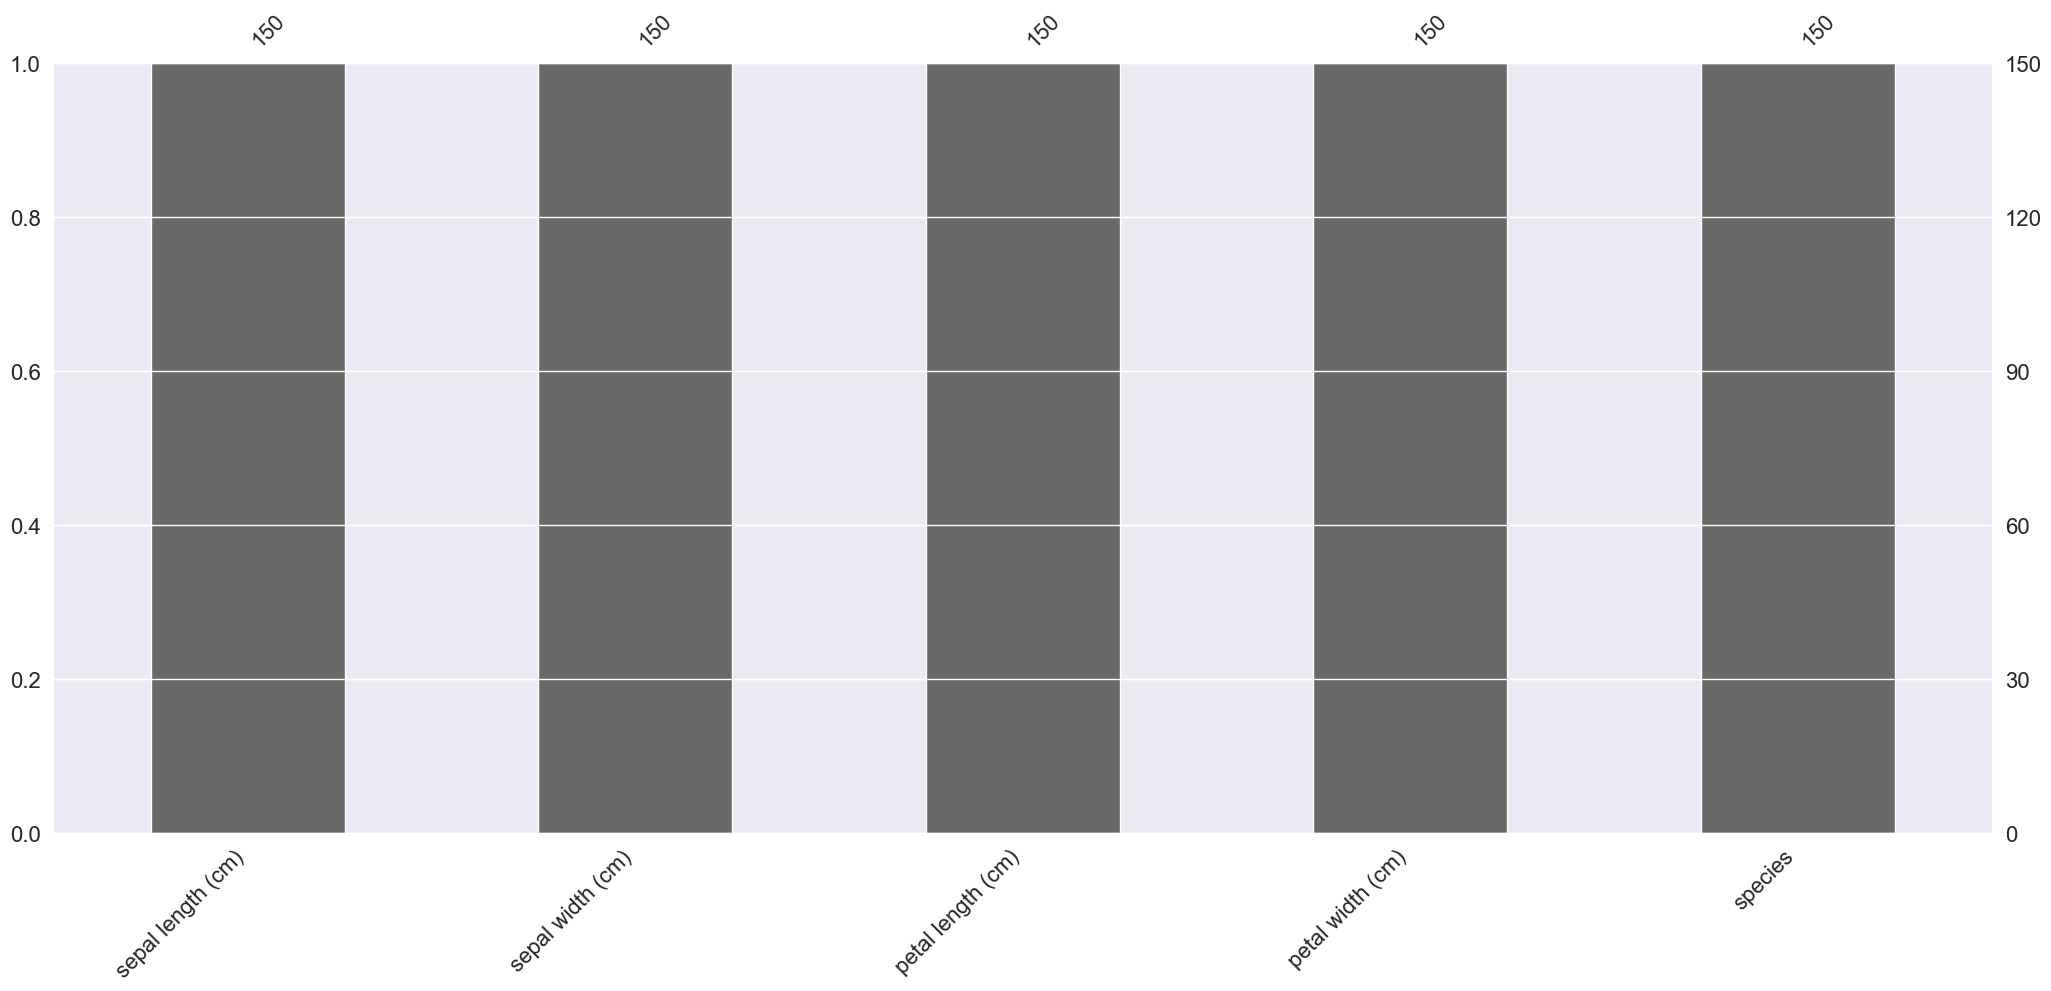

In [10]:
# Null count analysis to visualize and confirm the completeness of the dataset before modeling
p = msno.bar(iris_df)

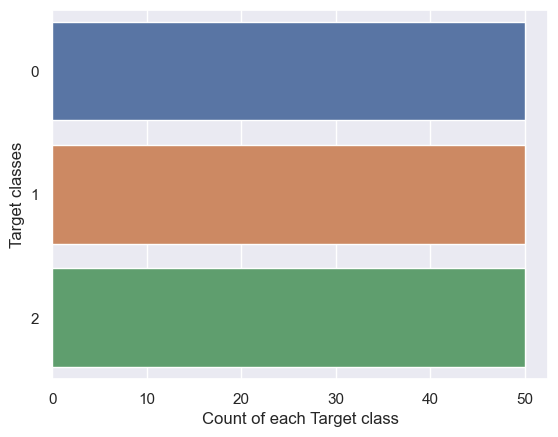

In [11]:
# Create a countplot to visualize the distribution of target classes (species)
# The 'sns.countplot' function is used to plot the frequency of each class in the 'species' column
# The 'y' parameter is used to specify the categorical variable for the y-axis (species labels)
# The 'data' parameter points to the DataFrame containing the data (iris_df)
sns.countplot(y=iris_df.species, data=iris_df)

# Label the x-axis as "Count of each Target class"
# This explains that the x-axis will represent the number of samples in each class
plt.xlabel("Count of each Target class")

# Label the y-axis as "Target classes"
# This explains that the y-axis will represent the different species (target classes)
plt.ylabel("Target classes")

# Display the plot
# The plt.show() function renders the plot and displays it to the user
plt.show()


# BIVARIATE EDA

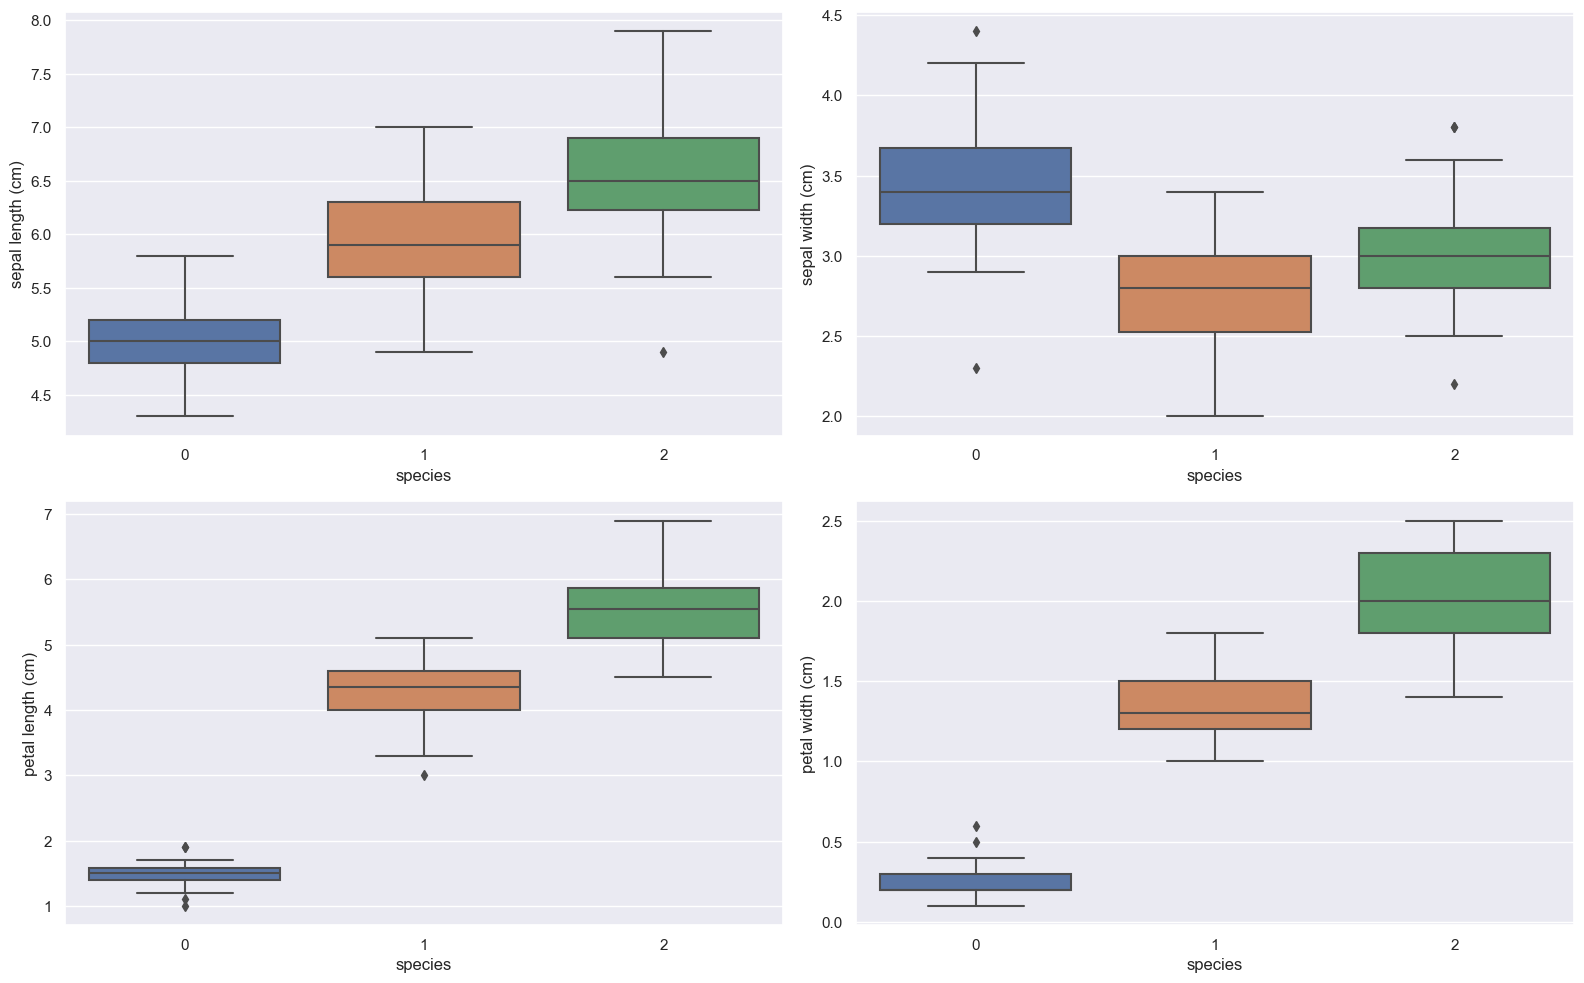

In [12]:
# Create a 2x2 grid of subplots to visualize boxplots for individual features by species
# The figsize parameter specifies the overall size of the plot (16x10 inches)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
# Initialize row and column counters for the subplot grid
row = 0
col = 0
# Loop through each column (excluding the target column 'species') in the dataset to create boxplots
for i in range(len(iris_df.columns) - 1):
    # If the column index exceeds 1 (meaning a new row is needed), reset the column counter
    if col > 1:
        row += 1  # Move to the next row
        col = 0  # Reset column to the first position 
    # Access the subplot axis at the current row and column position
    axes = ax[row, col]
    # Create a boxplot for the current feature (iris_df.columns[i]) grouped by species
    # The 'x' parameter is the categorical variable (species), and 'y' is the continuous feature
    sns.boxplot(x=iris_df['species'], y=iris_df[iris_df.columns[i]], ax=axes)
    # Move to the next column for the next plot
    col += 1
# Adjust the layout to ensure there’s no overlap between subplots
plt.tight_layout()
# Optional: Add a title for the entire plot (currently commented out)
# plt.title("Individual Features by Class")
# Display the plot
plt.show()

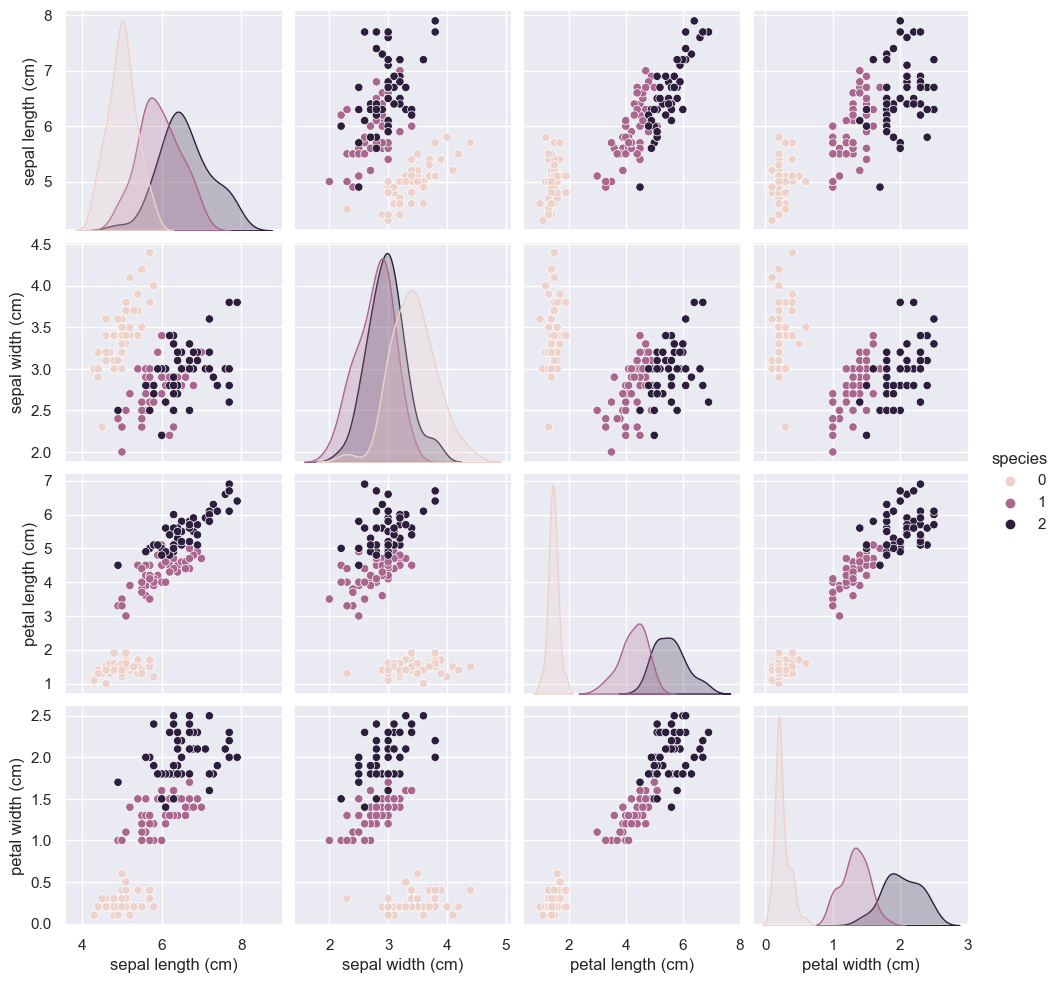

In [13]:
# Create a pairplot to visualize the relationships between all pairs of features in the dataset
# The 'sns.pairplot' function generates a grid of scatterplots for each pair of numerical features
# The 'hue' parameter is used to color the points by the 'species' column, which helps to differentiate classes
p = sns.pairplot(iris_df, hue='species')

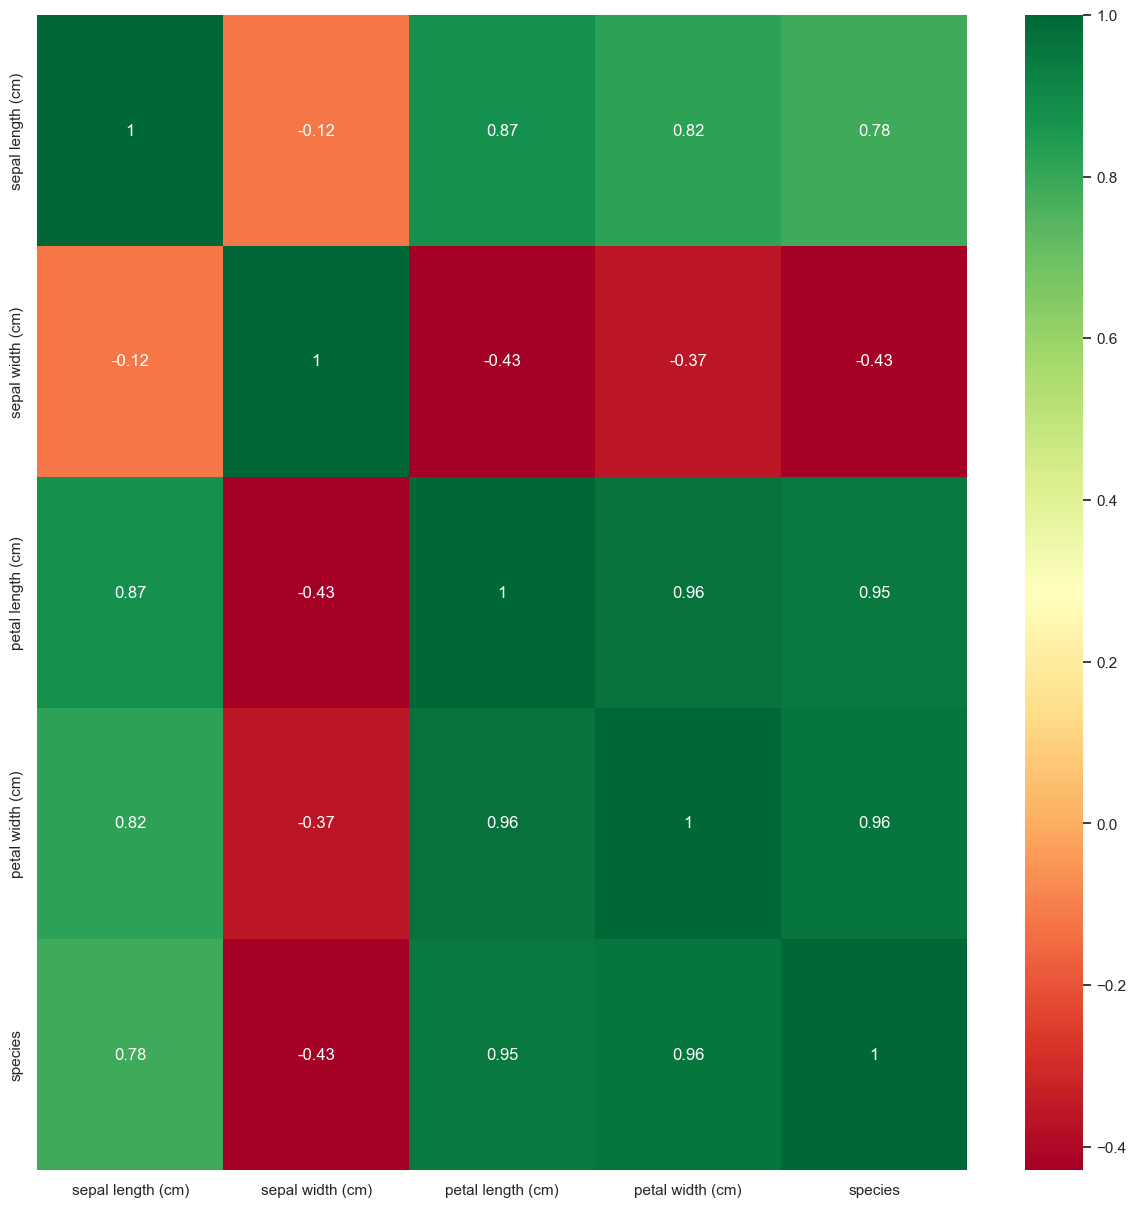

In [14]:
# Create a figure with a specific size for the heatmap (15x15 inches)
plt.figure(figsize=(15, 15))
# Generate a heatmap to visualize the correlation matrix of the numerical features in the dataset
# The 'iris_df.corr()' function calculates the pairwise correlation between the numeric columns
# The 'annot=True' argument adds the correlation coefficient values inside the heatmap cells
# The 'cmap' argument sets the color palette for the heatmap (RdYlGn: Red-Yellow-Green color map)
p = sns.heatmap(iris_df.corr(), annot=True, cmap='RdYlGn')

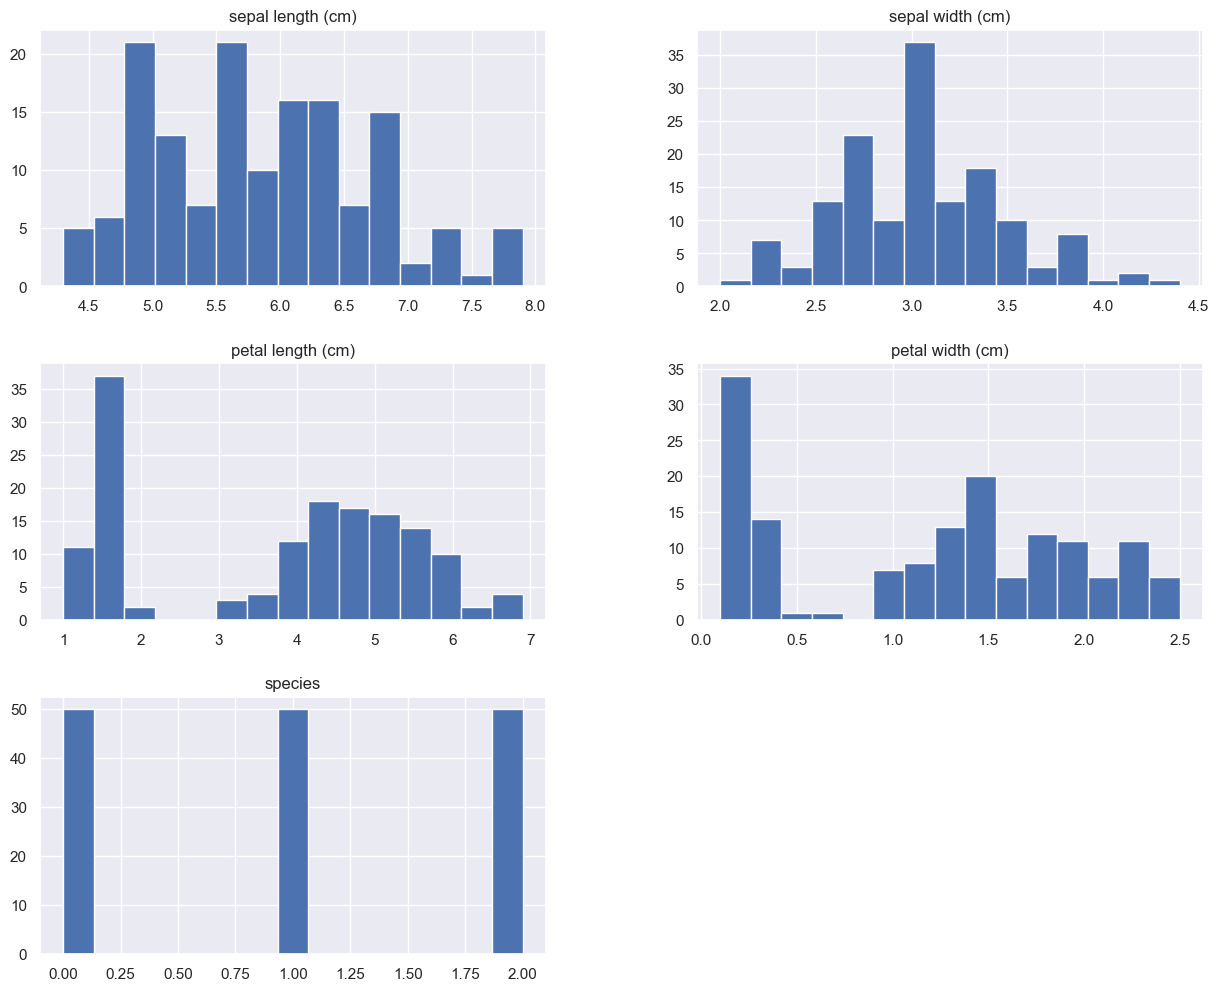

In [15]:
# Generate histograms for all numerical columns in the iris_df DataFrame
# The 'iris_df.hist()' function creates a histogram for each numerical feature to visualize their distributions
# 'figsize=(15,12)' sets the overall size of the plot (15x12 inches)
# 'bins=15' specifies the number of bins (bars) in each histogram to divide the data range
iris_df.hist(figsize=(15, 12), bins=15)
# Add a title to the histogram plot
# This title describes that the plot represents the distribution of the features
plt.title("Features Distribution")
# Display the histograms on the screen
plt.show()

# MODELLING

# Without PCA

In [16]:
# Split the dataset into features (X) and target labels (y)
# 'X' contains all the input features (excluding the 'species' column, which is the target)
# The '.drop()' method is used to drop the 'species' column from the DataFrame to create the features matrix
# 'axis=1' specifies that we are dropping a column (not a row)
X = iris_df.drop(['species'], axis=1)
# 'y' contains the target labels (the 'species' column)
# This is the dependent variable that the model will predict
y = iris_df.species

In [17]:
# Initialize a MinMaxScaler to scale the features to a specific range (0 to 1)
# This scaler will normalize the data so that each feature has a minimum value of 0 and a maximum value of 1
scaler = MinMaxScaler()
# Apply the scaler to the feature set 'X' to scale the features
# The 'fit_transform()' method first calculates the minimum and maximum values for each feature (fit),
# then scales the features accordingly (transform)
X = scaler.fit_transform(X)

In [18]:
# Split the dataset into training and testing sets
# The 'train_test_split()' function is used to randomly split the features (X) and target labels (y)
# 'test_size=0.3' specifies that 30% of the data will be used for testing and 70% for training
# 'random_state=20' ensures reproducibility of the split (using a fixed seed for random operations)
# 'stratify=y' ensures that the distribution of the target labels ('species') is preserved in both the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

In [19]:
# Initialize a K-Nearest Neighbors (KNN) classifier with 7 neighbors
# The '7' indicates that the classifier will use the 7 nearest neighbors to make predictions
knn = KNeighborsClassifier(7)
# Fit the KNN model to the training data (X_train, y_train)
# The '.fit()' method trains the model by finding patterns in the training data
knn.fit(X_train, y_train)
# Evaluate and print the accuracy of the model on the training data
# The '.score()' method calculates the accuracy of the model on the given dataset (X_train, y_train)
# This returns the proportion of correctly classified instances in the training set
print("Train score before PCA", knn.score(X_train, y_train), "%")
# Evaluate and print the accuracy of the model on the testing data
# The '.score()' method calculates the accuracy of the model on the test data (X_test, y_test)
# This returns the proportion of correctly classified instances in the testing set
print("Test score before PCA", knn.score(X_test, y_test), "%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


# With PCA

In [20]:
# Initialize a Principal Component Analysis (PCA) object
# By default, PCA will calculate as many principal components as the number of original features
pca = PCA()
# Apply PCA to the feature set 'X' and transform it into a new feature space
# The 'fit_transform()' method performs two steps:
# 1. 'fit': Learns the principal components from the data by finding the directions of maximum variance.
# 2. 'transform': Projects the original data onto the principal components to create the reduced feature set.
X_new = pca.fit_transform(X)

In [21]:
# Retrieve the covariance matrix computed by the PCA
# The covariance matrix represents the relationships between the original features
# as they are transformed into the principal components
cov_matrix = pca.get_covariance()
# Display the covariance matrix
print(cov_matrix)

[[ 0.05290845 -0.00491134  0.05999602  0.05975355]
 [-0.00491134  0.03298254 -0.02328082 -0.02111795]
 [ 0.05999602 -0.02328082  0.08952249  0.09149784]
 [ 0.05975355 -0.02111795  0.09149784  0.10086914]]


In [22]:
# Retrieve the explained variance ratio for each principal component
# 'explained_variance_ratio_' represents the proportion of the dataset's variance 
# that is captured by each principal component
explained_variance = pca.explained_variance_ratio_
# Display the explained variance ratio
# This shows the contribution of each principal component to the total variance
explained_variance

array([0.84136038, 0.11751808, 0.03473561, 0.00638592])

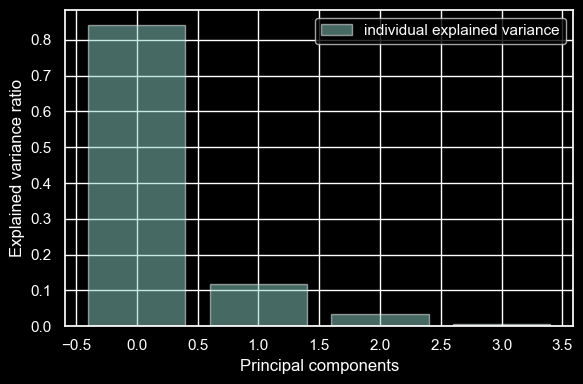

In [23]:
# Use a dark background style for the plot
with plt.style.context('dark_background'):
    # Create a figure with a specific size
    plt.figure(figsize=(6, 4))
    # Create a bar plot for the explained variance ratio
    # 'range(4)' indicates the number of principal components (here, 4 components)
    # 'explained_variance' contains the variance ratio for each component
    # 'alpha=0.5' makes the bars semi-transparent
    # 'align="center"' aligns the bars at the center of their positions
    # 'label' specifies the legend entry for this plot
    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    # Label the y-axis to indicate what the bar heights represent
    plt.ylabel('Explained variance ratio')
    # Label the x-axis to represent the principal components
    plt.xlabel('Principal components')
    # Add a legend in the best location based on the plot layout
    plt.legend(loc='best')
    # Automatically adjust subplot parameters to give specified padding
    plt.tight_layout()

In [24]:
# Initialize a Principal Component Analysis (PCA) object with a specified number of components
# 'n_components=3' indicates that the feature space will be reduced to the first three principal components
pca = PCA(n_components=3)
# Apply PCA to the feature set 'X' and transform it into a reduced-dimension feature space
# 'fit_transform()' first learns the three principal components from the data (fit),
# and then projects the original data onto these three components (transform)
X_new = pca.fit_transform(X)

In [25]:
# Split the PCA-transformed dataset into training and testing sets
# 'X_new' is the reduced feature set obtained after applying PCA (3 principal components)
# 'y' is the target variable (species labels)
# 'test_size=0.3' specifies that 30% of the data will be used for testing, and 70% for training
# 'random_state=20' ensures reproducibility of the split
# 'stratify=y' ensures that the class distribution is preserved in both training and testing sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=20, stratify=y)

In [26]:
# Initialize a K-Nearest Neighbors (KNN) classifier with 7 neighbors
# The '7' indicates that the classifier will consider the 7 nearest neighbors for predictions
knn_pca = KNeighborsClassifier(7)
# Fit the KNN model to the PCA-transformed training data (X_train_new, y_train)
# The '.fit()' method trains the model by learning patterns in the reduced-dimension training data
knn_pca.fit(X_train_new, y_train)
# Evaluate and print the accuracy of the model on the training data after PCA
# '.score()' calculates the proportion of correctly classified instances in the training set
print("Train score after PCA", knn_pca.score(X_train_new, y_train), "%")
# Evaluate and print the accuracy of the model on the testing data after PCA
# '.score()' calculates the proportion of correctly classified instances in the testing set
print("Test score after PCA", knn_pca.score(X_test_new, y_test), "%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


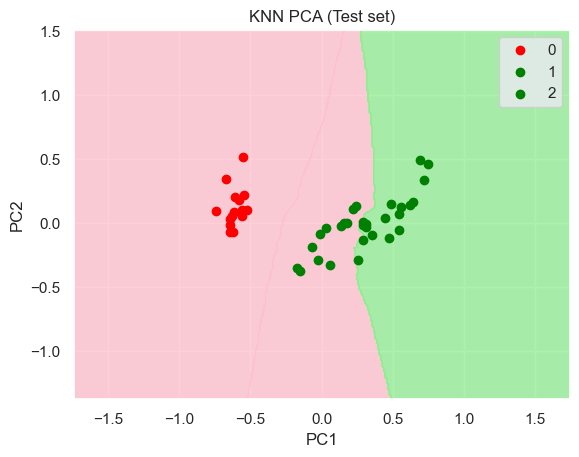

In [27]:
# Assign the classifier to be visualized
# 'classifier' refers to the trained KNN model after applying PCA
classifier = knn_pca
# Assign the test set data for visualization
# 'X_set' is the feature matrix for the test set, and 'y_set' is the corresponding target variable
X_set, y_set = X_test_new, y_test
# Create a mesh grid for plotting the decision boundary
# 'X1' and 'X2' represent the grid points in the feature space, spaced by 0.01
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
# Plot the decision boundary using the trained classifier
# 'predict' is applied to each grid point, and the results are reshaped to match the grid structure
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(), 
              np.zeros((X1.shape[0], X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('pink', 'lightgreen')))
# Set the x and y axis limits to match the mesh grid
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Plot the test set points
# 'np.unique(y_set)' retrieves the unique classes in the test set
# Each class is represented by a different color (red or green) and labeled accordingly
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
# Add title and axis labels for clarity
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')  # First principal component
plt.ylabel('PC2')  # Second principal component
# Add a legend to identify class labels
plt.legend()
# Display the plot
plt.show()

# QUESTION 2

# Write a program to demonstrate the working of the decision tree based ID3 algorithm by considering a dataset.

# IMPORT THE NECESSARY LIBRARIES

In [1]:
# Importing necessary libraries
import numpy as np  # For numerical operations and handling arrays
import pandas as pd  # For data manipulation and analysis
# Define a small value for computational stability (to prevent log(0) errors)
eps = np.finfo(float).eps  # Machine epsilon for float type
# Import log2 function for entropy calculations
from numpy import log2 as log  # Simplifies usage by aliasing log2 as log
# Library for visualizing missing data
import missingno as msn  # Useful for identifying and visualizing missing values in the dataset
# Pretty printing library for displaying complex data structures in a readable format
import pprint  # Allows for well-formatted output of dictionaries, trees, and other objects

# READING THE DATASET

In [2]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('play_tennis.csv')  # 'play_tennis.csv' is the dataset file name

In [3]:
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [4]:
df = df.drop('day',axis=1) #Drop the day column because it is irrelevant

In [5]:
df.head(14) #Display the 14 columns

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [6]:
# look at the number of rows and columns
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 14, Columns: 5


In [7]:
# look at the columns
print(df.columns)

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


In [8]:
df.info() #Display dataset summary, including data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 692.0+ bytes


In [9]:
df.describe() #Display basic statistical details for numeric columns

,outlook,temp,humidity,wind,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [10]:
df.tail()  # Display the last 5 rows

,outlook,temp,humidity,wind,play
9,Rain,Mild,Normal,Weak,Yes
10,Sunny,Mild,Normal,Strong,Yes
11,Overcast,Mild,High,Strong,Yes
12,Overcast,Hot,Normal,Weak,Yes
13,Rain,Mild,High,Strong,No


# MISSING DATA HANDLING

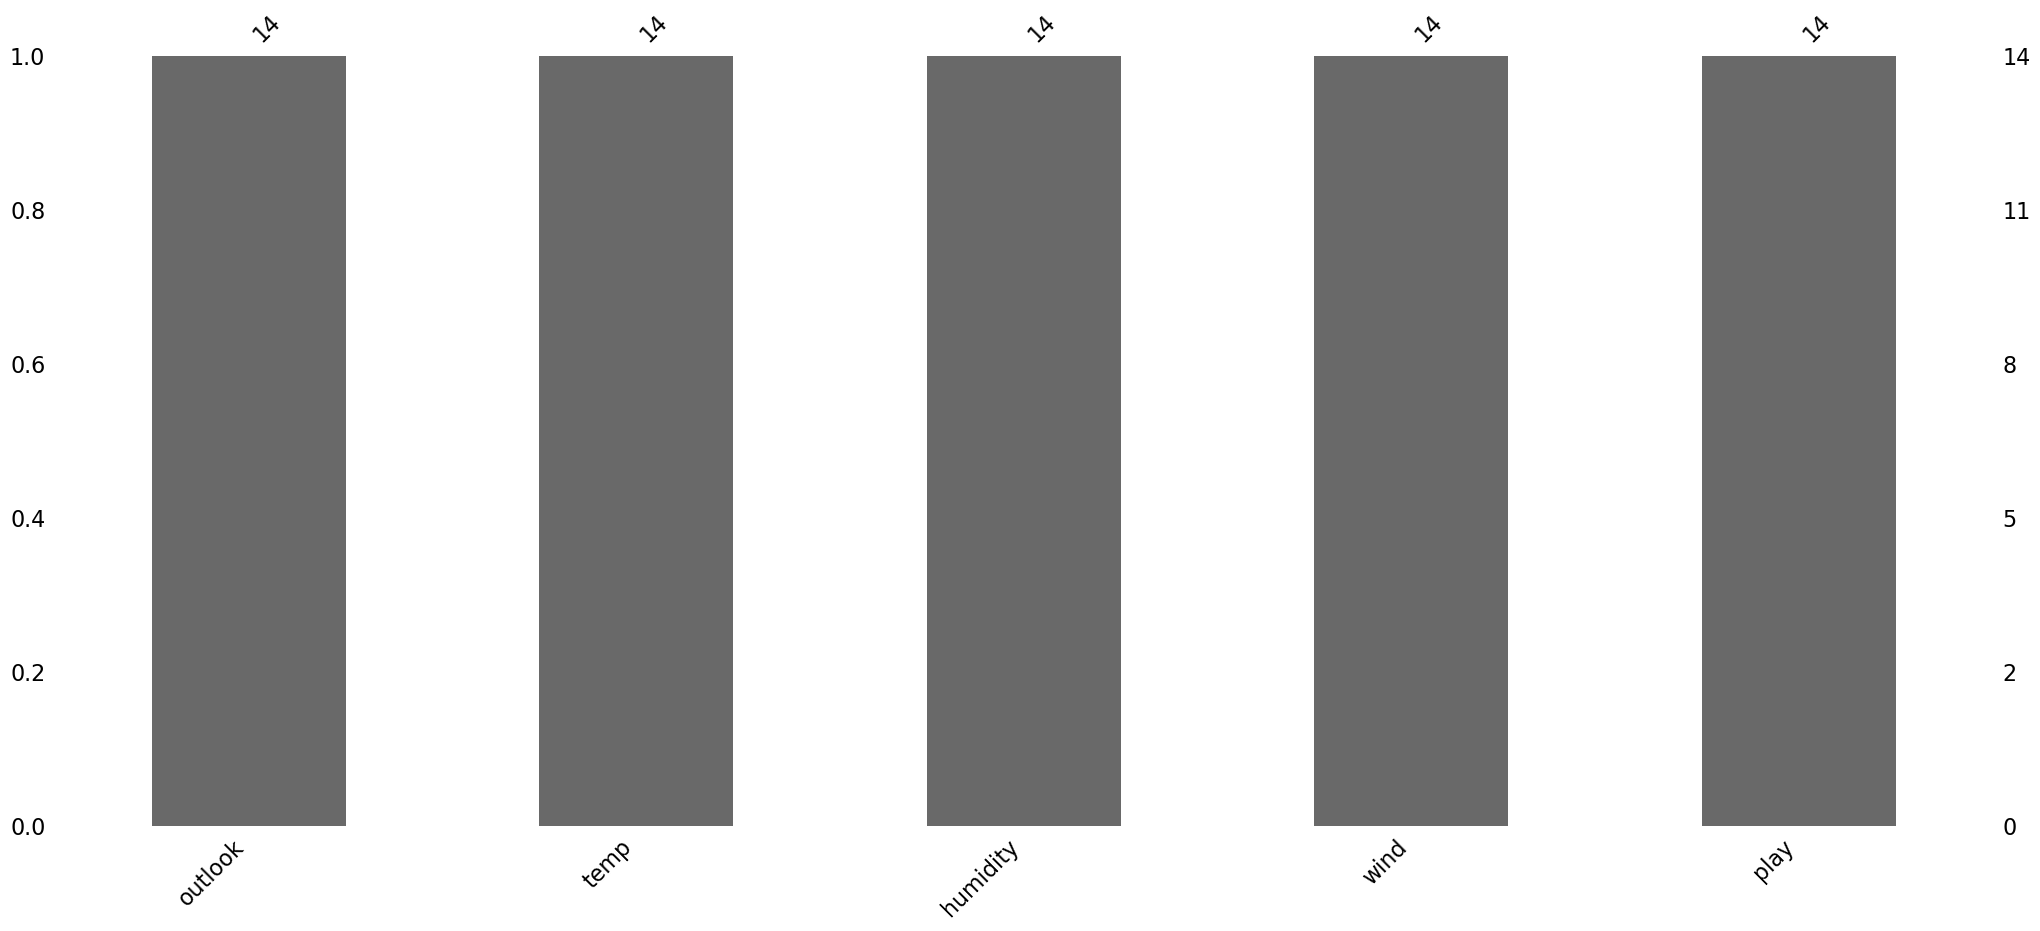

In [11]:
p = msn.bar(df) #Visualize the missing values

# COMPUTE THE ENTROPY OF DATASET

In [12]:
def find_entropy(df):
    # Target column: assuming the last column in the dataframe is the target variable
    target = df.keys()[-1]  # Get the last column name as the target column
    entropy = 0  # Initialize the entropy value to 0
    # Get the unique values in the target column (used for classification purposes)
    values = df[target].unique()
    # Calculate entropy for each unique value in the target column
    for value in values:
        # Calculate the fraction of instances where the target column has this unique value
        fraction = df[target].value_counts()[value] / len(df[target])
        # Ensure no log(0) error by checking if the fraction is greater than 0
        if fraction > 0:
            # Add to the entropy: -fraction * log2(fraction)
            entropy += -fraction * np.log2(fraction)
    # Return the computed entropy value
    return entropy


# COMPUTE THE AVERAGE INFORMATION GAIN

In [13]:
def average_information(df, attribute):
    # Target column: assuming the last column in the dataframe is the target variable
    target = df.keys()[-1]  # Get the target column (the last column)
    # Get unique values of the target variable (e.g., 'Yes', 'No')
    target_variables = df[target].unique()
    # Get unique values of the specified attribute (e.g., 'Hot', 'Cold' for Temperature)
    variables = df[attribute].unique()
    entropy2 = 0  # Initialize the total weighted entropy for the attribute
    # Loop through each unique value of the attribute (e.g., 'Hot', 'Cold')
    for variable in variables:
        entropy = 0  # Initialize the entropy for this specific attribute value
        # Loop through each unique target value ('Yes', 'No')
        for target_variable in target_variables:
            # Calculate the number of instances where the attribute equals the current value
            # and the target variable equals the current target value
            num = len(df[attribute][df[attribute] == variable][df[target] == target_variable])
            # Calculate the number of instances where the attribute equals the current value
            den = len(df[attribute][df[attribute] == variable])
            # Prevent division by zero by adding a small epsilon value
            fraction = num / (den + eps)
            # Calculate the entropy for the current target value and attribute value
            entropy += -fraction * log(fraction + eps)
        # Calculate the weight (fraction) of this attribute value in the dataset
        fraction2 = den / len(df)
        # Update the total weighted entropy for the attribute
        entropy2 += -fraction2 * entropy
    # Return the absolute value of the total entropy, as entropy is non-negative
    return abs(entropy2)

In [14]:
def find_winner(df):
    # List to store information gain (IG) for each attribute
    IG = []
    # Iterate over each attribute (excluding the target column)
    for key in df.keys()[:-1]:
        # Calculate Information Gain by subtracting average information from the total entropy
        IG.append(find_entropy(df) - average_information(df, key))
    # Find the attribute with the highest Information Gain (IG)
    # np.argmax returns the index of the maximum value in the IG list
    # Use this index to get the corresponding attribute (column name)
    return df.keys()[:-1][np.argmax(IG)]

In [15]:
def get_subtable(df, node, value):
    # Filter the dataframe where the column `node` has the specified `value`
    # `df[node] == value` creates a boolean mask that selects rows matching the condition
    # `.reset_index(drop=True)` resets the index after filtering to avoid keeping the original index from the dataframe
    # `drop=True` ensures that the old index is not added as a column
    return df[df[node] == value].reset_index(drop=True)

In [16]:
def buildTree(df, tree=None): 
    # Target column: assuming the last column in the dataframe is the target variable
    target = df.keys()[-1]  # Get the target column (the last column)
    # Get the attribute with maximum information gain to split the data
    node = find_winner(df)
    # Get distinct values of the selected attribute (node) for splitting (e.g., 'Low', 'Medium', 'High')
    attValue = np.unique(df[node])
    # Create an empty dictionary to build the tree if it doesn't exist
    if tree is None:                    
        tree = {}
        tree[node] = {}
    # Iterate over each unique value of the selected attribute (node)
    for value in attValue:
        # Get the subtable where the current node equals the current value
        subtable = get_subtable(df, node, value)
        # Get the class values and their counts for the target variable in the subtable
        clValue, counts = np.unique(subtable[target], return_counts=True)
        # If all values in the subtable have the same target value, it is a pure subset
        if len(counts) == 1:  # The subset is pure
            tree[node][value] = clValue[0]  # Assign the class value to this branch of the tree
        else:
            # If the subset is not pure, recursively call buildTree to further split
            tree[node][value] = buildTree(subtable)  # Recur with the subtable
    # Return the constructed decision tree
    return tree

In [17]:
tree = buildTree(df)

In [18]:
pprint.pprint(tree)#Printing the decision tree

{'outlook': {'Overcast': 'Yes',
             'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}


# QUESTION 4

# Build KNN Classification model for a given dataset. Vary the number of values as follows and    compare the results: (i) 1	(ii) 3	(iii) 5	 (iv) 7	(v) 11


# IMPORT THE NECESSARY LIBRARIES

In [1]:
import numpy as np  # For numerical computations and array operations
import pandas as pd  # For handling and manipulating structured data
import matplotlib.pyplot as plt  # For creating static plots and visualizations
import seaborn as sns  # For statistical data visualization
# Ensures plots are displayed inline in Jupyter Notebooks
%matplotlib inline  
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
import missingno as msno  # For visualizing missing data
from sklearn.preprocessing import StandardScaler  # For feature scaling to normalize the data
from sklearn.neighbors import KNeighborsClassifier  # Importing the KNN classification model
from sklearn.metrics import accuracy_score  # For calculating the accuracy of the model
from sklearn.metrics import confusion_matrix  # For generating the confusion matrix
from sklearn.model_selection import cross_val_score  # For performing cross-validation
from sklearn.metrics import roc_curve  # For calculating the Receiver Operating Characteristic (ROC) curve
from sklearn.metrics import roc_auc_score  # For calculating the area under the ROC curve
import warnings  # For managing warnings in the code
warnings.filterwarnings('ignore')  # Suppress all warnings
from sklearn.metrics import classification_report  # For generating a detailed classification report

# IMPORTING THE DATASET

In [2]:
data = 'breast-cancer-wisconsin.data.txt'  # Path to the dataset file
df = pd.read_csv(data, header=None)  # Reading the dataset into a DataFrame without headers

# EXPLORATORY DATA ANALYSIS (EDA)

# View Dimensions of the dataset

In [3]:
df.shape #Know the number of rows and columns

(699, 11)

# View top 5 rows of the dataset

In [4]:
df.head() #Display the top 5 rows

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# View 5 bottom rows of the dataset

In [5]:
df.tail() #Display the bottom 5 rows

,0,1,2,3,4,5,6,7,8,9,10
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


# Rename the column names of the dataset

In [6]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 
             'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names
df.columns

Index(['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
       'Uniformity_Cell_Shape', 'Marginal_Adhesion',
       'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

# Preview the dataset

In [7]:
df.head() #View only the top 5 row

,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Drop redundant columns

In [8]:
df.drop('Id', axis=1, inplace=True) #Drop the Id column 

# View the dataset info

In [9]:
df.info() #View the Dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_thickness              699 non-null    int64 
 1   Uniformity_Cell_Size         699 non-null    int64 
 2   Uniformity_Cell_Shape        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


# Frequency Distribution of values in variables

In [10]:
for var in df.columns:  # Iterating over all columns in the DataFrame
    print(df[var].value_counts())  # Printing the count of unique values in each column

Clump_thickness
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64
Uniformity_Cell_Size
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Shape
1     353
2      59
10     58
3      56
4      44
5      34
6      30
7      30
8      28
9       7
Name: count, dtype: int64
Marginal_Adhesion
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64
Single_Epithelial_Cell_Size
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64
Bare_Nuclei
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64
Bland_Chromatin
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
N

# Convert data type of Bare_Nuclei to integer

In [11]:
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Check data types of columns of dataframe

In [12]:
df.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

# Missing values in the variables

In [13]:
# check missing values in variables
df.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

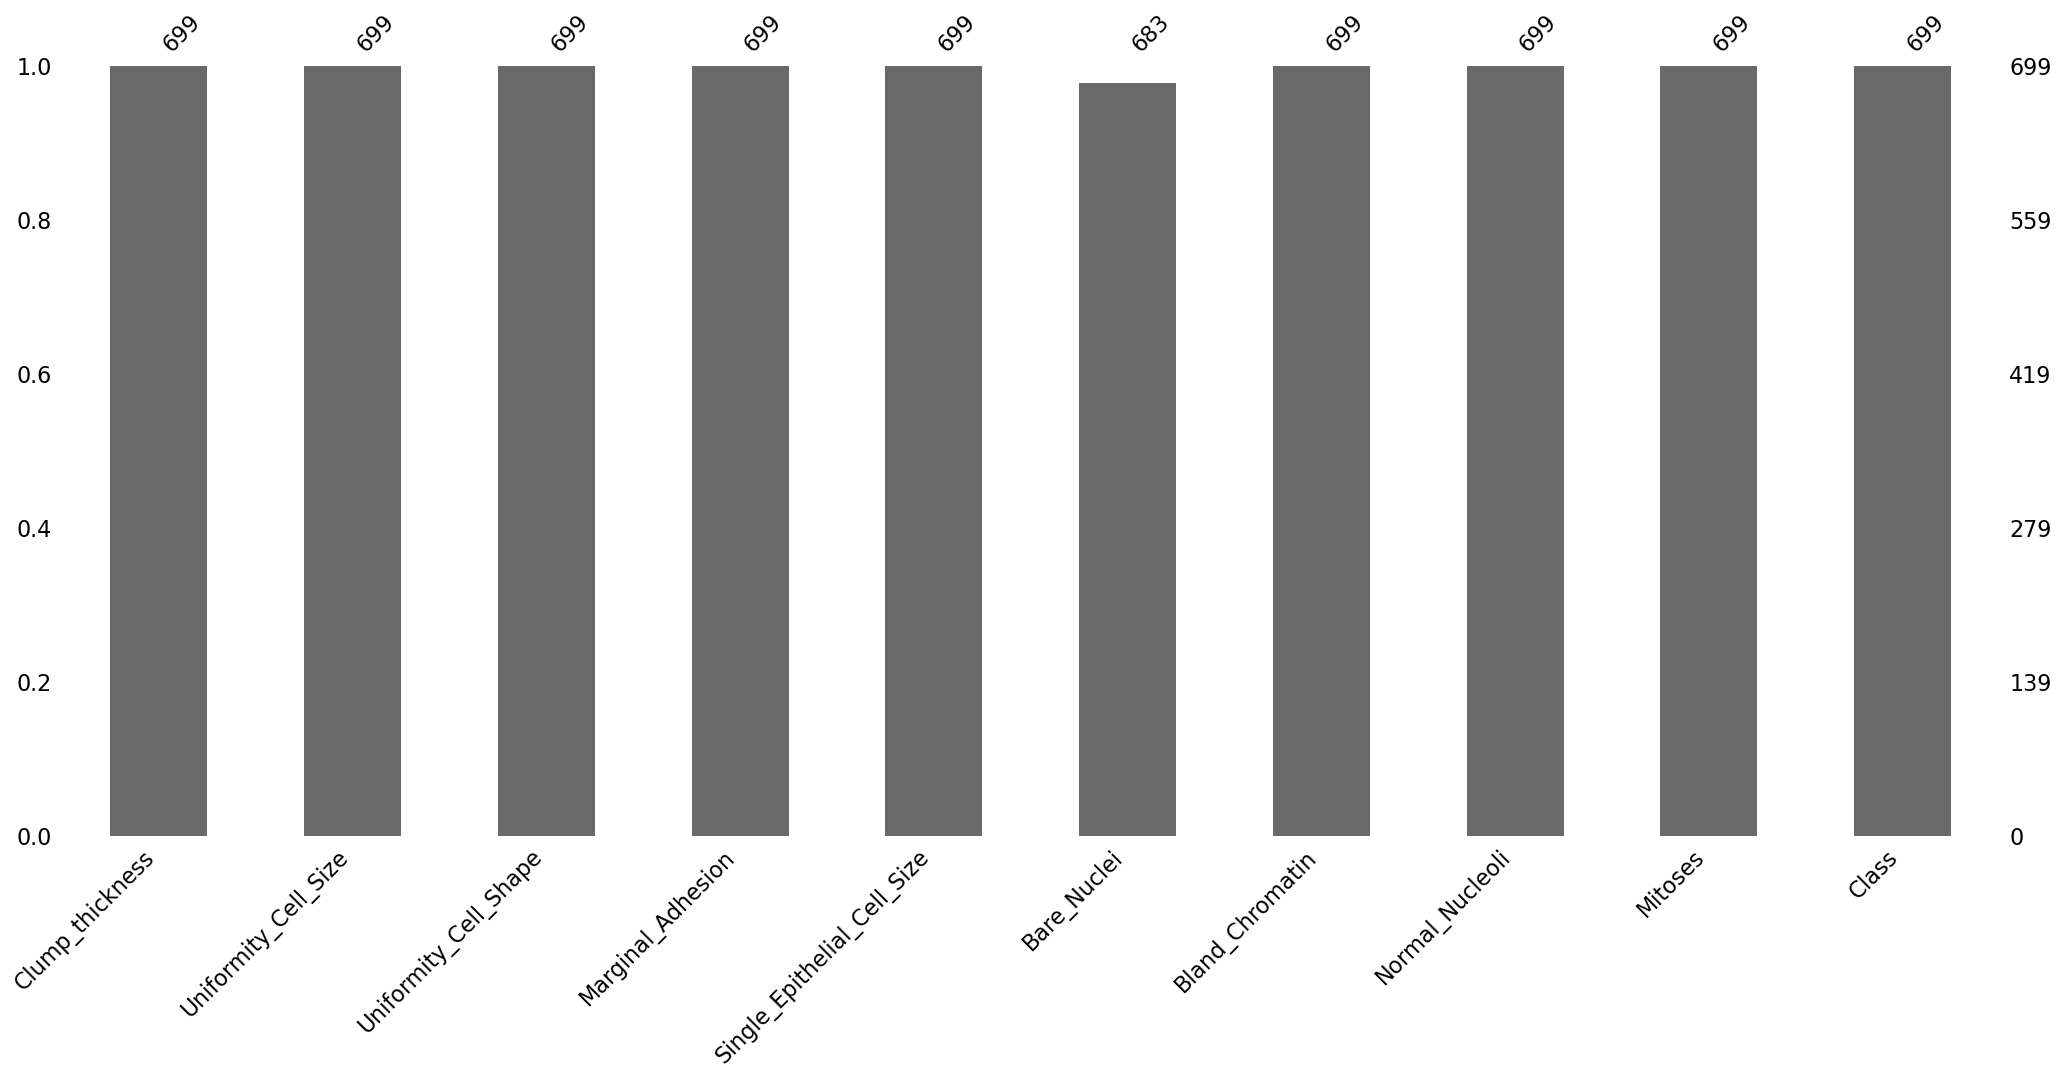

In [14]:
#Visualize the missing values
p = msno.bar(df)

In [15]:
# check `na` values in the dataframe
df.isna().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [16]:
# check frequency distribution of `Bare_Nuclei` column
df['Bare_Nuclei'].value_counts()

Bare_Nuclei
1.0     402
10.0    132
2.0      30
5.0      30
3.0      28
8.0      21
4.0      19
9.0       9
7.0       8
6.0       4
Name: count, dtype: int64

In [17]:
# check unique values in `Bare_Nuclei` column
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [18]:
# check for nan values in `Bare_Nuclei` column
df['Bare_Nuclei'].isna().sum()

16

# check frequency distribution of target variable `Class`

In [19]:
# view frequency distribution of values in `Class` variable
df['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

# check  percentage of frequency distribution of `Class`

In [20]:
# view percentage of frequency distribution of values in `Class` variable
df['Class'].value_counts()/float(len(df))

Class
2    0.655222
4    0.344778
Name: count, dtype: float64

# Outliers in numerical variables

In [21]:
# view summary statistics in numerical variables
print(round(df.describe(),2))

       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count           699.00                699.00                 699.00   
mean              4.42                  3.13                   3.21   
std               2.82                  3.05                   2.97   
min               1.00                  1.00                   1.00   
25%               2.00                  1.00                   1.00   
50%               4.00                  1.00                   1.00   
75%               6.00                  5.00                   5.00   
max              10.00                 10.00                  10.00   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count             699.00                       699.00       683.00   
mean                2.81                         3.22         3.54   
std                 2.86                         2.21         3.64   
min                 1.00                         1.00         1.00   
25%       

# DATA VISUALIZATION

# Univariate Plots

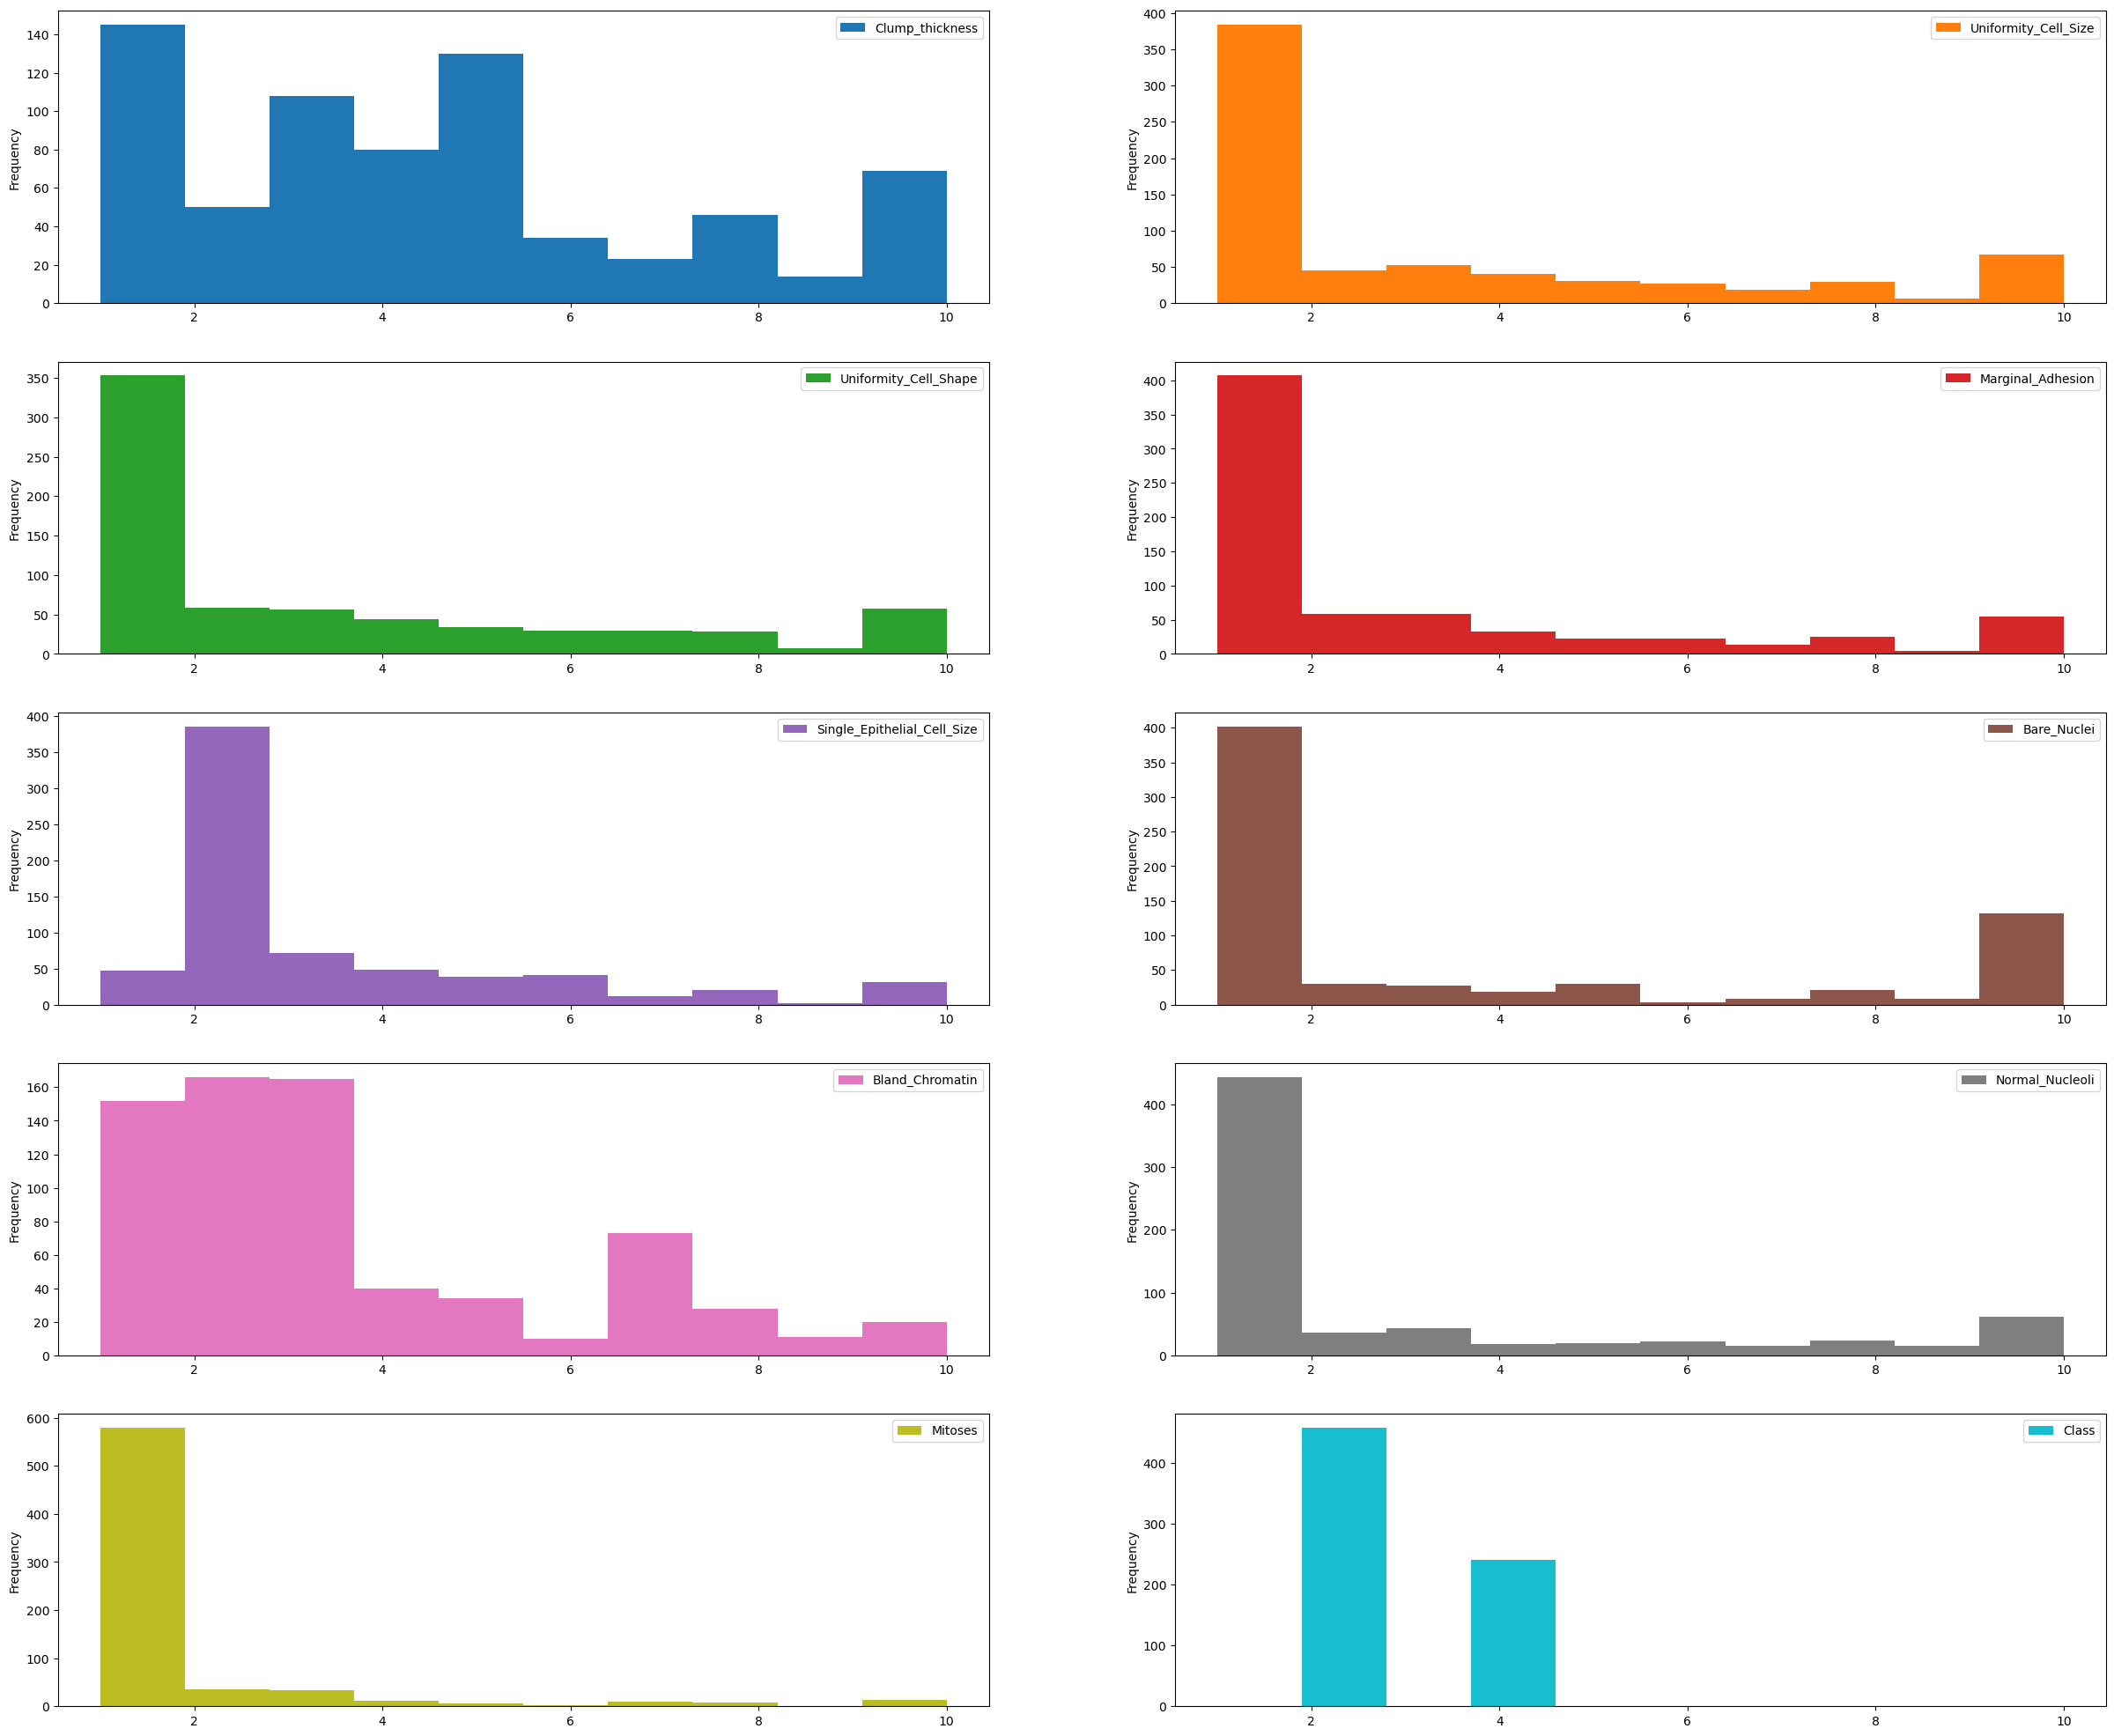

In [22]:
# Set the size of the figure for better visibility
plt.rcParams['figure.figsize'] = (30, 25)
# Plot histograms for all variables in the dataset
df.plot(kind='hist', bins=10, subplots=True, layout=(5, 2), sharex=False, sharey=False)
# Display the plots
plt.show()

# Multivariate Plots

# Estimating correlation coefficients

In [23]:
# Compute the correlation matrix for all numerical columns in the DataFrame
correlation = df.corr()  

In [24]:
# Sort the correlation values of the 'Class' column in descending order
correlation['Class'].sort_values(ascending=False)  

Class                          1.000000
Bare_Nuclei                    0.822696
Uniformity_Cell_Shape          0.818934
Uniformity_Cell_Size           0.817904
Bland_Chromatin                0.756616
Clump_thickness                0.716001
Normal_Nucleoli                0.712244
Marginal_Adhesion              0.696800
Single_Epithelial_Cell_Size    0.682785
Mitoses                        0.423170
Name: Class, dtype: float64

# Discover patterns and relationships

# Correlation Heat Map

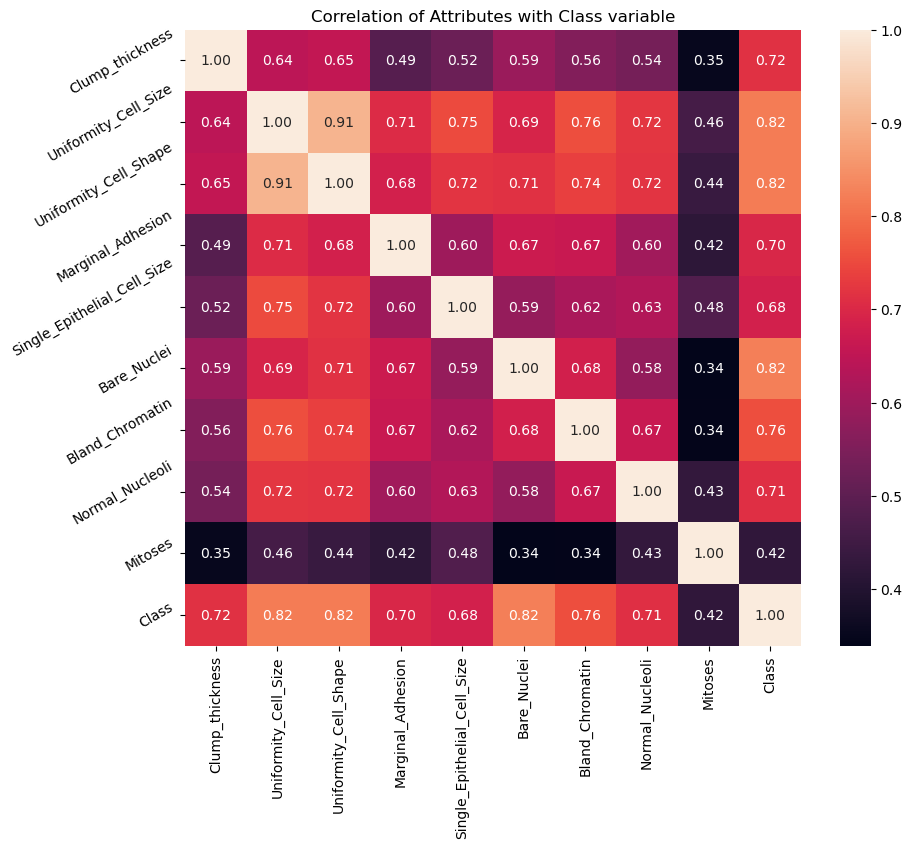

In [25]:
plt.figure(figsize=(10, 8))  # Set the figure size for better visualization
plt.title('Correlation of Attributes with Class variable')  # Add a title to the heatmap
# Create a heatmap to visualize the correlation matrix
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
# Rotate the x-axis labels for readability
a.set_xticklabels(a.get_xticklabels(), rotation=90)
# Rotate the y-axis labels for readability
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()  # Display the heatmap

# Declare feature vector and target variable

In [26]:
 # Drop the 'Class' column to create the feature matrix (independent variables)
X = df.drop(['Class'], axis=1) 
y = df['Class']  # Extract the 'Class' column as the target variable (dependent variable)

# Split data into separate training and test set

In [27]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((559, 9), (140, 9))

# Feature Engineering

In [29]:
# check data types in X_train
X_train.dtypes

Clump_thickness                  int64
Uniformity_Cell_Size             int64
Uniformity_Cell_Shape            int64
Marginal_Adhesion                int64
Single_Epithelial_Cell_Size      int64
Bare_Nuclei                    float64
Bland_Chromatin                  int64
Normal_Nucleoli                  int64
Mitoses                          int64
dtype: object

# Engineering missing values in variables

In [30]:
# check missing values in numerical variables in X_train
X_train.isnull().sum()

Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    13
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
dtype: int64

In [31]:
# check missing values in numerical variables in X_test
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    3
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [32]:
# print percentage of missing values in the numerical variables in training set
for col in X_train.columns:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

Bare_Nuclei 0.0233


# Assumption

In [33]:
# impute missing values in X_train and X_test with respective column median in X_train
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           

In [34]:
# check again missing values in numerical variables in X_train
X_train.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [35]:
# check missing values in numerical variables in X_test
X_test.isnull().sum()

Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
dtype: int64

In [36]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
293,10,4,4,6,2,10.0,2,3,1
62,9,10,10,1,10,8.0,3,3,1
485,1,1,1,3,1,3.0,1,1,1
422,4,3,3,1,2,1.0,3,3,1
332,5,2,2,2,2,1.0,2,2,1


In [37]:
X_test.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
476,4,1,2,1,2,1.0,1,1,1
531,4,2,2,1,2,1.0,2,1,1
40,6,6,6,9,6,1.0,7,8,1
432,5,1,1,1,2,1.0,2,2,1
14,8,7,5,10,7,9.0,5,5,4


# Feature Scaling

In [38]:
cols = X_train.columns

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [41]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [42]:
X_train.head()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
0,2.028383,0.299506,0.289573,1.119077,-0.546543,1.858357,-0.577774,0.041241,-0.324258
1,1.669451,2.257680,2.304569,-0.622471,3.106879,1.297589,-0.159953,0.041241,-0.324258
2,-1.202005,-0.679581,-0.717925,0.074148,-1.003220,-0.104329,-0.995595,-0.608165,-0.324258
3,-0.125209,-0.026856,-0.046260,-0.622471,-0.546543,-0.665096,-0.159953,0.041241,-0.324258
4,0.233723,-0.353219,-0.382092,-0.274161,-0.546543,-0.665096,-0.577774,-0.283462,-0.324258


# Fit K Neighbours Classifier to the training set

In [43]:
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)
# fit the model to the training set
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Predict test-set results

In [44]:
y_pred = knn.predict(X_test)
y_pred

array([2, 2, 4, 2, 4, 2, 4, 2, 4, 2, 2, 2, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2,
       4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2,
       4, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2,
       2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

# predict_proba method

In [45]:
# probability of getting output as 2 - benign cancer
knn.predict_proba(X_test)[:,0]

array([1.        , 1.        , 0.33333333, 1.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.33333333, 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       1.        , 1.        , 1.        , 0.66666667, 1.        ,
       0.        , 1.        , 1.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 1.     

In [46]:
# probability of getting output as 4 - malignant cancer
knn.predict_proba(X_test)[:,1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333,
       0.        , 0.        , 1.        , 0.66666667, 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       1.        , 0.        , 0.        , 1.        , 1.        ,
       0.66666667, 1.        , 0.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 1.        , 0.     

# Check accuracy score

In [47]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9714


# Compare the train-set and test-set accuracy

In [48]:
y_pred_train = knn.predict(X_train)

In [49]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9821


# Check for overfitting and underfitting

In [50]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9821
Test set score: 0.9714


# Compare model accuracy with null accuracy

In [51]:
# check class distribution in test set
y_test.value_counts()

Class
2    85
4    55
Name: count, dtype: int64

In [52]:
# check null accuracy score
null_accuracy = (85/(85+55))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6071


# Rebuild kNN Classification model using different values of k

# Rebuild kNN Classification model using k=1

In [53]:
# instantiate the model with k=1
knn_1 = KNeighborsClassifier(n_neighbors=1)
# fit the model to the training set
knn_1.fit(X_train, y_train)
# predict on the test-set
y_pred_1 = knn_1.predict(X_test)
print('Model accuracy score with k=1 : {0:0.4f}'.format(accuracy_score(y_test, y_pred_1)))

Model accuracy score with k=1 : 0.9571


# Rebuild kNN Classification model using k=3

In [54]:
# instantiate the model with k=3
knn_3 = KNeighborsClassifier(n_neighbors=3)
# fit the model to the training set
knn_3.fit(X_train, y_train)
# predict on the test-set
y_pred_3 = knn_3.predict(X_test)
print('Model accuracy score with k=3 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_3)))

Model accuracy score with k=3 : 0.9714


# Rebuild kNN Classification model using k=5

In [55]:
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)
# fit the model to the training set
knn_5.fit(X_train, y_train)
# predict on the test-set
y_pred_5 = knn_5.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_5)))

Model accuracy score with k=5 : 0.9714


# Rebuild kNN Classification model using k=7

In [56]:
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)
# fit the model to the training set
knn_7.fit(X_train, y_train)
# predict on the test-set
y_pred_7 = knn_7.predict(X_test)
print('Model accuracy score with k=7 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_7)))

Model accuracy score with k=7 : 0.9786


# Rebuild kNN Classification model using k=11

In [57]:
# instantiate the model with k=11
knn_11 = KNeighborsClassifier(n_neighbors=11)
# fit the model to the training set
knn_11.fit(X_train, y_train)
# predict on the test-set
y_pred_11 = knn_11.predict(X_test)
print('Model accuracy score with k=11 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_11)))

Model accuracy score with k=11 : 0.9786


# Confusion matrix

In [58]:
# Print the Confusion Matrix with k =3 and slice it into four pieces
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[83  2]
 [ 2 53]]

True Positives(TP) =  83

True Negatives(TN) =  53

False Positives(FP) =  2

False Negatives(FN) =  2


In [59]:
# Print the Confusion Matrix with k =7 and slice it into four pieces
cm_7 = confusion_matrix(y_test, y_pred_7)
print('Confusion matrix\n\n', cm_7)
print('\nTrue Positives(TP) = ', cm_7[0,0])
print('\nTrue Negatives(TN) = ', cm_7[1,1])
print('\nFalse Positives(FP) = ', cm_7[0,1])
print('\nFalse Negatives(FN) = ', cm_7[1,0])

Confusion matrix

 [[83  2]
 [ 1 54]]

True Positives(TP) =  83

True Negatives(TN) =  54

False Positives(FP) =  2

False Negatives(FN) =  1


# Comment

<Axes: >

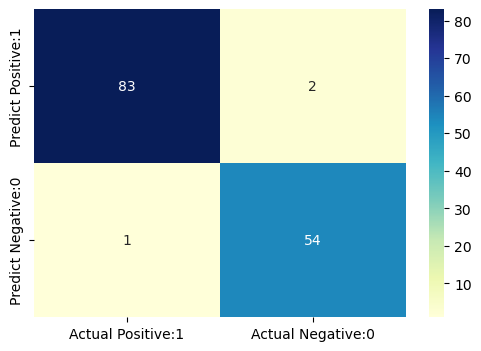

In [60]:
# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# CLASSIFICATION METRICES

# Classification Report

In [61]:
print(classification_report(y_test, y_pred_7))

              precision    recall  f1-score   support

           2       0.99      0.98      0.98        85
           4       0.96      0.98      0.97        55

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



# Classification Accurancy

In [62]:
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

In [63]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9786


# Classification Error

In [64]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0214


# Precision

In [65]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9765


# Recall

In [66]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9881


# True Positive

In [67]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9881


# False Positive Rate

In [68]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0357


# Specificity

In [69]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9643


# Support

# Adjusting the classification threshold value

In [70]:
# print the first 10 predicted probabilities of two classes- 2 and 4
y_pred_prob = knn.predict_proba(X_test)[0:10]
y_pred_prob

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

In [71]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])
y_pred_prob_df

,Prob of - benign cancer (2),Prob of - malignant cancer (4)
0,1.000000,0.000000
1,1.000000,0.000000
2,0.333333,0.666667
3,1.000000,0.000000
4,0.000000,1.000000
5,1.000000,0.000000
6,0.000000,1.000000
7,1.000000,0.000000
8,0.000000,1.000000
9,0.666667,0.333333


In [72]:
# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer
knn.predict_proba(X_test)[0:10, 1]

array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
       0.        , 1.        , 0.        , 1.        , 0.33333333])

In [73]:
# store the predicted probabilities for class 4 - Probability of malignant cancer
y_pred_1 = knn.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

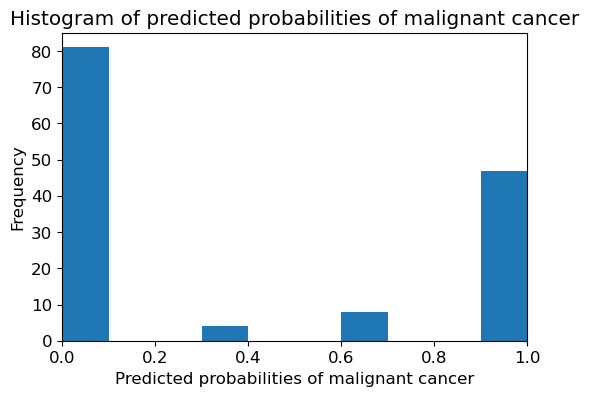

In [74]:
# plot histogram of predicted probabilities
# adjust figure size
plt.figure(figsize=(6,4))
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

# ROC CURVE

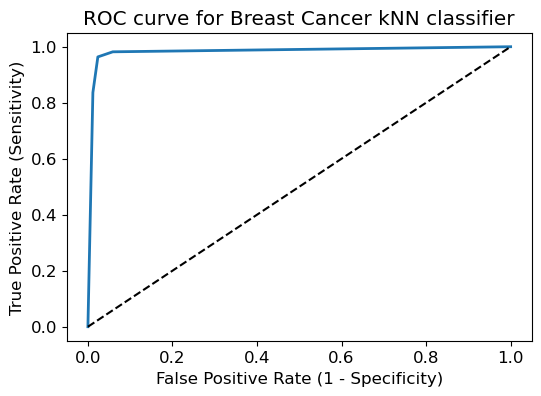

In [75]:
# plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_1, pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

# ROC CURVE AUC

In [76]:
# compute ROC AUC
ROC_AUC = roc_auc_score(y_test, y_pred_1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9825


In [77]:
# calculate cross-validated ROC AUC 
Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9910


# K-fold Cross Validation

In [78]:
# Applying 10-Fold Cross Validation
scores = cross_val_score(knn_7, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.875      0.96428571 0.94642857 0.98214286 0.96428571 0.96428571
 0.98214286 0.98214286 1.         0.98181818]


In [79]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.9643


# QUESTION 5

# Consider a dataset, use Random Forest to predict the output class. Vary the number of trees as follows and compare the results:(i) 20	(ii) 50		(iii) 100	(iv) 200	(v) 500

# IMPORT THE NECESSARY LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# import category encoders
import category_encoders as ce
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# IMPORT THE DATASET

In [2]:
data = 'car_evaluation.csv'
df = pd.read_csv(data, header=None)

In [3]:
df

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


# Exploratory Data Analysis

In [4]:
# view dimensions of dataset
df.shape

(1728, 7)

# View top 5 rows of the dataset

In [5]:
# preview the dataset
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Rename the column names

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# View Summary Of the dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Frequency Distribution Of values in the Dataset

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
for col in col_names:  
    print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


# Explore Class Variables

In [10]:
df['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

# Missing Values In the Dataset

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

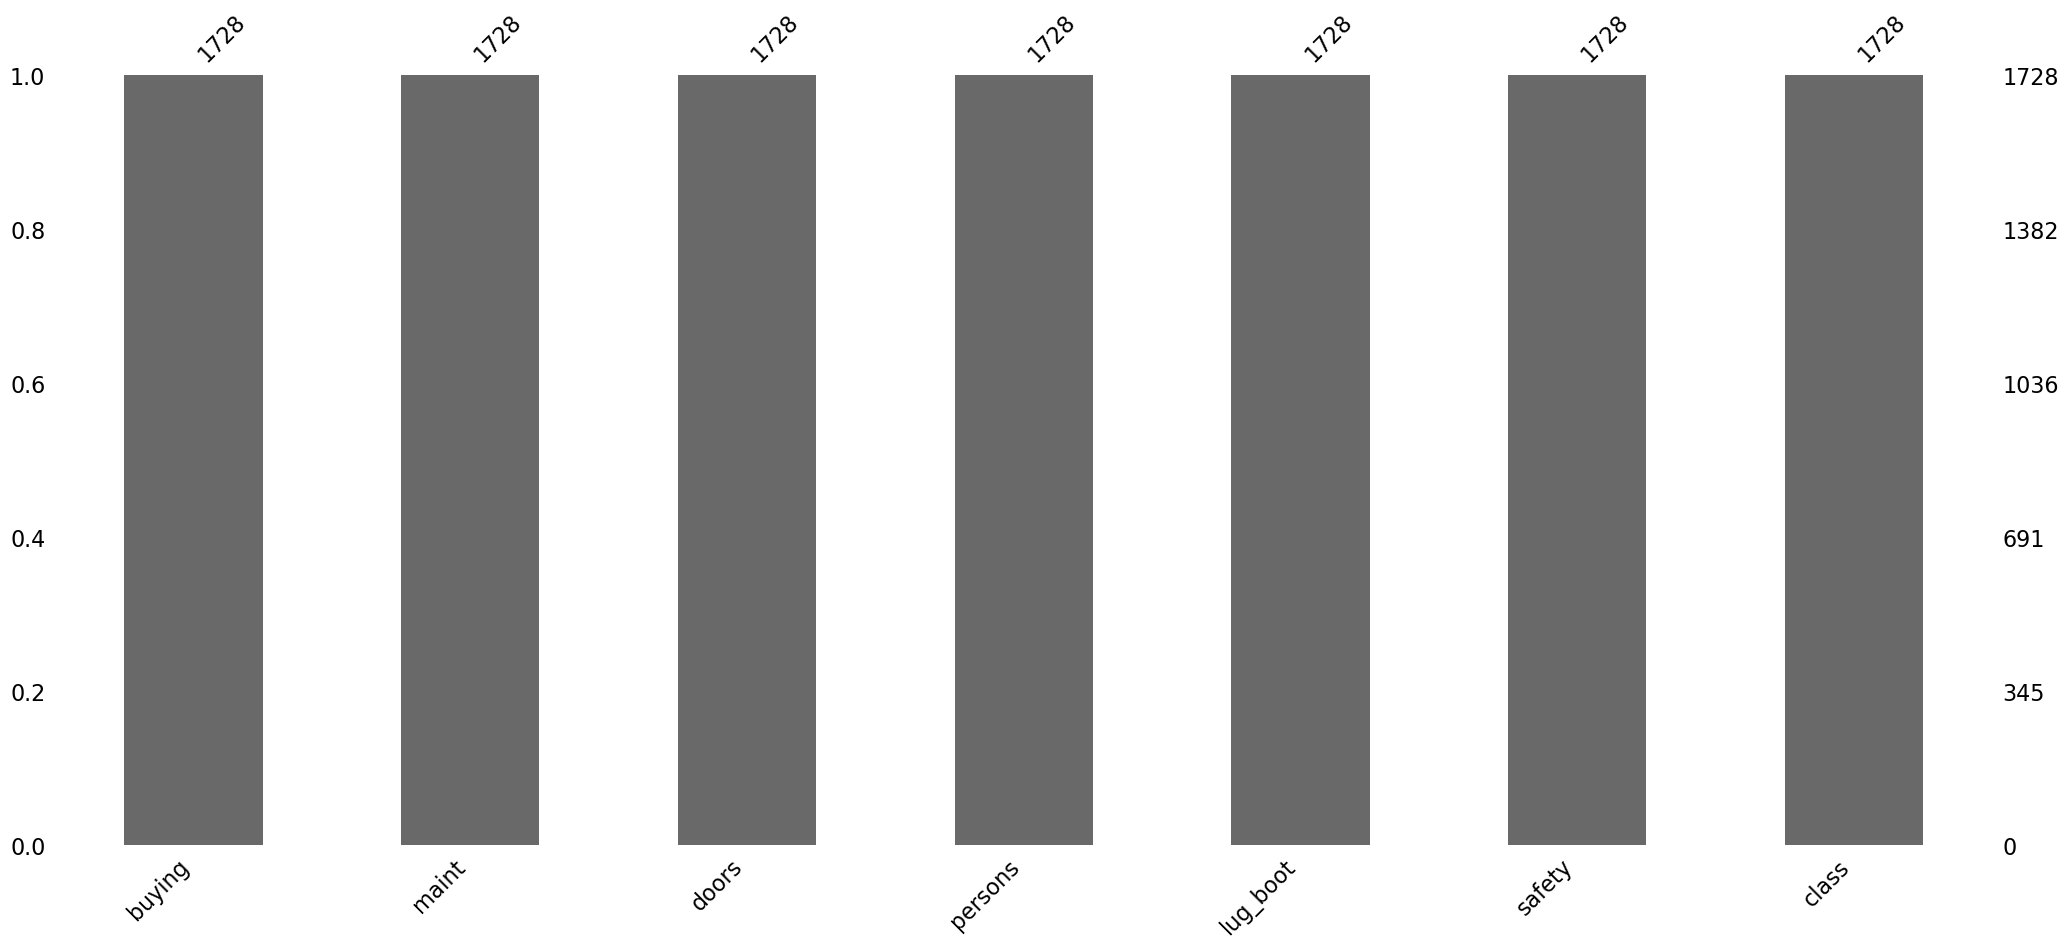

In [12]:
#Visualise the missing Values
p = msno.bar(df)

# Declare the Feature Vector and Target Variable

In [13]:
X = df.drop(['class'], axis=1)
y = df['class']

# Split the Data into Separate Training and Testing Set

In [14]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [15]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# Feature Engineering

In [16]:
# check data types in X_train
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

# Encode Categorical Variables

In [17]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [18]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


# Random Forest Classifier With Default Parameters

In [21]:
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
print('Model accuracy score with default decision-trees of random Forest : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default decision-trees of random Forest : 0.9457


# Random Forest Classifier model with parameter n_estimators=20

In [22]:
# instantiate the classifier with n_estimators = 20
rfc_20 = RandomForestClassifier(n_estimators=20, random_state=0)
# fit the model to the training set
rfc_20.fit(X_train, y_train)
# Predict on the test set results
y_pred_20 = rfc_20.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 20 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_20)))

Model accuracy score with 20 decision-trees : 0.9370


# Random Forest Classifier model with parameter n_estimators=50

In [23]:
# instantiate the classifier with n_estimators = 50
rfc_50 = RandomForestClassifier(n_estimators=50, random_state=0)
# fit the model to the training set
rfc_50.fit(X_train, y_train)
# Predict on the test set results
y_pred_50 = rfc_50.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 20 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_50)))

Model accuracy score with 20 decision-trees : 0.9422


# Random Forest Classifier model with parameter n_estimators=100

In [24]:
# instantiate the classifier with n_estimators = 100
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


# Random Forest Classifier model with parameter n_estimators=200

In [25]:
# instantiate the classifier with n_estimators = 200
rfc_200 = RandomForestClassifier(n_estimators=200, random_state=0)
# fit the model to the training set
rfc_200.fit(X_train, y_train)
# Predict on the test set results
y_pred_200 = rfc_200.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 200 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_200)))

Model accuracy score with 200 decision-trees : 0.9405


# Random Forest Classifier model with parameter n_estimators=500

In [26]:
# instantiate the classifier with n_estimators = 500
rfc_500 = RandomForestClassifier(n_estimators=500, random_state=0)
# fit the model to the training set
rfc_500.fit(X_train, y_train)
# Predict on the test set results
y_pred_500 = rfc_500.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 500 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_500)))

Model accuracy score with 500 decision-trees : 0.9440


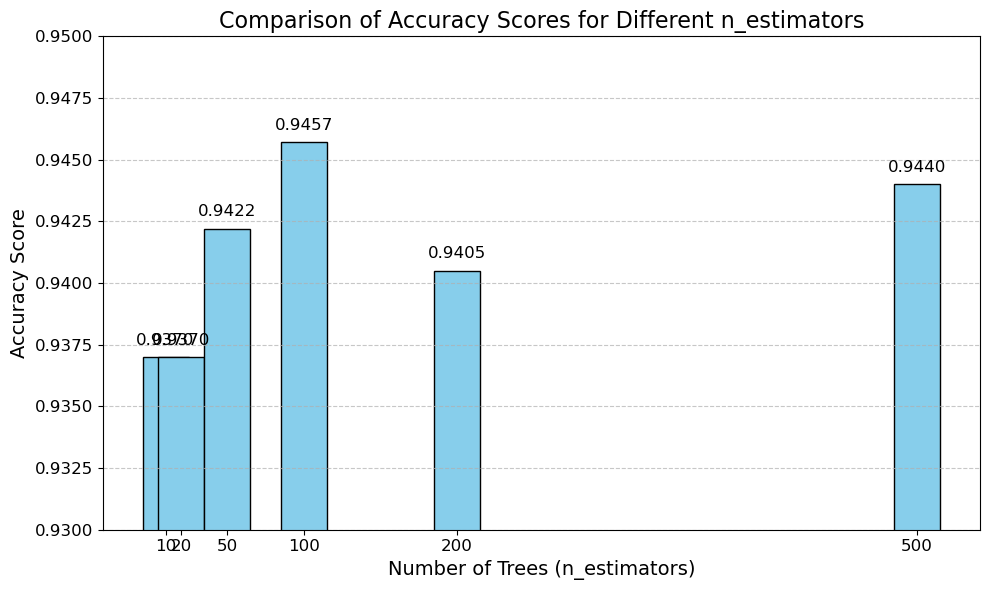

In [27]:
# Data: Number of trees and corresponding accuracy scores
n_estimators = [10, 20, 50, 100, 200, 500]
accuracy_scores = [0.9370, 0.9370, 0.9422, 0.9457, 0.9405, 0.9440]
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(n_estimators, accuracy_scores, color='skyblue', edgecolor='black', width=30)
# Adding labels and title
plt.xlabel('Number of Trees (n_estimators)', fontsize=14)
plt.ylabel('Accuracy Score', fontsize=14)
plt.title('Comparison of Accuracy Scores for Different n_estimators', fontsize=16)
plt.xticks(n_estimators, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0.93, 0.95)  # Adjusting y-axis limits for better visualization
# Display accuracy scores on top of bars
for i, score in enumerate(accuracy_scores):
    plt.text(n_estimators[i], score + 0.0005, f'{score:.4f}', ha='center', fontsize=12)
# Show plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Find Import Features With Random Forest Model

In [28]:
# create the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [29]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

# Visualize The Feature Scores

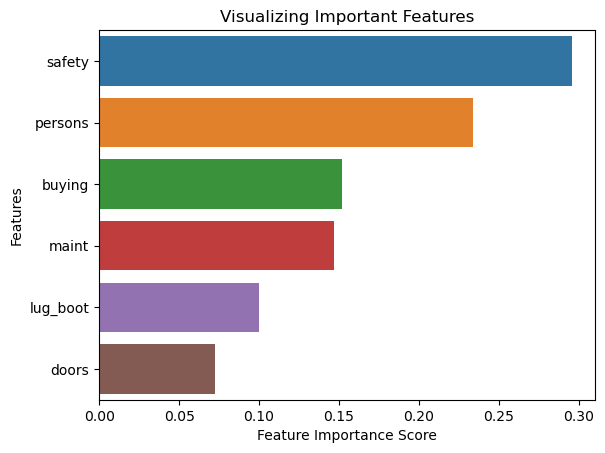

In [30]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

# Build Random Forest Model On Selected Features

In [31]:
# declare feature vector and target variable
X = df.drop(['class', 'doors'], axis=1)
y = df['class']

In [32]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [33]:
# encode categorical variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [34]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(random_state=0)
# fit the model to the training set
clf.fit(X_train, y_train)
# Predict on the test set results
y_pred = clf.predict(X_test)
# Check accuracy score 
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


# Confusion Matrix

In [35]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[104  12  10   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


# Classification Report

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.81      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.97      0.97      0.97       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.93      0.93      0.93       571



# QUESTION 6

# Implement Support Vector Machine for a dataset and compare the accuracy by applying the following kernel functions: (i) Linear	(ii) Polynomial		(iii) RBF

# IMPORT NECESSARY LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
# import SVC classifier
from sklearn.svm import SVC
import warnings
import missingno as msno
warnings.filterwarnings('ignore')

In [2]:
data = 'pulsar_stars.csv'
df = pd.read_csv(data)

# EXPLORATORY DATA ANALYSIS

In [3]:
#View the dimensions of the Dataset
df.shape

(17898, 9)

# View the first 5 rows of the dataset

In [4]:
#Preview the dataset
df.head()

,Mean_of_the_integrated_profile,Standard_deviation_of_the_integrated_profile,Excess_kurtosis_of_the_integrated_profile,Skewness_of_the_integrated_profile,Mean_of_the_DM_SNR_curve,Standard_deviation_of_the_DM_SNR_curve,Excess_kurtosis_of_the_DM_SNR_curve,Skewness_of_the_DM_SNR_curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
# view the column names of the dataframe
col_names = df.columns
col_names

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_deviation_of_the_DM_SNR_curve',
       ' Excess_kurtosis_of_the_DM_SNR_curve', ' Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')

In [6]:
# remove leading spaces from column names
df.columns = df.columns.str.strip()

In [7]:
# view column names again
df.columns

Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM_SNR_curve',
       'Standard_deviation_of_the_DM_SNR_curve',
       'Excess_kurtosis_of_the_DM_SNR_curve', 'Skewness_of_the_DM_SNR_curve',
       'target_class'],
      dtype='object')

In [8]:
# rename column names
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [9]:
# view the renamed column names
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [10]:
# check distribution of target_class column
df['target_class'].value_counts()

target_class
0    16259
1     1639
Name: count, dtype: int64

In [12]:
# view the percentage distribution of target_class column
df['target_class'].value_counts()/float(len(df))

target_class
0    0.908426
1    0.091574
Name: count, dtype: float64

In [13]:
# view summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          17898 non-null  float64
 1   IP Sd            17898 non-null  float64
 2   IP Kurtosis      17898 non-null  float64
 3   IP Skewness      17898 non-null  float64
 4   DM-SNR Mean      17898 non-null  float64
 5   DM-SNR Sd        17898 non-null  float64
 6   DM-SNR Kurtosis  17898 non-null  float64
 7   DM-SNR Skewness  17898 non-null  float64
 8   target_class     17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


# Explore the missing values in variables

In [14]:
# check for missing values in variables
df.isnull().sum()

IP Mean            0
IP Sd              0
IP Kurtosis        0
IP Skewness        0
DM-SNR Mean        0
DM-SNR Sd          0
DM-SNR Kurtosis    0
DM-SNR Skewness    0
target_class       0
dtype: int64

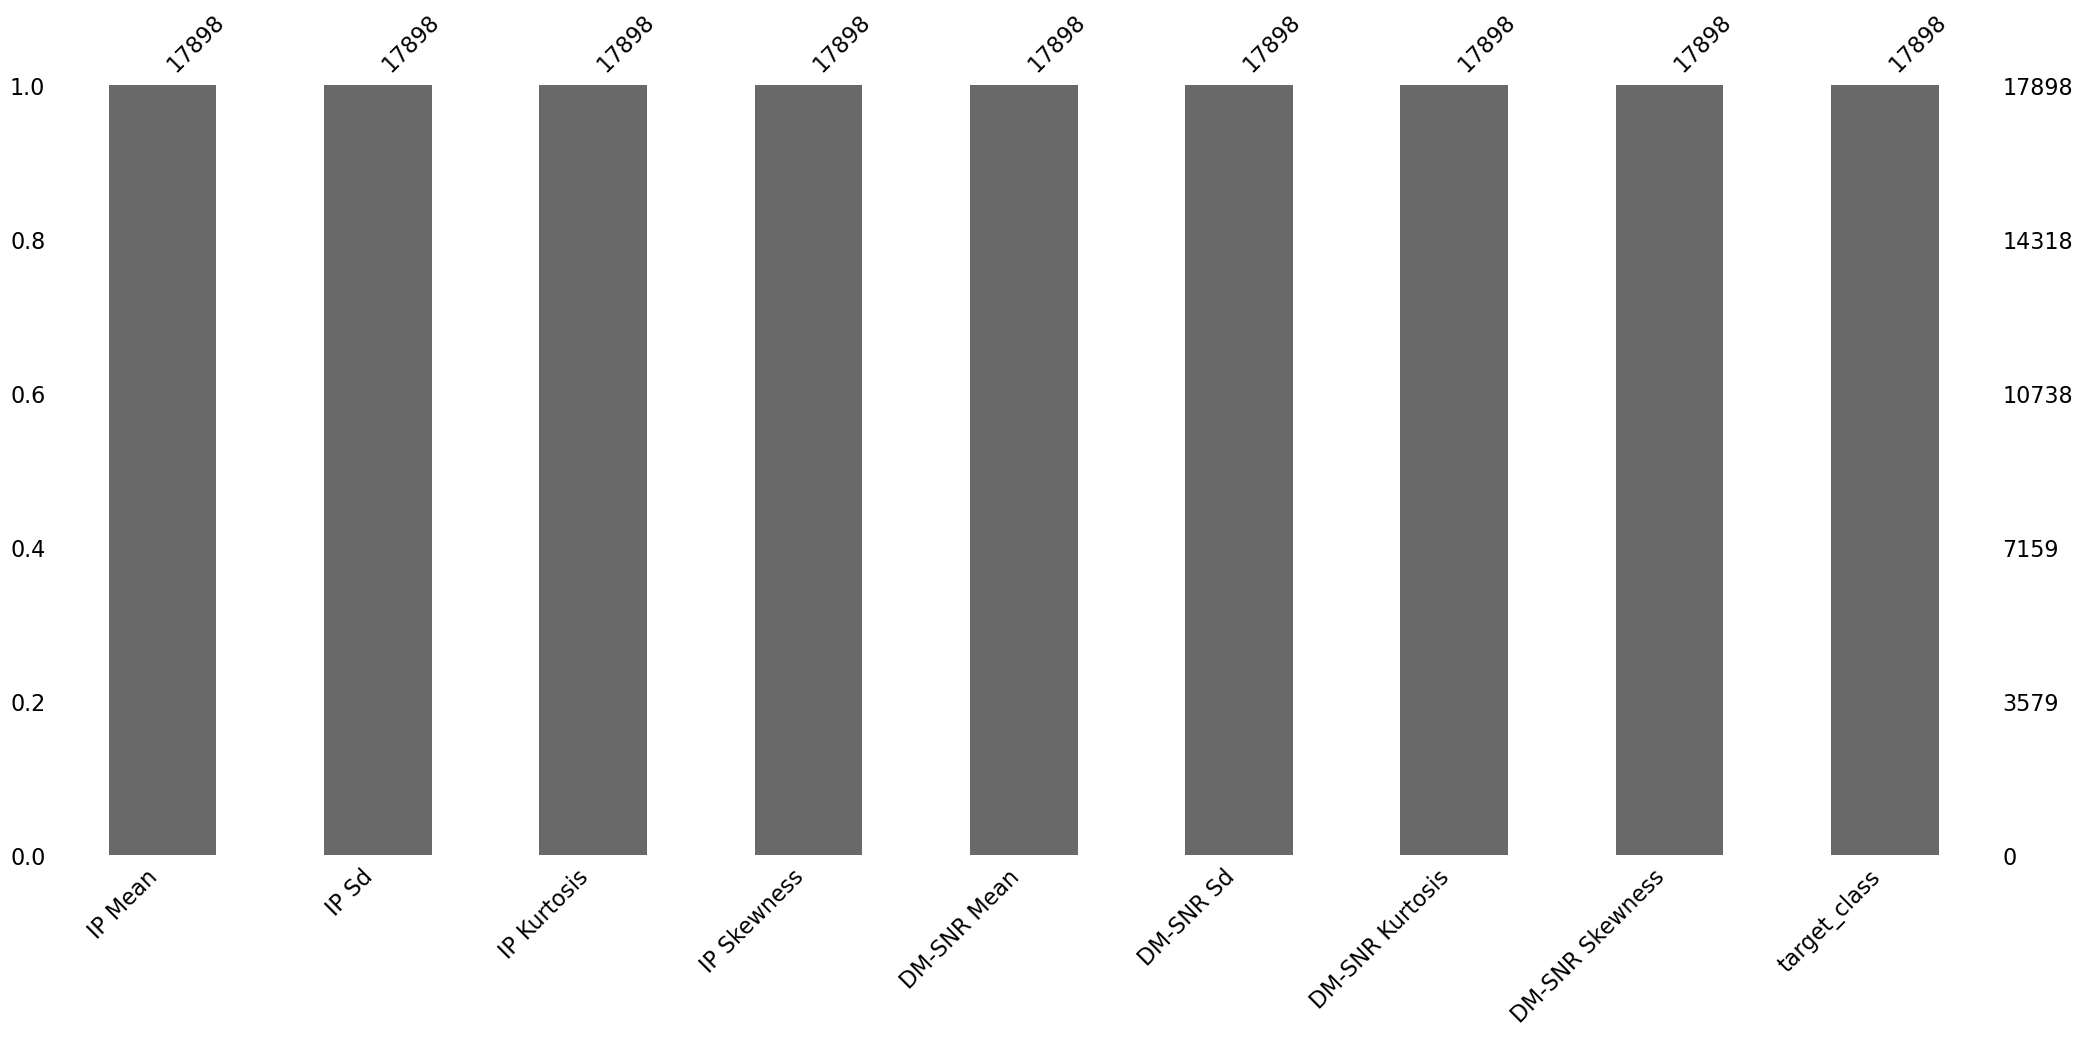

In [15]:
#Visualise the missing values
p = msno.bar(df)

# Outliers In Numerical Variables

In [16]:
# view summary statistics in numerical variables
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00,17898.00
mean,111.08,46.55,0.48,1.77,12.61,26.33,8.30,104.86,0.09
std,25.65,6.84,1.06,6.17,29.47,19.47,4.51,106.51,0.29
min,5.81,24.77,-1.88,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.93,42.38,0.03,-0.19,1.92,14.44,5.78,34.96,0.00
50%,115.08,46.95,0.22,0.20,2.80,18.46,8.43,83.06,0.00
75%,127.09,51.02,0.47,0.93,5.46,28.43,10.70,139.31,0.00
max,192.62,98.78,8.07,68.10,223.39,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

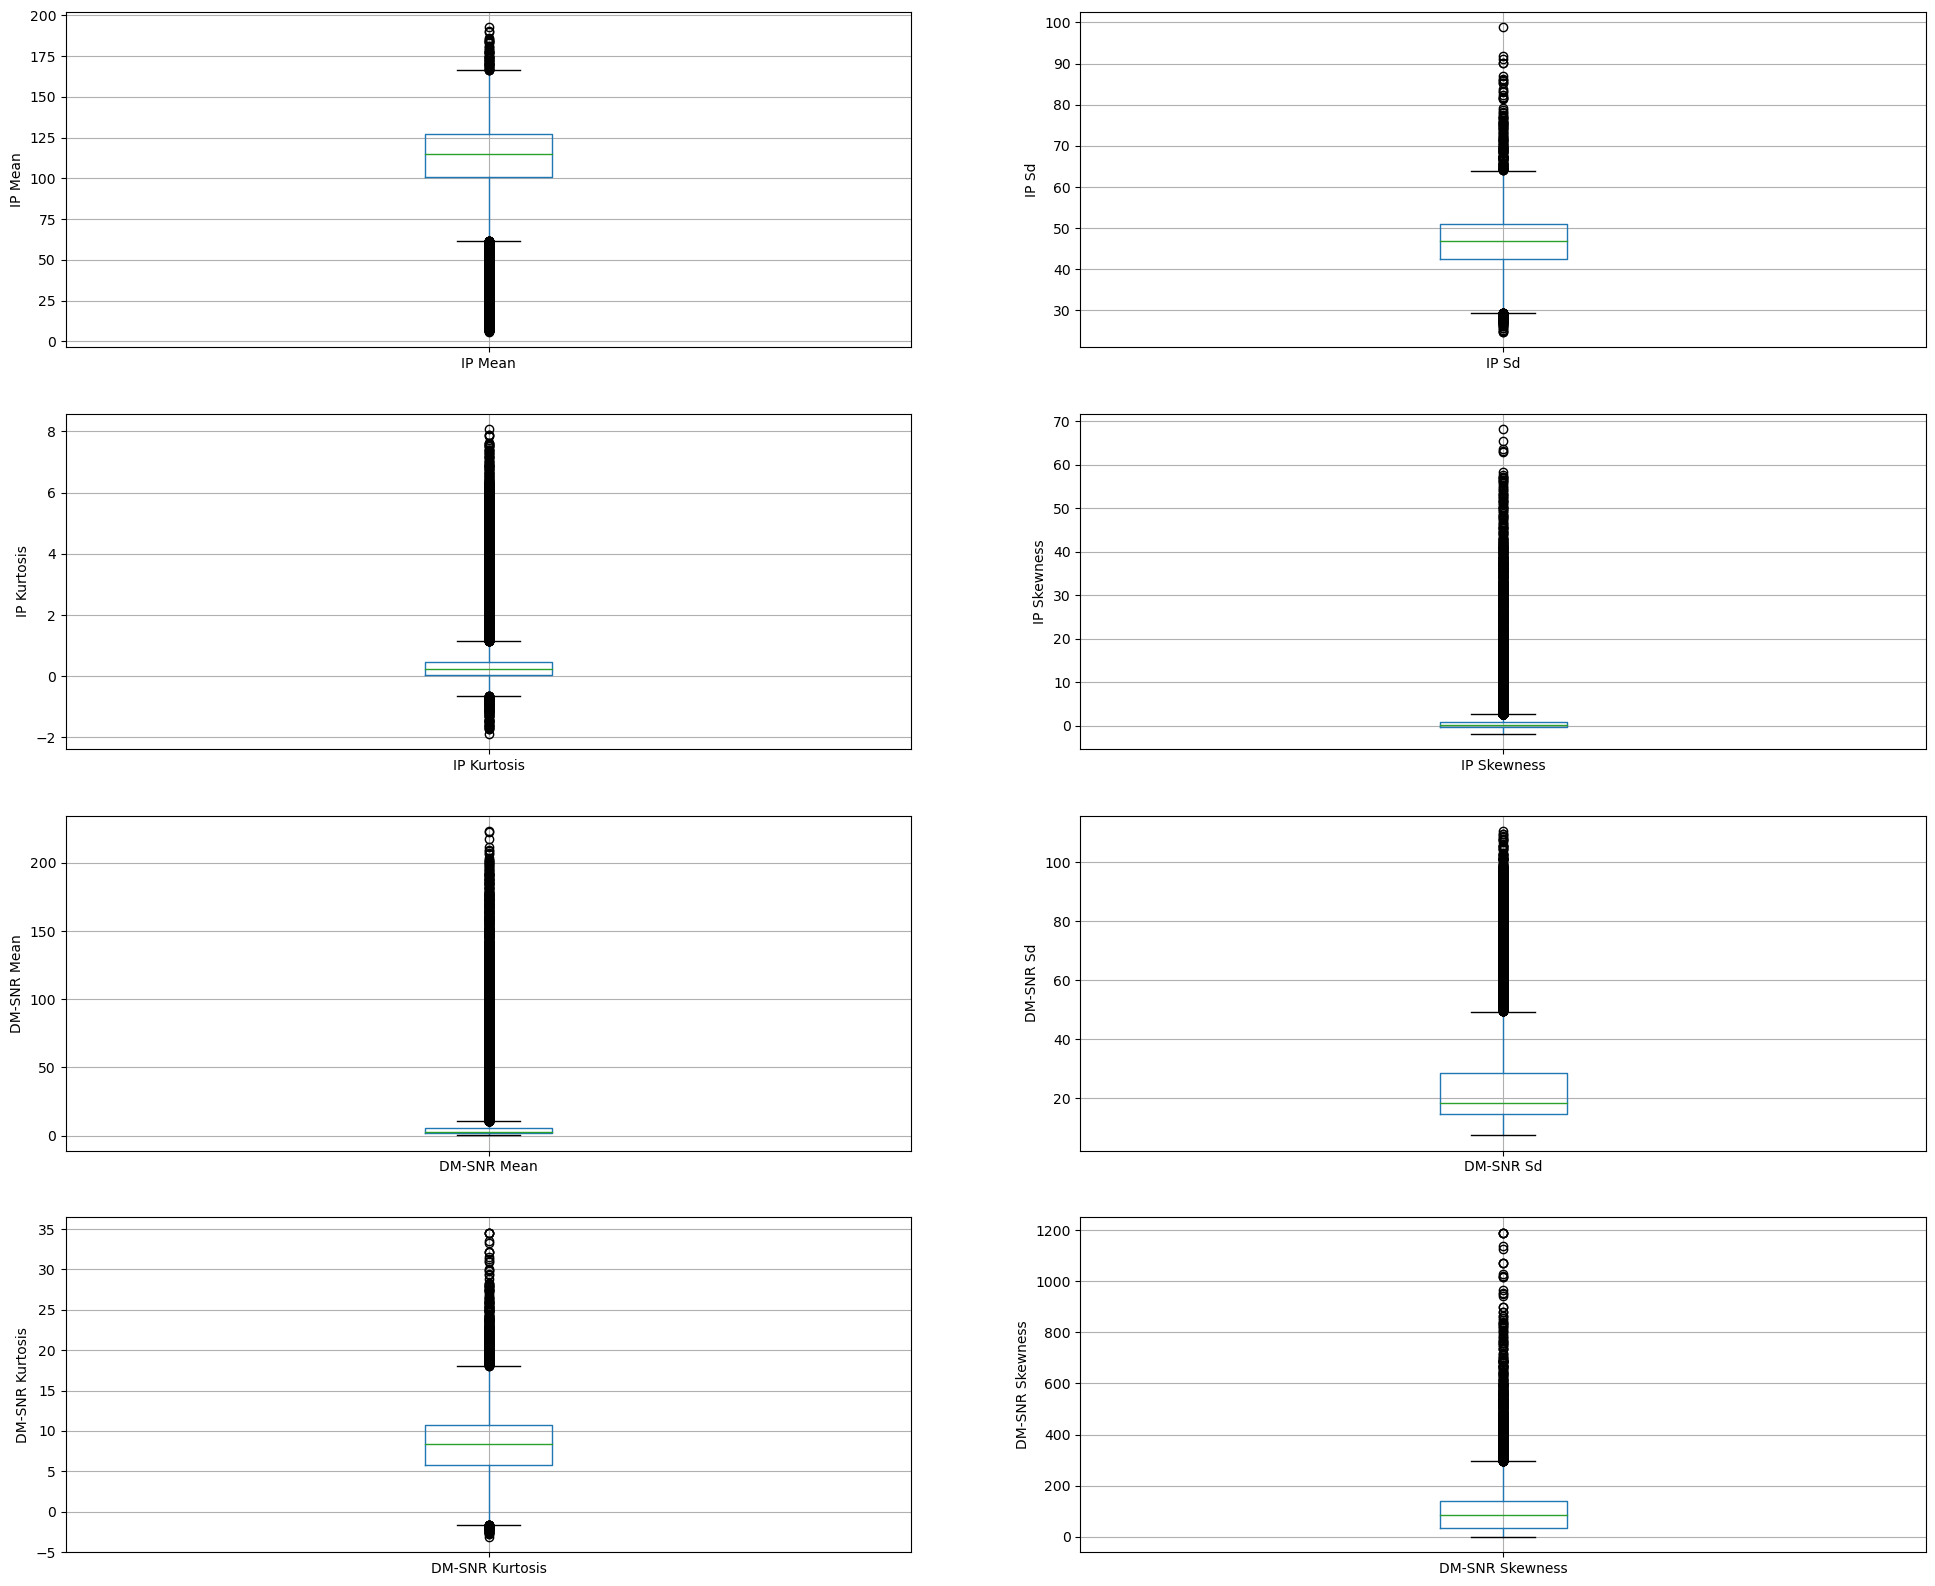

In [17]:
# draw boxplots to visualize outliers
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')

plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')

plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')

plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')

plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')

plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')

plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')

plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

# Check the Distribution Of variables

Text(0, 0.5, 'Number of pulsar stars')

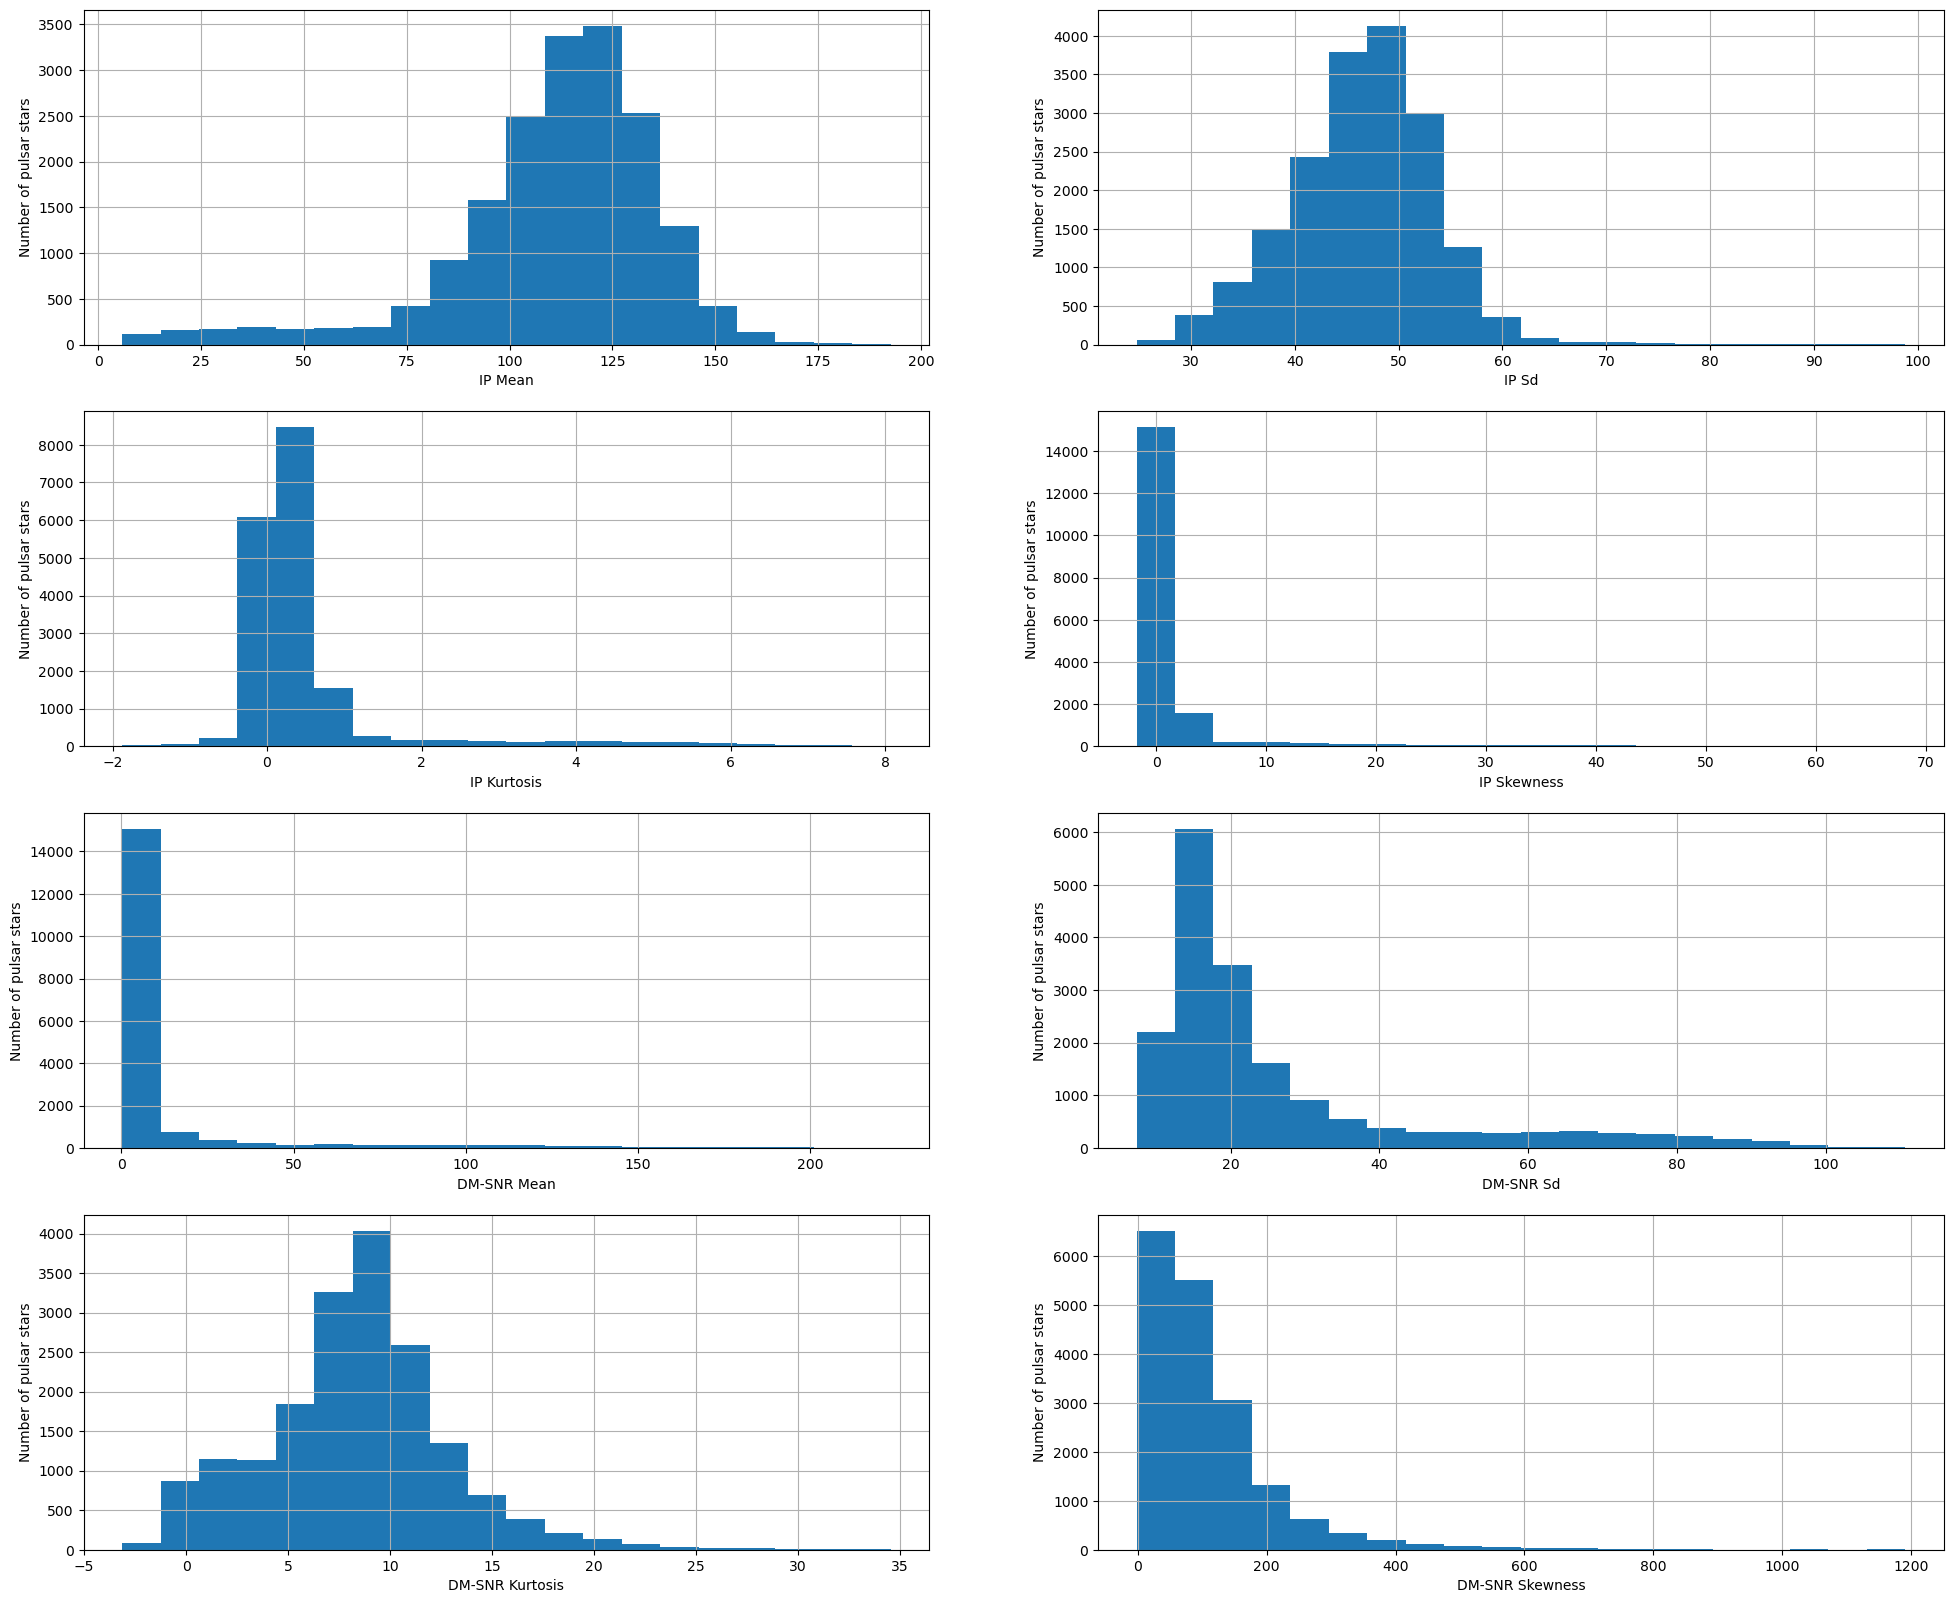

In [18]:
# plot histogram to check distribution
plt.figure(figsize=(24,20))

plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')

plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')

# Declare Feature Vector and Target Variable

In [19]:
X = df.drop(['target_class'], axis=1)
y = df['target_class']

# Split the data Into Separate Training and Testing Sets

In [20]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [21]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((14318, 8), (3580, 8))

# Feature Scaling

In [22]:
cols = X_train.columns

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [25]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [26]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04,1.431800e+04
mean,1.908113e-16,-6.550610e-16,1.042143e-17,3.870815e-17,-8.734147e-17,-1.617802e-16,-1.513588e-17,1.122785e-16
std,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00,1.000035e+00
min,-4.035499e+00,-3.181033e+00,-2.185946e+00,-5.744051e-01,-4.239001e-01,-9.733707e-01,-2.455649e+00,-1.003411e+00
25%,-3.896291e-01,-6.069473e-01,-4.256221e-01,-3.188054e-01,-3.664918e-01,-6.125457e-01,-5.641035e-01,-6.627590e-01
50%,1.587461e-01,5.846646e-02,-2.453172e-01,-2.578142e-01,-3.372294e-01,-4.067482e-01,3.170446e-02,-2.059136e-01
75%,6.267059e-01,6.501017e-01,-1.001238e-02,-1.419621e-01,-2.463724e-01,1.078934e-01,5.362759e-01,3.256217e-01
max,3.151882e+00,7.621116e+00,7.008906e+00,1.054430e+01,7.025568e+00,4.292181e+00,5.818557e+00,1.024613e+01


# Run SVM with Default Parameters

In [27]:
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC() 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9827


# Run SVM with rbf Kernel and C=100

In [28]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9832


# Run SVM with rbf Kernel and C=1000

In [29]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 
# fit classifier to training set
svc.fit(X_train,y_train)
# make predictions on test set
y_pred=svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9816


# Run SVM with linear Kernel and C=1.0

In [30]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 
# fit classifier to training set
linear_svc.fit(X_train,y_train)
# make predictions on test set
y_pred_test=linear_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9830


# Run SVM with linear Kernel and C=100.0

In [31]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 
# fit classifier to training set
linear_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9832


# Run SVM with linear Kernel and C=1000.0

In [32]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 
# fit classifier to training set
linear_svc1000.fit(X_train, y_train)
# make predictions on test set
y_pred=linear_svc1000.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9832


# Compare the train set and test set accuracy

In [33]:
y_pred_train = linear_svc.predict(X_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [34]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9783


# Check for Overfitting and Underfitting

In [35]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9783
Test set score: 0.9830


# Compare Model accuracy with Null accuracy

In [36]:
# check class distribution in test set
y_test.value_counts()

target_class
0    3306
1     274
Name: count, dtype: int64

In [37]:
# check null accuracy score
null_accuracy = (3306/(3306+274))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


# Run SVM with Polynomial Kernel and C=1.0

In [38]:
# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=1.0) 
# fit classifier to training set
poly_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=poly_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9807


# Run SVM with Polynomial Kernel and C=100.0

In [39]:
# instantiate classifier with polynomial kernel and C=100.0
poly_svc100=SVC(kernel='poly', C=100.0) 
# fit classifier to training set
poly_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=poly_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9824


# Run SVM with Sigmoid Kernel and C=1.0

In [40]:
# instantiate classifier with sigmoid kernel and C=1.0
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 
# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.8858


# Run SVM with Sigmoid Kernel and C=100.0

In [41]:
# instantiate classifier with sigmoid kernel and C=100.0
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 
# fit classifier to training set
sigmoid_svc100.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=100.0 : 0.8855


# CONFUSION MATRIX

In [42]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[3289   17]
 [  44  230]]

True Positives(TP) =  3289

True Negatives(TN) =  230

False Positives(FP) =  17

False Negatives(FN) =  44


<Axes: >

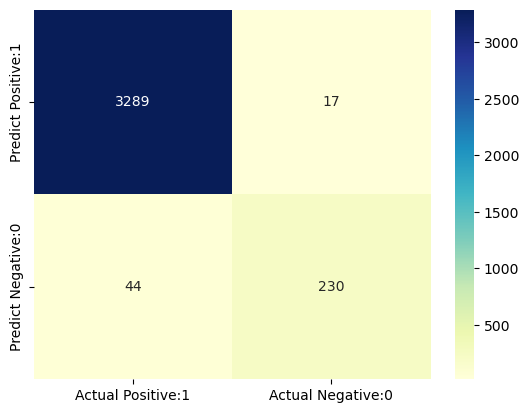

In [43]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# CLASSIFICATION METRICES

# Classification Report

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3306
           1       0.93      0.84      0.88       274

    accuracy                           0.98      3580
   macro avg       0.96      0.92      0.94      3580
weighted avg       0.98      0.98      0.98      3580



# Classification Accuracy

In [45]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [46]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9830


# Classification Error

In [47]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0170


# Precision

In [48]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9949


# Recall

In [49]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9868


# True Positive Rate

In [50]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9868


# False Positive Rate

In [51]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.0688


# Specificity

In [52]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.9312


In [53]:
from sklearn.svm import SVR
model = SVR()
print(model.get_params())

{'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# QUESTION 7

# Write a python program to implement K-Means clustering Algorithm. Vary the number of k values as follows and compare the results: (i) 1		(ii) 3		(iii) 5

# IMPORT THE LIBRARIES

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# IMPORT THE DATASET

In [2]:
data = 'Live.csv'
df = pd.read_csv(data)

# EXPLORATORY DATA ANALYSIS

Check the shape of the dataset

In [3]:
df.shape

(7050, 16)

Preview the dataset

In [4]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


View Summary Of Dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Check For missing values

In [6]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

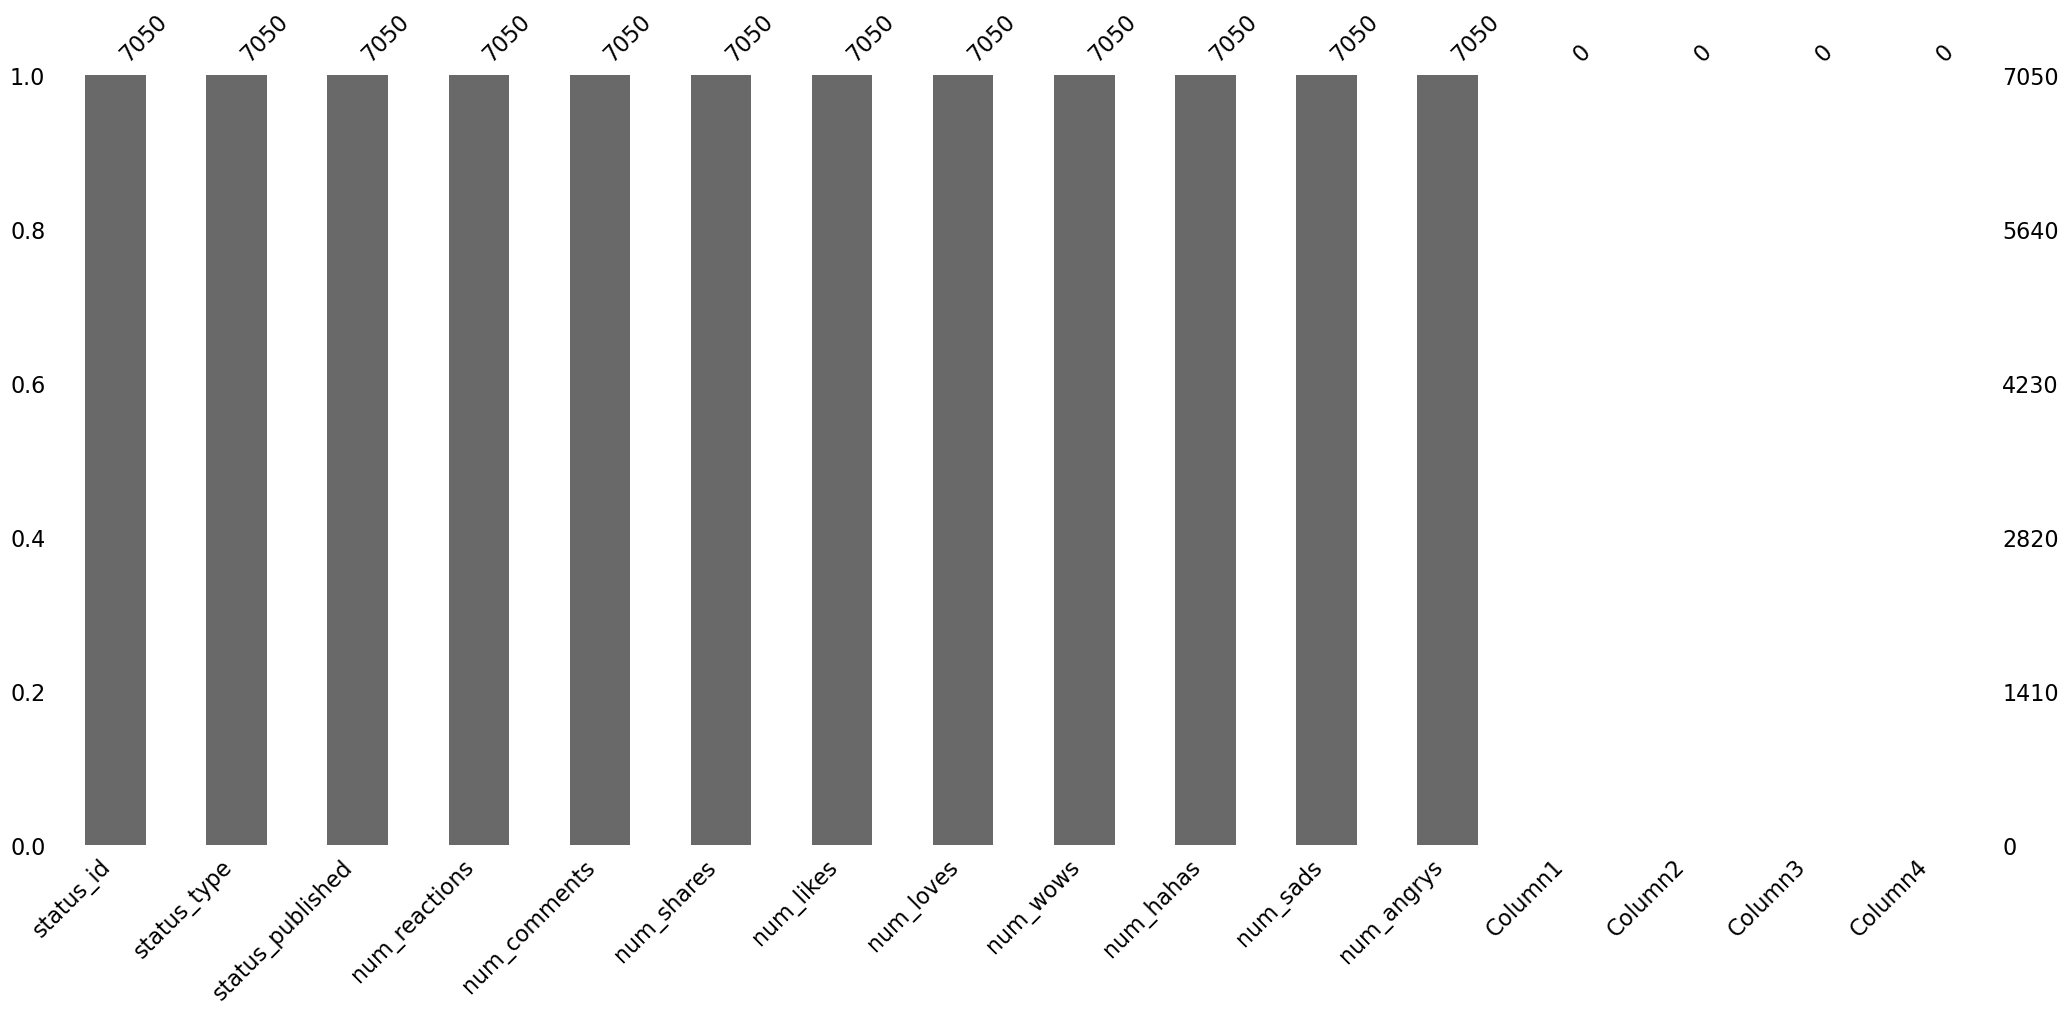

In [7]:
#Visualize the missing values
import missingno as msno
p = msno.bar(df)

In [8]:
#Drop the redundant columns
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

Again view the summary Of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


View statistical summary of the numerical variables

In [10]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Explore Status_id variable

In [11]:
# view the labels in the variable
df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [12]:
# view how many different types of variables are there
len(df['status_id'].unique())

6997

Explore status_published variable

In [13]:
# view the labels in the variable
df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [14]:
# view how many different types of variables are there
len(df['status_published'].unique())

6913

Explore status_type variable

In [15]:
# view the labels in the variable
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [16]:
# view how many different types of variables are there
len(df['status_type'].unique())

4

### Drop `status_id` and `status_published` variable from the dataset

In [17]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

### View the dataset status again

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [19]:
#Preview the dataset
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


## Declare Feature Vector and Target Variable

In [20]:
X = df
y = df['status_type']

## Convert Categorical Variable into Integers

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

#### View Summary Of X

In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status_type    7050 non-null   int32
 1   num_reactions  7050 non-null   int64
 2   num_comments   7050 non-null   int64
 3   num_shares     7050 non-null   int64
 4   num_likes      7050 non-null   int64
 5   num_loves      7050 non-null   int64
 6   num_wows       7050 non-null   int64
 7   num_hahas      7050 non-null   int64
 8   num_sads       7050 non-null   int64
 9   num_angrys     7050 non-null   int64
dtypes: int32(1), int64(9)
memory usage: 523.4 KB


### Preview the dataset X

In [23]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


# Feature Scaling

In [24]:
cols = X.columns

In [25]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
X = ms.fit_transform(X)

In [26]:
X = pd.DataFrame(X, columns=[cols])

In [27]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# K-Means Model with two clusters

In [28]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

# K-means Model Parameter study

In [29]:
kmeans.cluster_centers_

array([[9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03],
       [3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03]])

In [30]:
kmeans.inertia_

237.75726404419646

# Check quality of weak classification by the model

In [31]:
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

Result: 4288 out of 7050 samples were correctly labeled.


In [32]:
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Accuracy score: 0.61


# Use elbow method to find optimal number of clusters

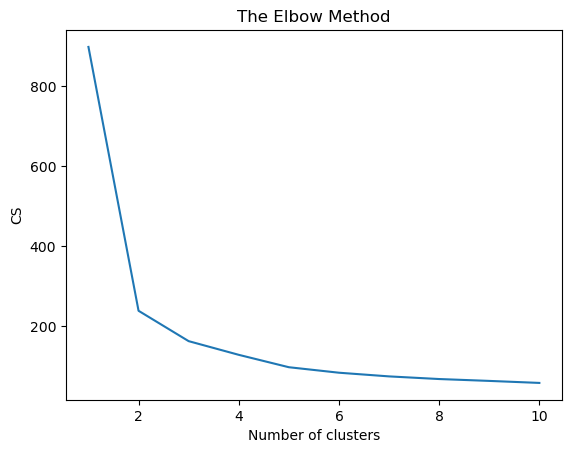

In [33]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(X)
labels = kmeans.labels_
# check how many of the samples were correctly labeled
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4288 out of 7050 samples were correctly labeled.
Accuracy score: 0.61


# K-Means Model With Different clusters

### K-Means model with 3 clusters

In [35]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4066 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


### K-Means model with 4 clusters

In [36]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4112 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


## K-Means model with 1 cluster

In [37]:
kmeans = KMeans(n_clusters=1, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 63 out of 7050 samples were correctly labeled.
Accuracy score: 0.01


### K-Means model with 5 clusters

In [39]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)
# check how many of the samples were correctly labeled
labels = kmeans.labels_
correct_labels = sum(y == labels)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 4080 out of 7050 samples were correctly labeled.
Accuracy score: 0.58


# QUESTION 8

# Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

# LOAD THE DATASET

In [2]:
data = 'adult.csv'  # Path to the CSV file containing the dataset
# Load the dataset into a DataFrame, treating commas (with optional spaces) as separators and assigning default column indices
df = pd.read_csv(data, header=None, sep=',\s')  


# EXPLORATORY DATA ANALYSIS

In [3]:
#View dimensions of the dataset
df.shape

(32561, 15)

In [4]:
#View top 5 rows of the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Rename the Column names

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']
df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [6]:
# Preview the dataset again
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## View summary of dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Explore categorical variables

In [8]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


## View categorical variables

In [9]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


# EXPLORE PROBLEMS IN CATEGORICAL VARIABLES

## Missing values in categorical data

In [10]:
df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

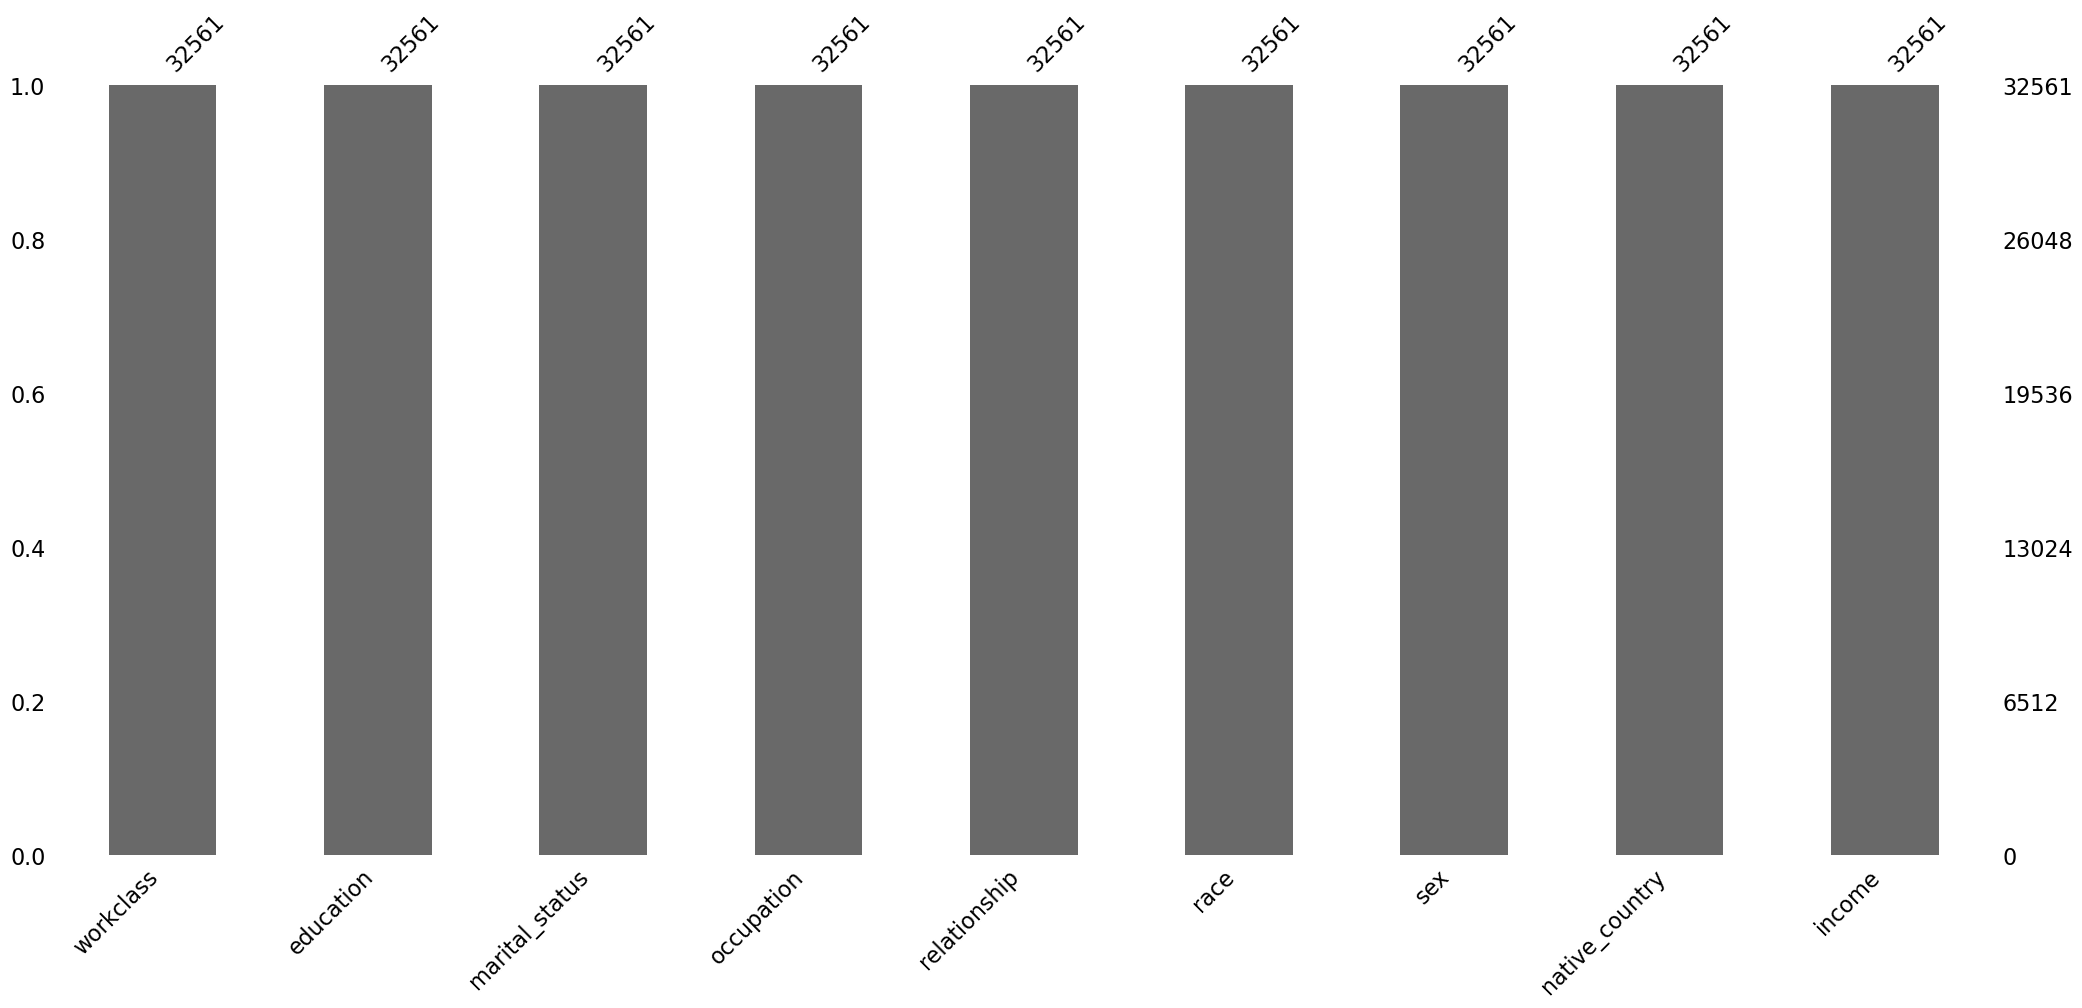

In [11]:
#Visualize the missing values in categorical data
p = msno.bar(df[categorical])

## Frequency counts of categorical variables

In [12]:
# view frequency counts of values in categorical variables
for var in categorical:
    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [13]:
# view frequency distribution of categorical variables
for var in categorical: 
    print(df[var].value_counts()/float(len(df)))

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: coun

## Explore Work class Variable

In [14]:
# check labels in workclass variable
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [15]:
# check frequency distribution of values in workclass variable
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [16]:
# replace '?' values in workclass variable with `NaN`
df['workclass'].replace('?', np.NaN, inplace=True)

In [17]:
#again check the frequence distribution of values in workclass variable
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

## Explore occupation variable

In [18]:
# Check labels in the occupation variable
df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [19]:
#Check the distribution of the values in the occupation variable
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [20]:
# Replace the '?' values in the occupation variable with 'NaN'
df['occupation'].replace('?',np.NaN, inplace=True)

In [21]:
# again view the frequency Distribution of the values in the occupation variables
df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

## Explore nativ_country variable

In [22]:
# Check labels in the native_country variable
df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [23]:
#check the frequency distribution of the values in the native_country variable
df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [24]:
# Replace the '?' values in the native_country variable with NaN
df['native_country'].replace('?', np.NaN, inplace=True)

In [25]:
# again view the frequency distribution of the values in the native country variable
df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

In [26]:
## Checking Missing values in categorical variables again
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

## Number of labels: Cardinality

In [27]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


## Explore Numerical Variables

In [28]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [29]:
#View the Numerical Variables
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


# Explore Problems In Numerical Variables

## Missing Values In Numerical Variables

In [30]:
df[numerical].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

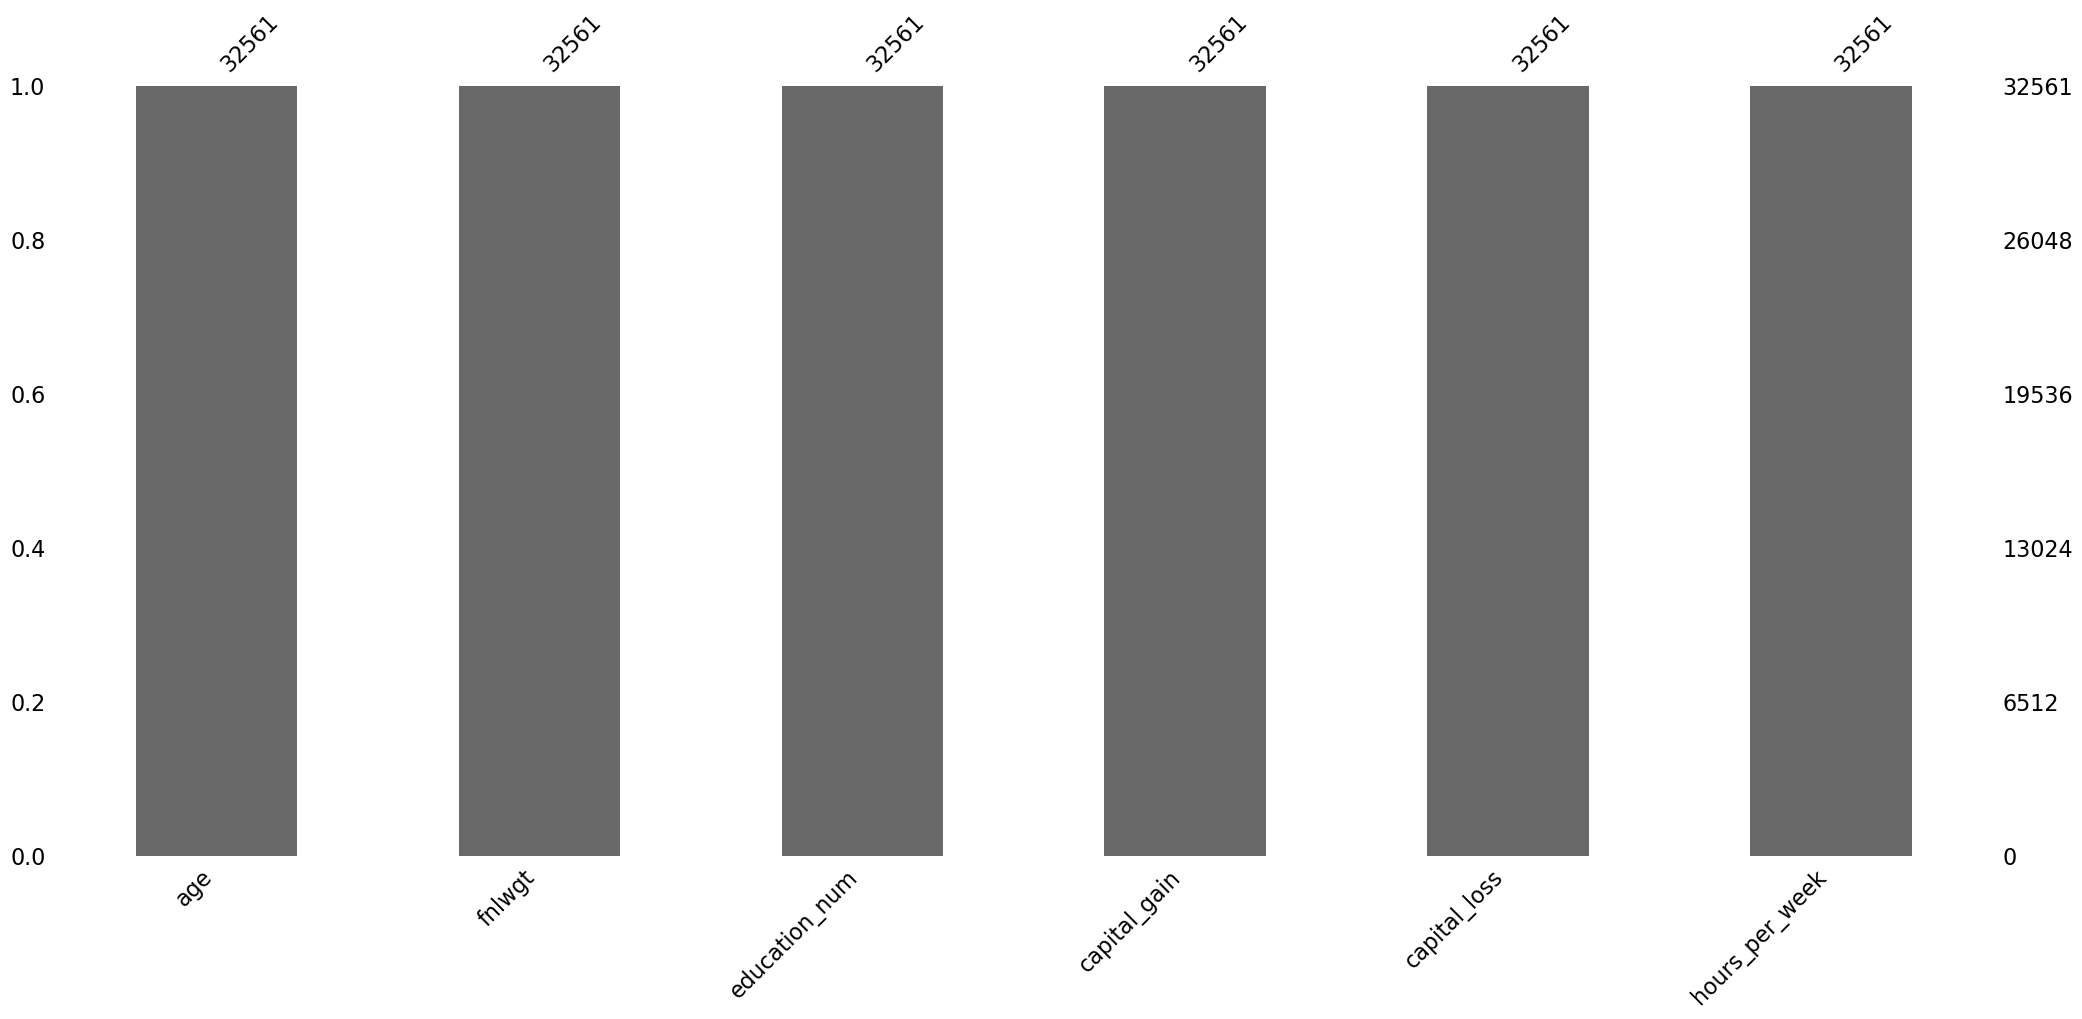

In [31]:
#Visualize the missing values in the Numerical Variables
p2 = msno.bar(df[numerical])

# Declare Feature Vector and Target Variables

In [32]:
X = df.drop(['income'], axis=1)
y = df['income']

# Split the data into separate training and testing set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
#Check for the shape of the X_train and X_test
X_test.shape, X_train.shape

((9769, 14), (22792, 14))

# Feature Engineering

In [35]:
# Check for data types in X_train
X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [36]:
# display categorical variables
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [37]:
# display numerical variables
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

## Engineering Missing values In categorical Variables

In [38]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [39]:
# print categorical variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [40]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)    

In [41]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [42]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [43]:
# check missing values in X_train
X_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

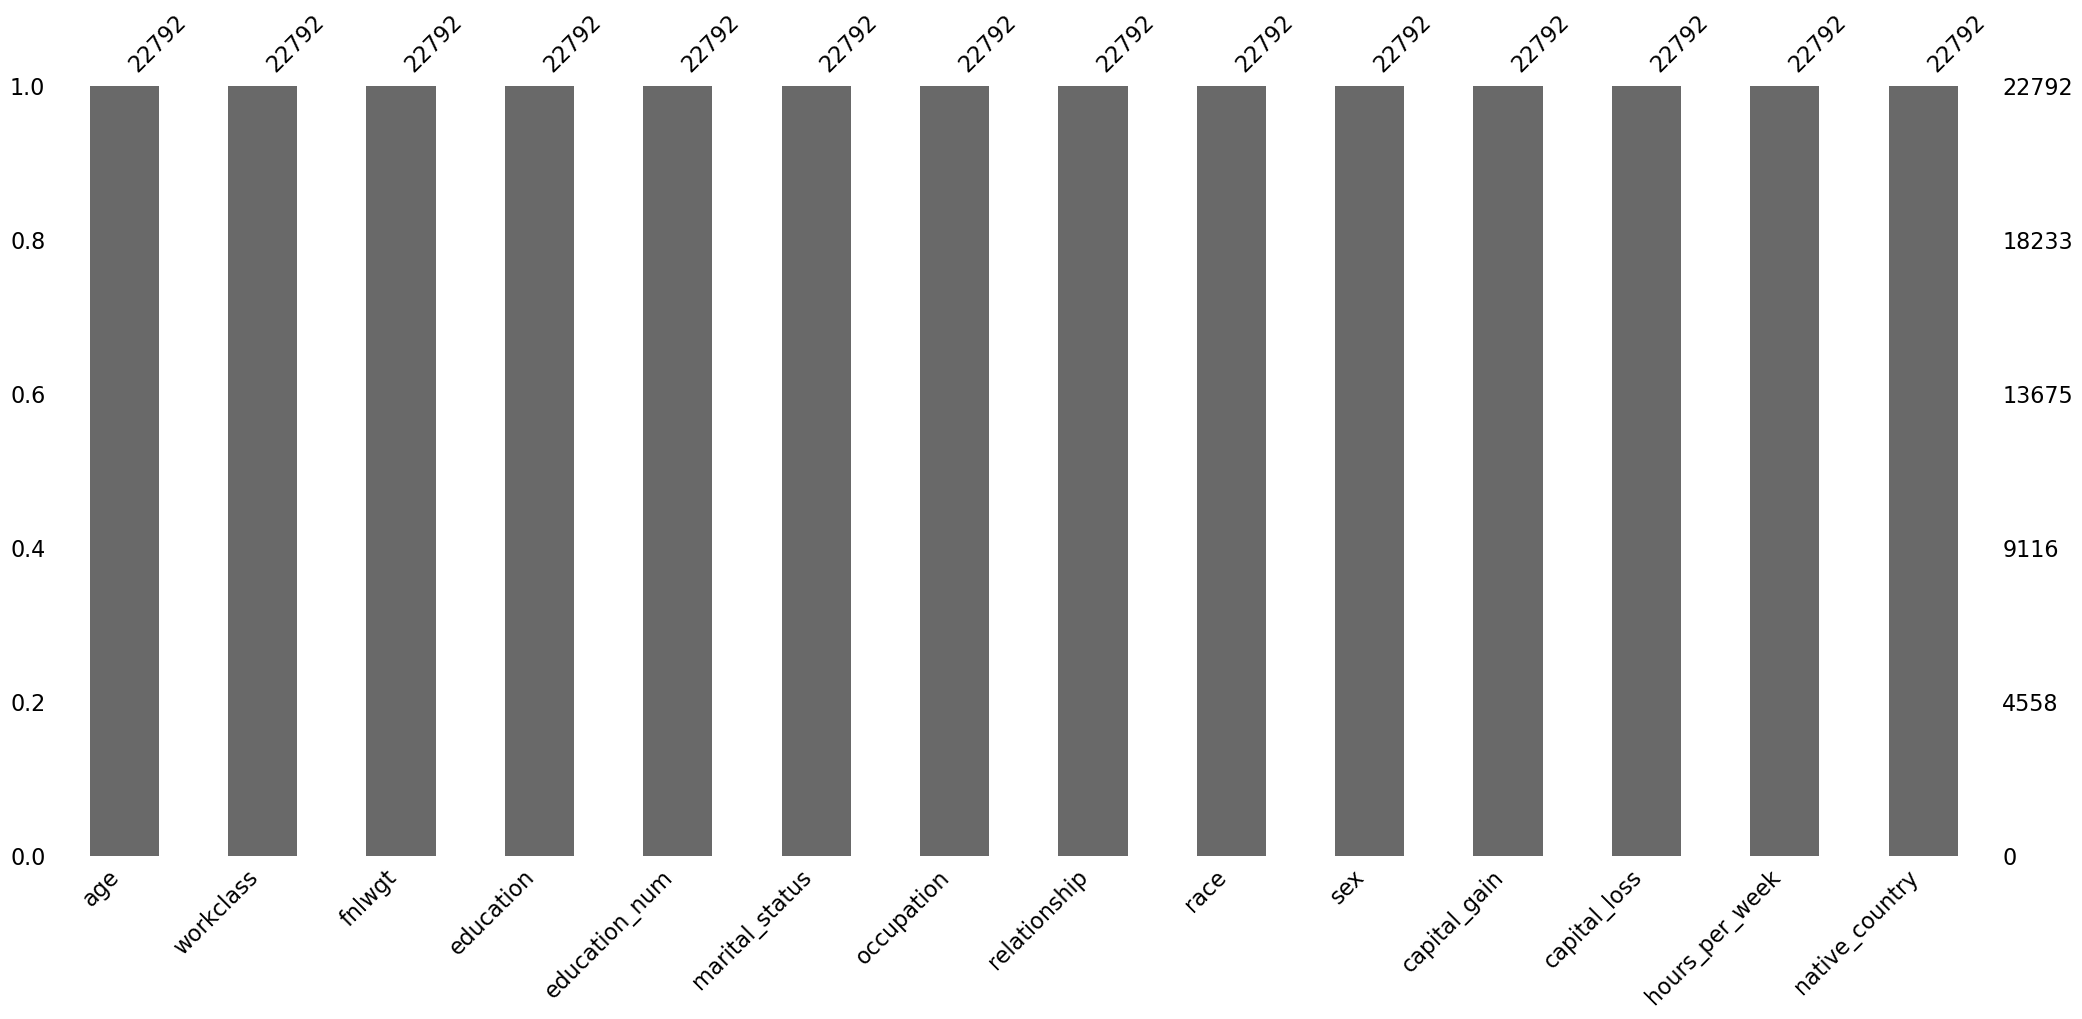

In [44]:
#Visualize the missing values in X_train
p3 = msno.bar(X_train)

In [45]:
# check missing values in X_test
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

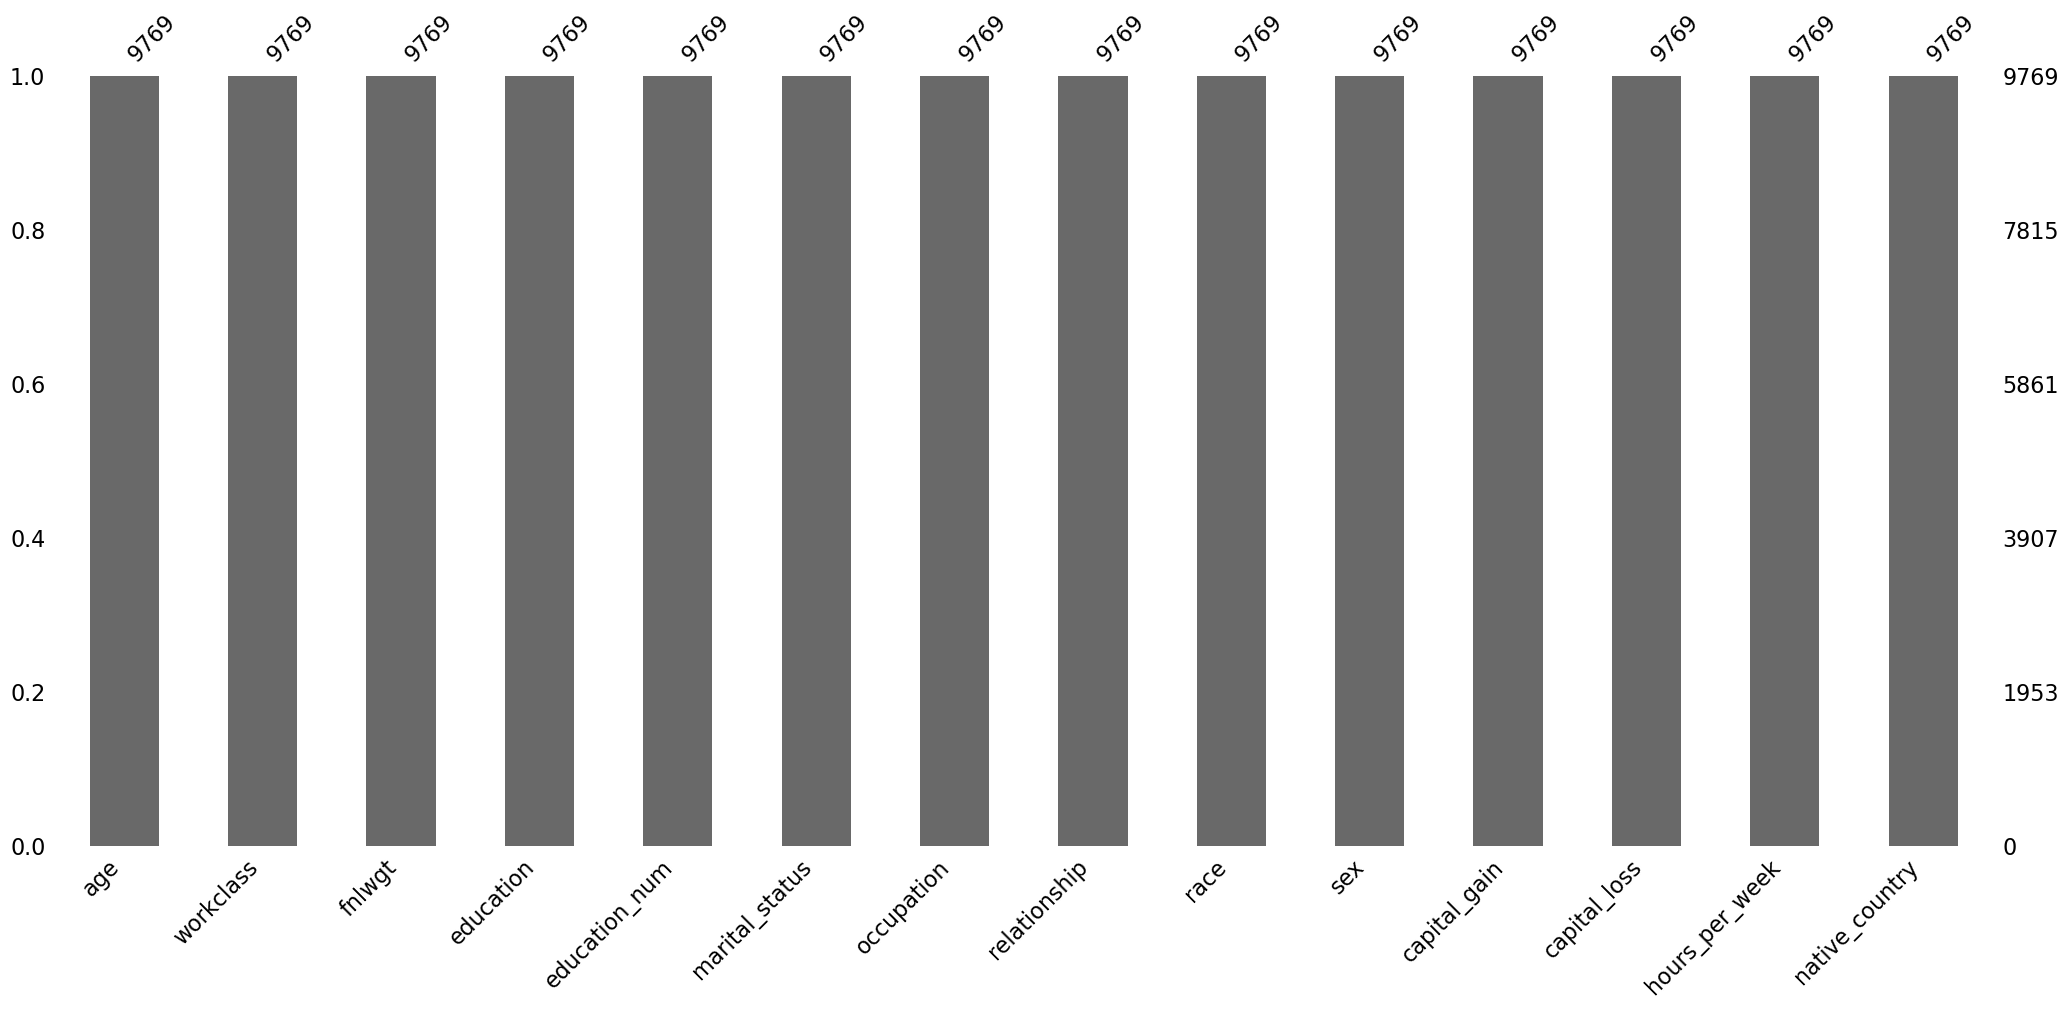

In [46]:
#Visualize the missing values in the X_test
p4 = msno.bar(X_test)

## Encode Categorical Variables

In [47]:
#Print categorical Variables
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [48]:
# Display the first 5 rows of the the Training set
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [49]:
# import category encoders
import category_encoders as ce

In [50]:
# encode remaining variables with one-hot encoding
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [51]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [52]:
X_train.shape

(22792, 105)

In [53]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_test.shape

(9769, 105)

# Feature Scaling

In [55]:
cols = X_train.columns

In [56]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [58]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [59]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.058906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.50,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.578076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.080425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.270650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.210240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Model Training

In [60]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)

GaussianNB()

# Predict the Results

In [61]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

# Check Accurancy Score

In [62]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8083


# Compare the train-set and test-set

In [63]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [64]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8067


In [65]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.8067
Test set score: 0.8083


## Compare Model accuracy with null accuracy

In [66]:
# check class distribution in test set
y_test.value_counts()

income
<=50K    7407
>50K     2362
Name: count, dtype: int64

In [67]:
# check null accuracy score
null_accuracy = (7407/(7407+2362))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


In [68]:
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5999 1408]
 [ 465 1897]]

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465


<Axes: >

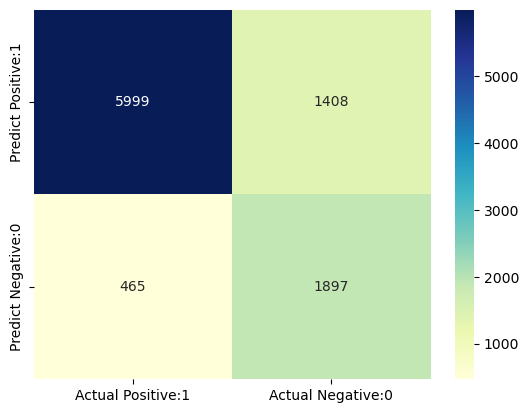

In [69]:
import seaborn as sns
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Classification Metrices

## Classification Report

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



## Classification Accuracy

In [71]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [72]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8083


## Classification Error

In [73]:
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1917


## Precision

In [74]:
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8099


## Recall

In [75]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9281


## True Positive Rate

In [76]:
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9281


## False Positive Rate

In [77]:
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.4260


## Specificity

In [78]:
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.5740


## Calculate Class Probabilities

In [79]:
# print the first 10 predicted probabilities of two classes- 0 and 1
y_pred_prob = gnb.predict_proba(X_test)[0:10]
y_pred_prob

array([[9.99999426e-01, 5.74152436e-07],
       [9.99687907e-01, 3.12093456e-04],
       [1.54405602e-01, 8.45594398e-01],
       [1.73624321e-04, 9.99826376e-01],
       [8.20121011e-09, 9.99999992e-01],
       [8.76844580e-01, 1.23155420e-01],
       [9.99999927e-01, 7.32876705e-08],
       [9.99993460e-01, 6.53998797e-06],
       [9.87738143e-01, 1.22618575e-02],
       [9.99999996e-01, 4.01886317e-09]])

In [80]:
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])
y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,5.741524e-07
1,9.996879e-01,3.120935e-04
2,1.544056e-01,8.455944e-01
3,1.736243e-04,9.998264e-01
4,8.201210e-09,1.000000e+00
5,8.768446e-01,1.231554e-01
6,9.999999e-01,7.328767e-08
7,9.999935e-01,6.539988e-06
8,9.877381e-01,1.226186e-02
9,1.000000e+00,4.018863e-09


In [81]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K
gnb.predict_proba(X_test)[0:10, 1]

array([5.74152436e-07, 3.12093456e-04, 8.45594398e-01, 9.99826376e-01,
       9.99999992e-01, 1.23155420e-01, 7.32876705e-08, 6.53998797e-06,
       1.22618575e-02, 4.01886317e-09])

In [82]:
# store the predicted probabilities for class 1 - Probability of >50K
y_pred1 = gnb.predict_proba(X_test)[:, 1]

Text(0, 0.5, 'Frequency')

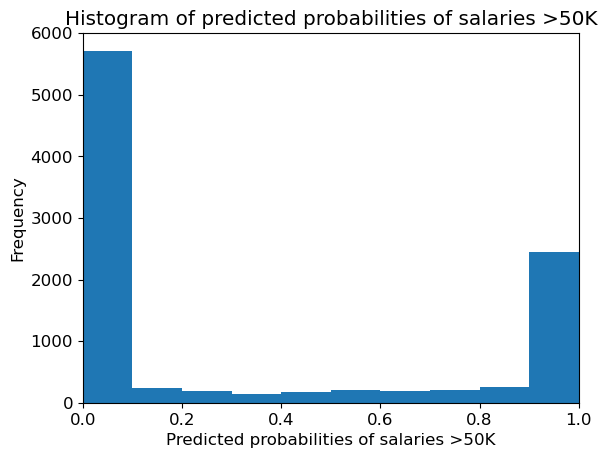

In [83]:
# plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

# QUESTION 9

# Implement Dimensionality reduction using Filter method (Chi square, Correlation regression, Mutual Information) feature selection techniques on heart disease dataset.

# IMPORT THE NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2, mutual_info_classif
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

# LOAD THE DATASET

In [2]:
data = ('heart.csv')
df = pd.read_csv(data)

# EXPLORATORY DATA ANALYSIS

In [3]:
## View the first 5 rows of the dataset
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## View the last 5 rows of the dataset

In [4]:
#View the last five rows of the dataset
df.tail()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0
8762,ZWN9666,25,Female,356,138/67,75,1,1,0,0,...,9.005234,247338,32.914151,180,7,4,United Kingdom,Europe,Northern Hemisphere,1


## View Dimensions Of the dataset

In [5]:
df.shape

(8763, 26)

## View the sammary of the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

## Explore the categorical Variables

In [7]:
#Find the categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables \n'.format(len(categorical)))
print('The categorical Variables are: \n\n', categorical)

There are 7 categorical variables 

The categorical Variables are: 

 ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']


## View categorical variables

In [8]:
df[categorical].head()

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
0,BMW7812,Male,158/88,Average,Argentina,South America,Southern Hemisphere
1,CZE1114,Male,165/93,Unhealthy,Canada,North America,Northern Hemisphere
2,BNI9906,Female,174/99,Healthy,France,Europe,Northern Hemisphere
3,JLN3497,Male,163/100,Average,Canada,North America,Northern Hemisphere
4,GFO8847,Male,91/88,Unhealthy,Thailand,Asia,Northern Hemisphere


## Explore the Problems In categorical variables

In [9]:
#Check for missing values in categorical variables
df[categorical].isnull().sum()

Patient ID        0
Sex               0
Blood Pressure    0
Diet              0
Country           0
Continent         0
Hemisphere        0
dtype: int64

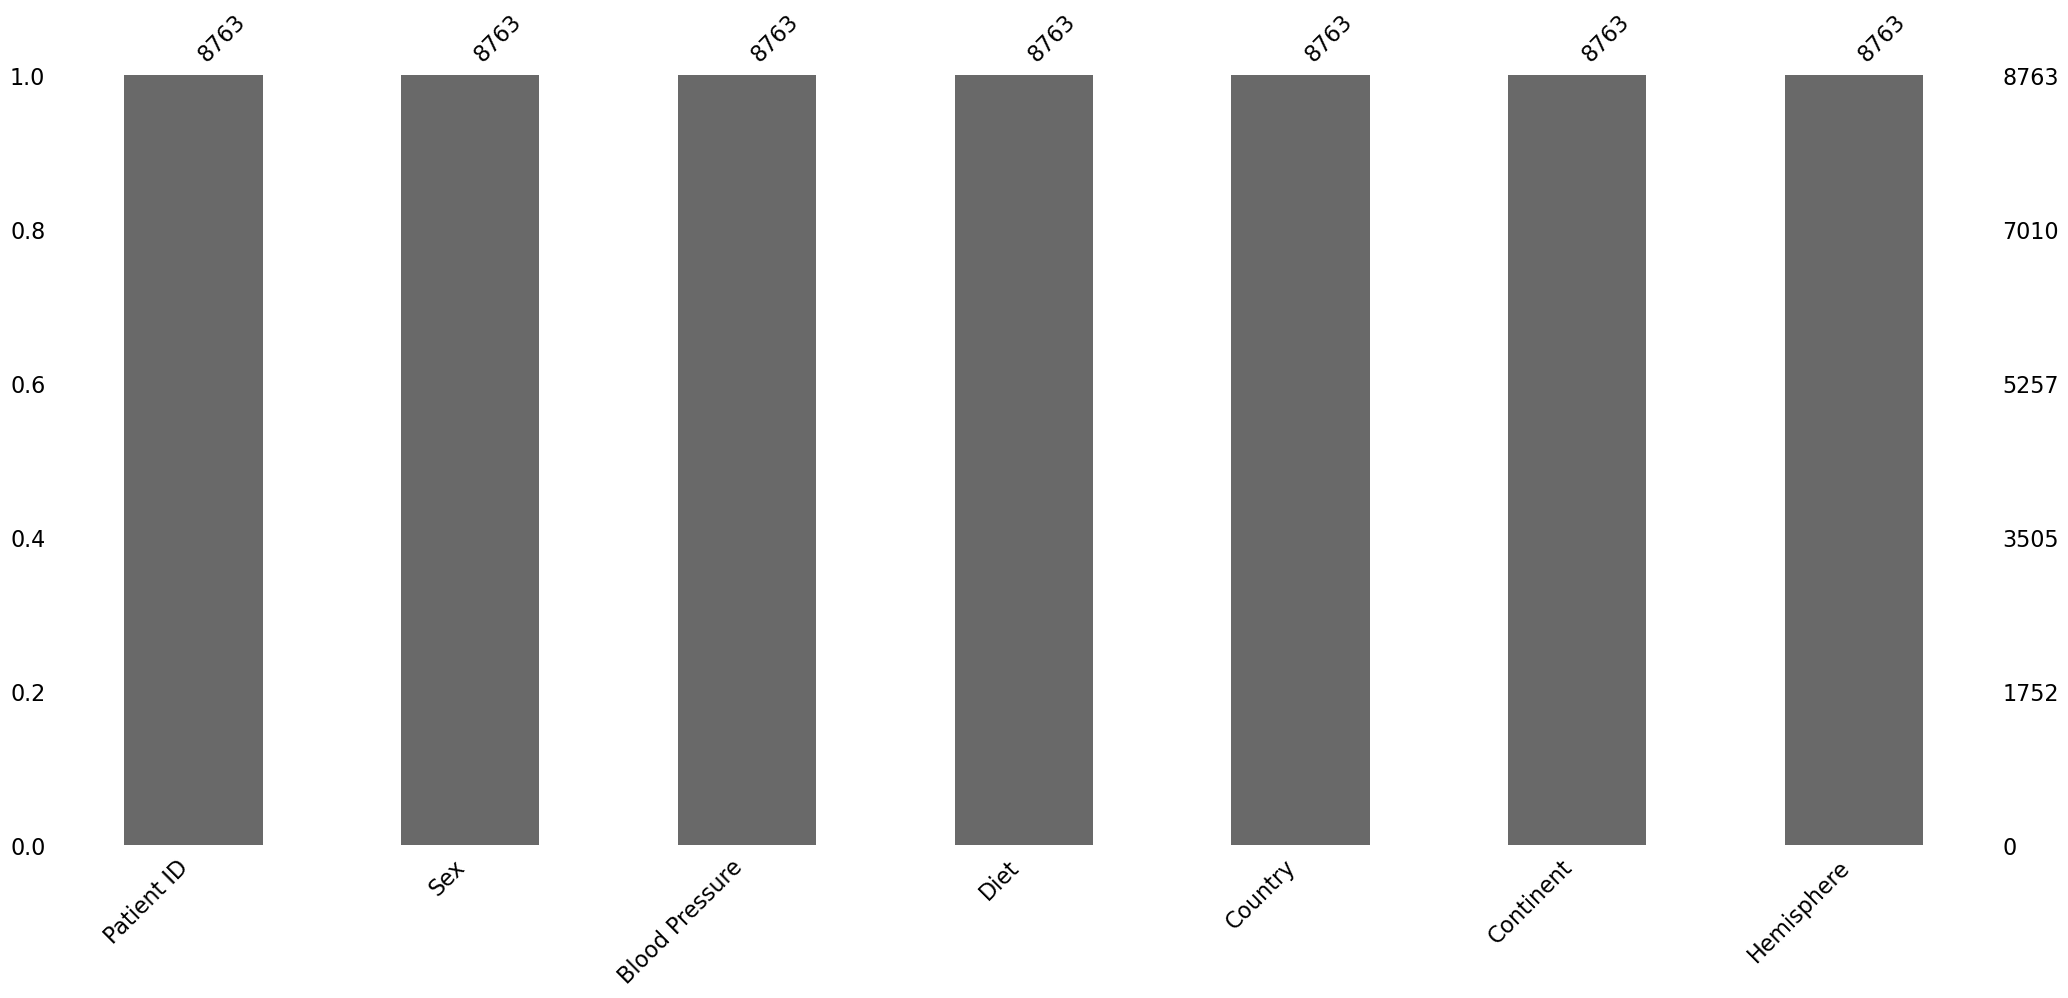

In [10]:
#We can visualize the missing values to clarify
p = msno.bar(df[categorical])

## Frequency Counts Of the categorical Variables

In [11]:
# View the frequency counts of the categorical variables
for var in categorical:
    print(df[var].value_counts())

Patient ID
BMW7812    1
DCD4966    1
ETF7967    1
WPM0379    1
MLL3192    1
          ..
NRV3150    1
EZF9124    1
EOI3054    1
MFA4348    1
ZWN9666    1
Name: count, Length: 8763, dtype: int64
Sex
Male      6111
Female    2652
Name: count, dtype: int64
Blood Pressure
146/94     8
101/93     8
106/64     7
102/104    7
176/77     7
          ..
155/102    1
154/71     1
178/90     1
98/85      1
119/67     1
Name: count, Length: 3915, dtype: int64
Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64
Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: count, dt

In [12]:
# View frequency distribution of categorical variables
for var in categorical:
    print(df[var].value_counts()/float(len(df)))

Patient ID
BMW7812    0.000114
DCD4966    0.000114
ETF7967    0.000114
WPM0379    0.000114
MLL3192    0.000114
             ...   
NRV3150    0.000114
EZF9124    0.000114
EOI3054    0.000114
MFA4348    0.000114
ZWN9666    0.000114
Name: count, Length: 8763, dtype: float64
Sex
Male      0.697364
Female    0.302636
Name: count, dtype: float64
Blood Pressure
146/94     0.000913
101/93     0.000913
106/64     0.000799
102/104    0.000799
176/77     0.000799
             ...   
155/102    0.000114
154/71     0.000114
178/90     0.000114
98/85      0.000114
119/67     0.000114
Name: count, Length: 3915, dtype: float64
Diet
Healthy      0.337784
Average      0.332306
Unhealthy    0.329910
Name: count, dtype: float64
Country
Germany           0.054433
Argentina         0.053749
Brazil            0.052722
United Kingdom    0.052151
Australia         0.051238
Nigeria           0.051124
France            0.050896
Canada            0.050211
China             0.049755
New Zealand       0.049641
Jap

In [13]:
# Check cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Patient ID  contains  8763  labels
Sex  contains  2  labels
Blood Pressure  contains  3915  labels
Diet  contains  3  labels
Country  contains  20  labels
Continent  contains  6  labels
Hemisphere  contains  2  labels


## Explore the numerical Variables

In [14]:
#Find the numerical variables
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables \n'.format(len(numerical)))
print('The numerical variables are:',numerical)

There are 19 numerical variables 

The numerical variables are: ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']


## View the 5 rows of the numerical variables

In [15]:
df[numerical].head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0


## Explore problems in numerical Variables

In [16]:
# Check missing values in numerical variables
df[numerical].isnull().sum()

Age                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
dtype: int64

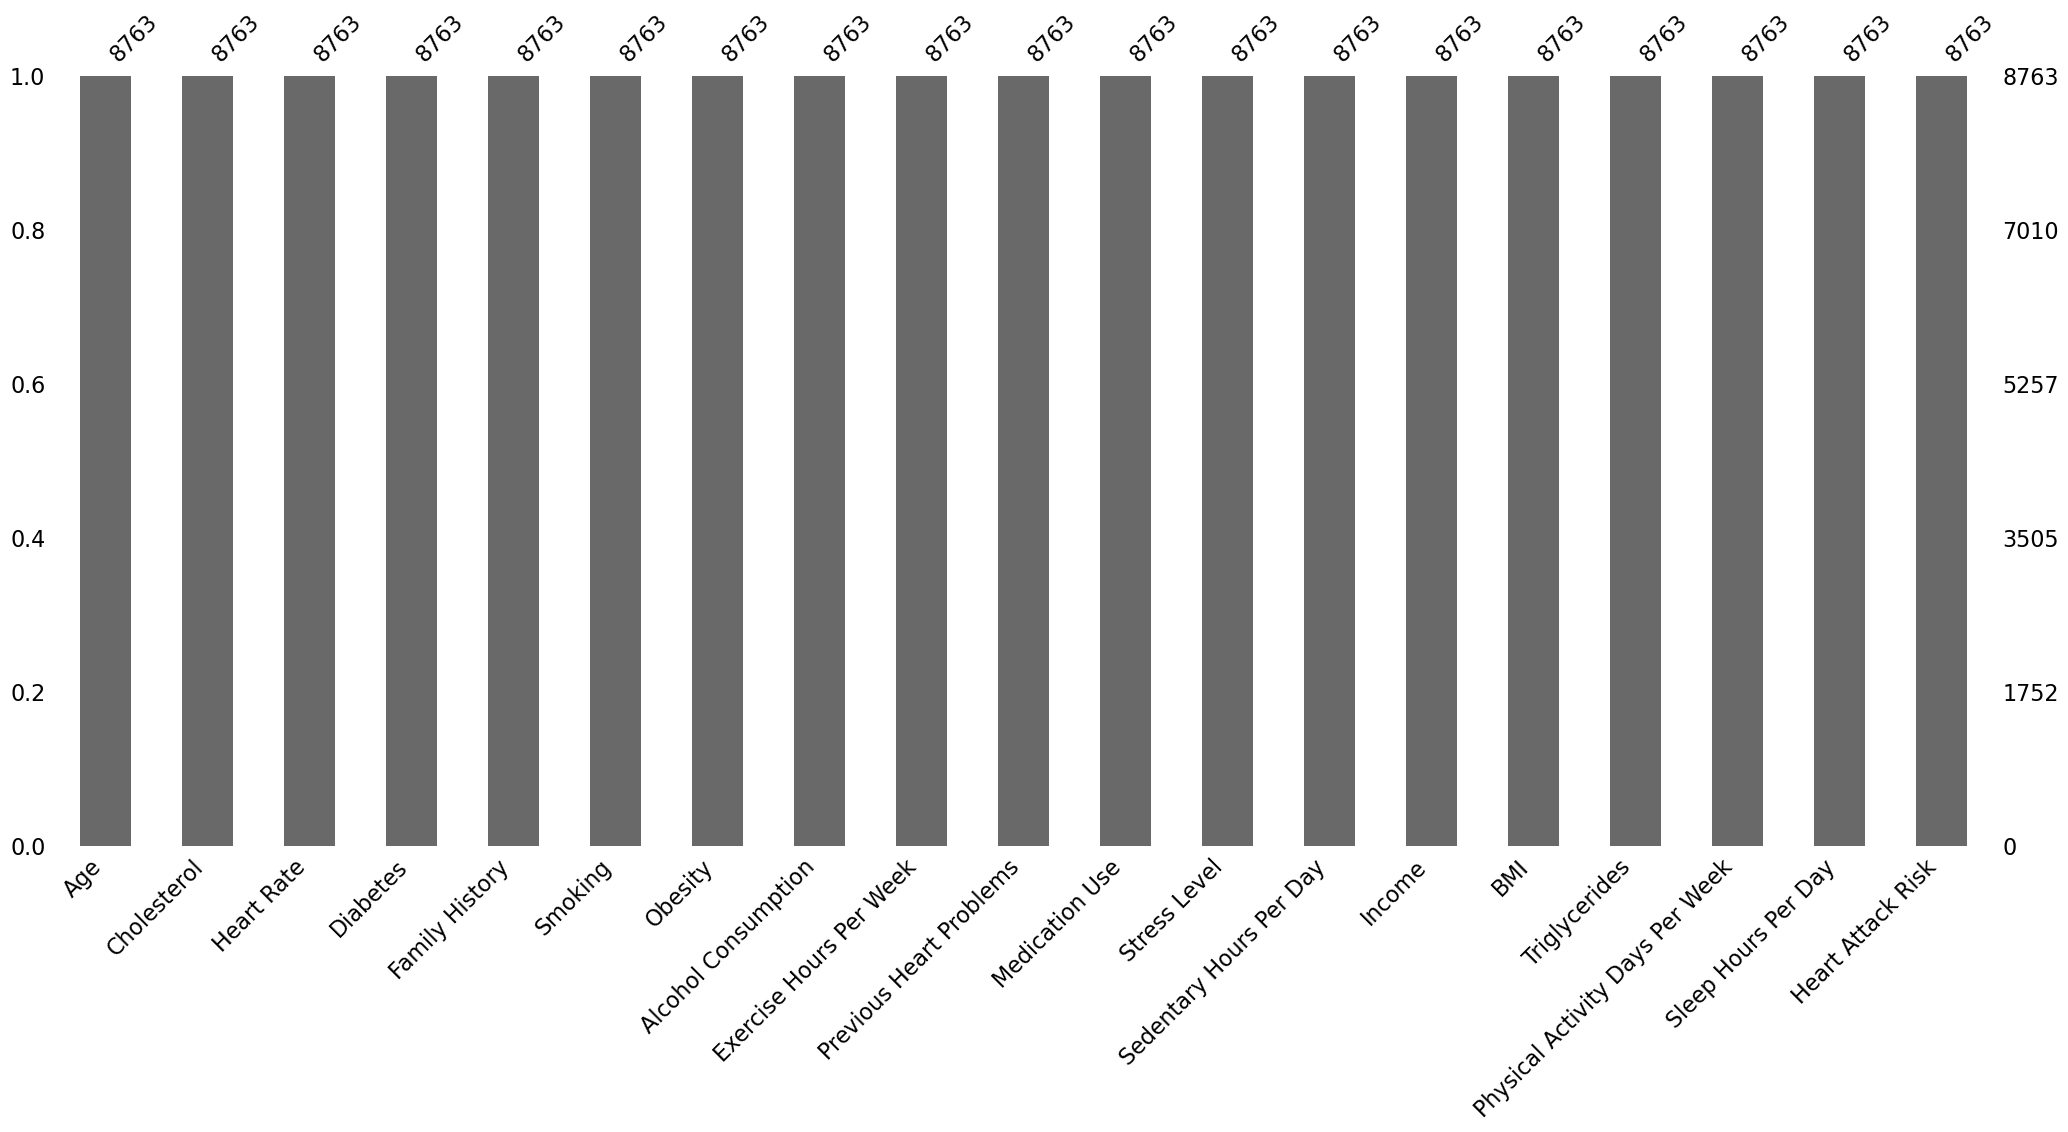

In [17]:
# Visualize to see if there are missing values in the numerical variables
p2 = msno.bar(df[numerical])

In [18]:
# Identify columns with categorical data and unique values
print("\nUnique values in each column:")
print(df.nunique())


Unique values in each column:
Patient ID                         8763
Age                                  73
Sex                                   2
Cholesterol                         281
Blood Pressure                     3915
Heart Rate                           71
Diabetes                              2
Family History                        2
Smoking                               2
Obesity                               2
Alcohol Consumption                   2
Exercise Hours Per Week            8763
Diet                                  3
Previous Heart Problems               2
Medication Use                        2
Stress Level                         10
Sedentary Hours Per Day            8763
Income                             8615
BMI                                8763
Triglycerides                       771
Physical Activity Days Per Week       8
Sleep Hours Per Day                   7
Country                              20
Continent                             6
Hemispher

# DROP IRRELEVANT COLUMNS

In [19]:
# Drop irrelevant columns
columns_to_drop = ['Patient ID', 'Country', 'Continent', 'Hemisphere', 'Blood Pressure']
heart_data_cleaned = df.drop(columns=columns_to_drop)

## Encode categorical features using LabelEncoder

In [20]:
# Encode categorical features using LabelEncoder
categorical_columns = heart_data_cleaned.select_dtypes(include='object').columns
label_encoders = {}
for column in categorical_columns:
    encoder = LabelEncoder()
    heart_data_cleaned[column] = encoder.fit_transform(heart_data_cleaned[column])
    label_encoders[column] = encoder

In [21]:
print("\nData after encoding categorical features:")
print(heart_data_cleaned.head())


Data after encoding categorical features:
   Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    1          208          72         0               0        1   
1   21    1          389          98         1               1        1   
2   21    0          324          72         1               0        0   
3   84    1          383          73         1               1        1   
4   66    1          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  \
0        0                    0                 4.168189  ...   
1        1                    1                 1.813242  ...   
2        0                    0                 2.078353  ...   
3        0                    1                 9.828130  ...   
4        1                    0                 5.804299  ...   

   Previous Heart Problems  Medication Use  Stress Level  \
0                        0               0             

# Declare the feature vector and the target variables

In [22]:
# Separate features and target
X = heart_data_cleaned.drop(columns=['Heart Attack Risk'])
y = heart_data_cleaned['Heart Attack Risk']

# Feature selection Using the filter methods

### Chi-Square Feature Selection

In [23]:
# Chi-Square Feature Selection
chi2_scores, chi2_pvalues = chi2(X, y)

In [24]:
# Correlation with Target Variable
correlations = X.corrwith(y)

### Mutual Information Feature Selection

In [25]:
# Mutual Information Feature Selection
mutual_info_scores = mutual_info_classif(X, y, random_state=0)

In [26]:
# Combine results into a summary DataFrame
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'Chi2 p-value': chi2_pvalues,
    'Correlation': correlations,
    'Mutual Information': mutual_info_scores
})

In [27]:
# Sort features by Mutual Information
feature_scores_sorted = feature_scores.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)
print("\nFeature Selection Results:")
print(feature_scores_sorted)


Feature Selection Results:
                            Feature    Chi2 Score  Chi2 p-value  Correlation  \
0   Physical Activity Days Per Week      0.328848  5.663381e-01    -0.005014   
1                               Sex      0.025409  8.733527e-01     0.003095   
2                           Obesity      0.774874  3.787136e-01    -0.013318   
3                               BMI      0.000005  9.982194e-01     0.000020   
4           Exercise Hours Per Week      3.627542  5.683071e-02     0.011133   
5                            Income  33316.725839  0.000000e+00     0.009628   
6               Alcohol Consumption      0.668564  4.135529e-01    -0.013778   
7                    Family History      0.012124  9.123220e-01    -0.001652   
8                     Triglycerides    115.158368  7.265706e-27     0.010471   
9                           Smoking      0.014837  9.030509e-01    -0.004051   
10                   Medication Use      0.021947  8.822272e-01     0.002234   
11          

In [28]:
# Visualize Chi-Square and Mutual Information scores using heatmaps
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0.5, 23.52222222222222, 'Chi2 Score')

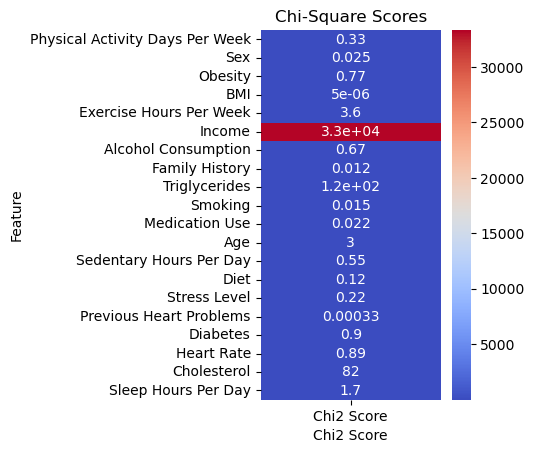

In [29]:
# Chi-Square heatmap
plt.subplot(1, 2, 1)
sns.heatmap(feature_scores_sorted[['Chi2 Score']].set_index(feature_scores_sorted['Feature']), annot=True, cmap='coolwarm', cbar=True)
plt.title('Chi-Square Scores')
plt.xlabel('Chi2 Score')

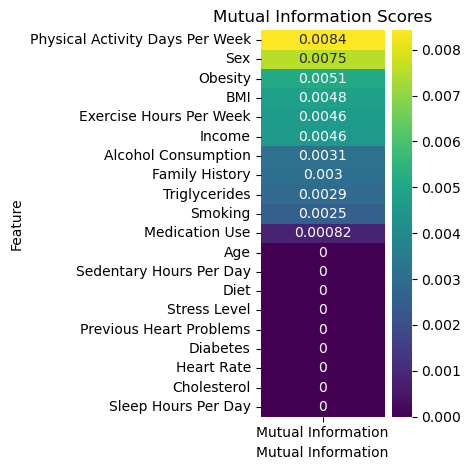

In [30]:
# Mutual Information heatmap
plt.subplot(1, 2, 2)
sns.heatmap(feature_scores_sorted[['Mutual Information']].set_index(feature_scores_sorted['Feature']), annot=True, cmap='viridis', cbar=True)
plt.title('Mutual Information Scores')
plt.xlabel('Mutual Information')
plt.tight_layout()
plt.show()

# QUESTION 10

# Implement Ensemble Learning technique on heart disease dataset using following methods: (i) Max Voting	(ii) Averaging	(iii) Weighted Average 

## IMPORT LIBRARIES

In [1]:
# Import numpy for numerical operations
import numpy as np
# Import pandas for data manipulation and analysis
import pandas as pd
# Import train_test_split for splitting data into training and testing sets
from sklearn.model_selection import train_test_split
# Import ensemble models: RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
# Import metrics for model evaluation: classification_report, accuracy_score
from sklearn.metrics import classification_report, accuracy_score
# Import LogisticRegression for logistic regression model
from sklearn.linear_model import LogisticRegression
# Import SVC (Support Vector Classifier) for support vector machine model
from sklearn.svm import SVC
# Import KNeighborsClassifier for K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier
# Import missingno for visualizing missing data
import missingno as msno
# Import warnings to filter out warning messages
import warnings
# Ignore all warning messages
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [2]:
data = 'heart.csv'
df = pd.read_csv(data)

## EXPLORATORY DATA ANALYSIS

### View dimensions of the dataset

In [3]:
df.shape

(8763, 26)

### View summary of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

### View Missing values in the dataset

In [5]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

### Visualize to see whether there are missing values in the dataset

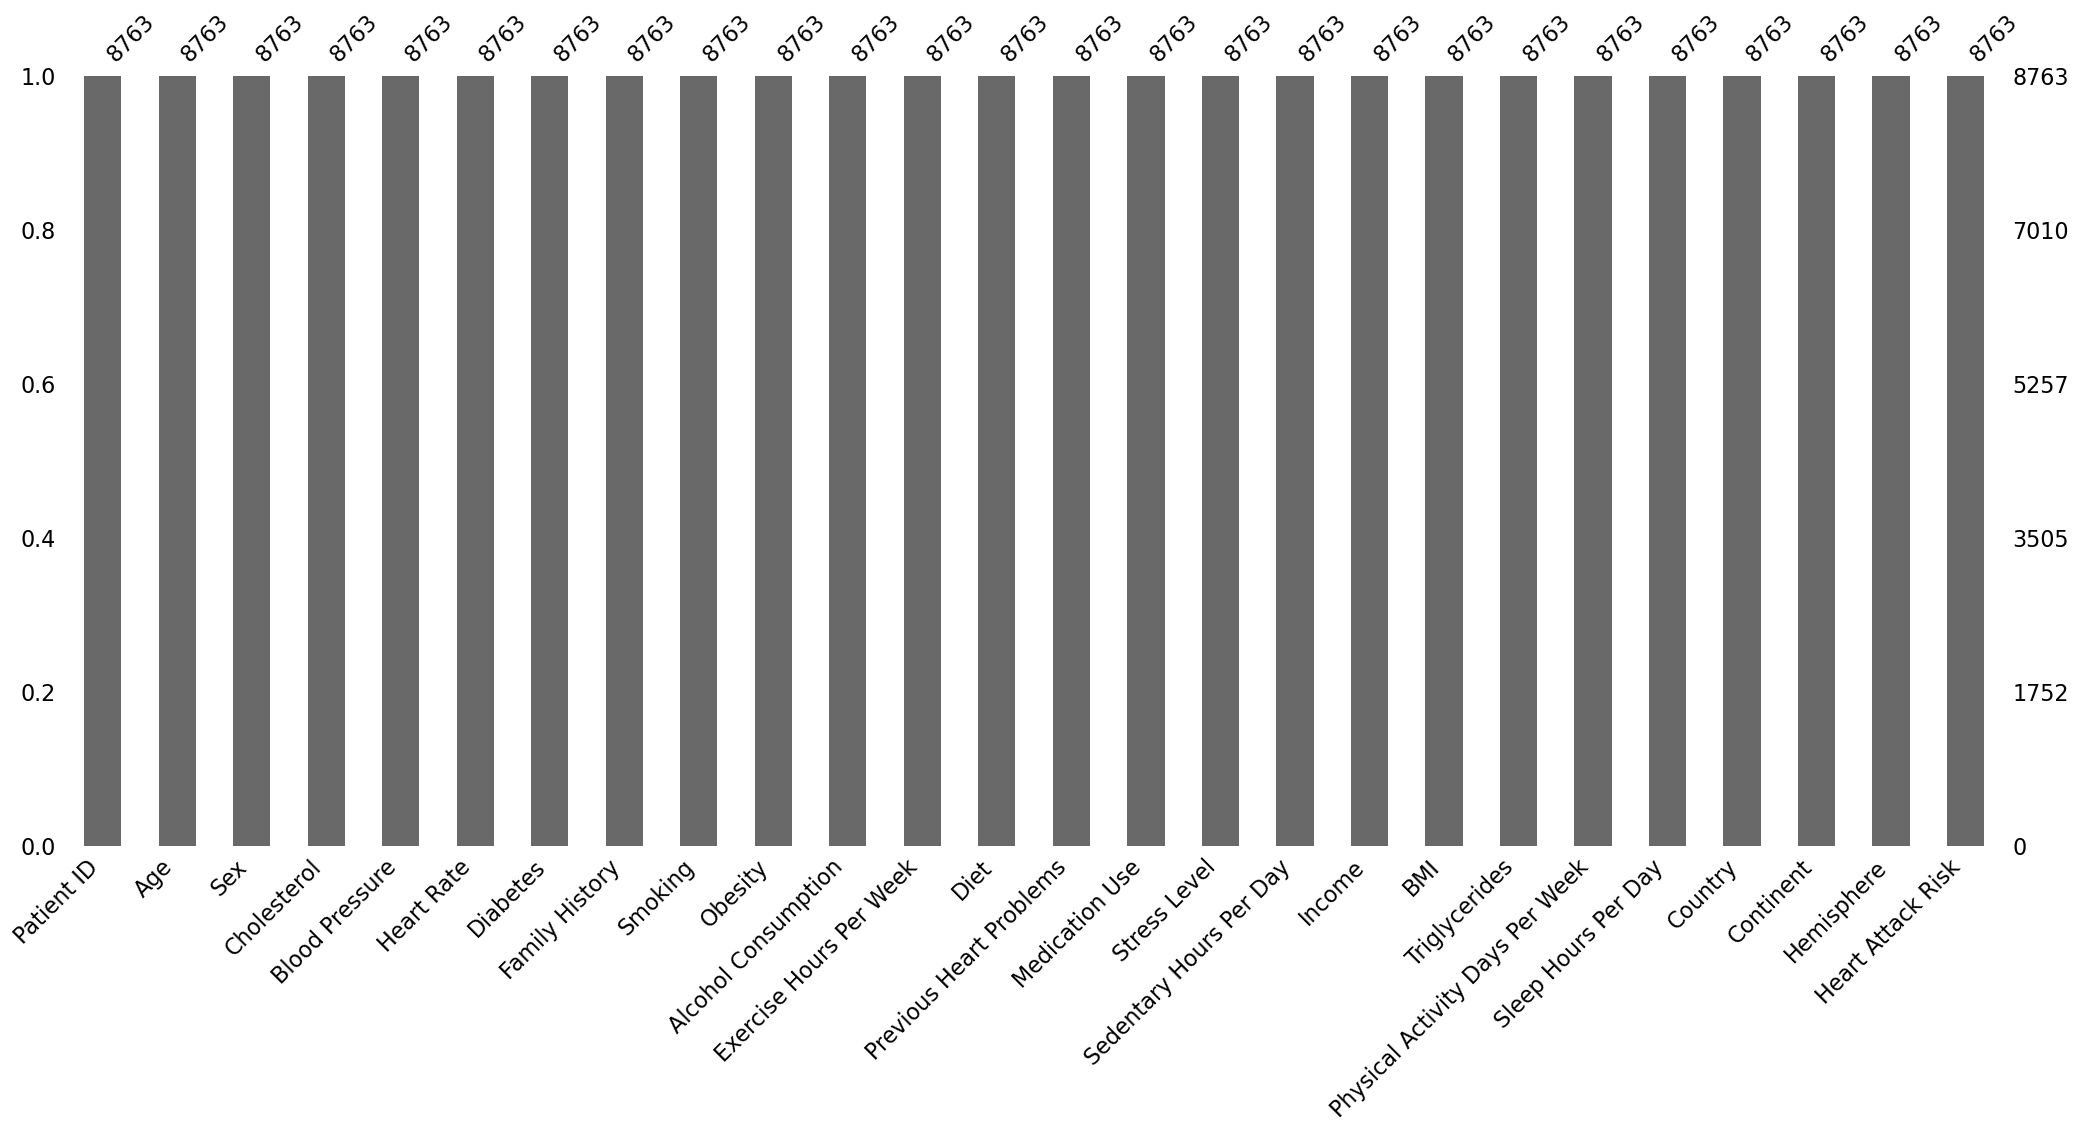

In [6]:
p = msno.bar(df)

## EXPLORE CATEGORICAL VARIABLES

In [7]:
#Find the categorical variables
categorical = [var for var in df.columns if df[var].dtype == 'O']
print('There are {} categorical variables \n'.format(len(categorical)))
print('The categorical Variables are: \n\n', categorical)

There are 7 categorical variables 

The categorical Variables are: 

 ['Patient ID', 'Sex', 'Blood Pressure', 'Diet', 'Country', 'Continent', 'Hemisphere']


In [8]:
#View categorical Variables
df[categorical].head()

,Patient ID,Sex,Blood Pressure,Diet,Country,Continent,Hemisphere
0,BMW7812,Male,158/88,Average,Argentina,South America,Southern Hemisphere
1,CZE1114,Male,165/93,Unhealthy,Canada,North America,Northern Hemisphere
2,BNI9906,Female,174/99,Healthy,France,Europe,Northern Hemisphere
3,JLN3497,Male,163/100,Average,Canada,North America,Northern Hemisphere
4,GFO8847,Male,91/88,Unhealthy,Thailand,Asia,Northern Hemisphere


### Explore the problems in the categorical data

In [9]:
#Check for missing values in the categorical variables
df[categorical].isnull().sum()

Patient ID        0
Sex               0
Blood Pressure    0
Diet              0
Country           0
Continent         0
Hemisphere        0
dtype: int64

In [10]:
#Check for cardinality of the categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Patient ID  contains  8763  labels
Sex  contains  2  labels
Blood Pressure  contains  3915  labels
Diet  contains  3  labels
Country  contains  20  labels
Continent  contains  6  labels
Hemisphere  contains  2  labels


## EXPLORE THE NUMERICAL VARIABLES

In [11]:
#Find the numerical variables
numerical = [var for var in df.columns if df[var].dtype != 'O']
print('There are {} numerical variables \n'.format(len(numerical)))
print("The numerical variables are: \n\n", numerical)

There are 19 numerical variables 

The numerical variables are: 

 ['Age', 'Cholesterol', 'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption', 'Exercise Hours Per Week', 'Previous Heart Problems', 'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Heart Attack Risk']


In [12]:
# View the numerical variables
df[numerical].head(8)

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0
5,54,297,48,1,1,1,0,1,0.625008,1,1,2,7.798752,241339,20.146840,795,5,10,1
6,90,358,84,0,0,1,0,1,4.098177,0,0,7,0.627356,190450,28.885811,284,4,10,1
7,84,220,107,0,0,1,1,1,3.427929,0,1,4,10.543780,122093,22.221862,370,6,7,1


### Explore the problems in the numerical variables

In [13]:
# View the missing values
df[numerical].isnull().sum()

Age                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
dtype: int64

## DROP THE IRRELEVANT COLUMNS

In [14]:
columns_to_drop = ['Patient ID', 'Country', 'Continent', 'Hemisphere', 'Blood Pressure', 'Sex', 'Diet']
heart_data_cleaned = df.drop(columns=columns_to_drop)

In [15]:
heart_data_cleaned.head()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
0,67,208,72,0,0,1,0,0,4.168189,0,0,9,6.615001,261404,31.251233,286,0,6,0
1,21,389,98,1,1,1,1,1,1.813242,1,0,1,4.963459,285768,27.194973,235,1,7,0
2,21,324,72,1,0,0,0,0,2.078353,1,1,9,9.463426,235282,28.176571,587,4,4,0
3,84,383,73,1,1,1,0,1,9.828130,1,0,9,7.648981,125640,36.464704,378,3,4,0
4,66,318,93,1,1,1,1,0,5.804299,1,0,6,1.514821,160555,21.809144,231,1,5,0


## DECLARE THE FEATURE VECTOR AND THE TARGET VARIABLES

In [16]:
# Separate the features and target
X = heart_data_cleaned.drop(columns=['Heart Attack Risk'])
y = heart_data_cleaned['Heart Attack Risk']

## SPLIT THE DATA INTO THE TRAINING AND TESTING SET

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## IMPLEMENTATION OF ENSEMBLE LEARNING

## BASE MODELS

In [18]:
# Initialize Logistic Regression model with a fixed random state for reproducibility
model1 = LogisticRegression(random_state=42)
# Initialize Random Forest Classifier with a fixed random state for reproducibility
model2 = RandomForestClassifier(random_state=42)
# Initialize Gradient Boosting Classifier with a fixed random state for reproducibility
model3 = GradientBoostingClassifier(random_state=42)
# Initialize Support Vector Classifier with probability estimates enabled and a fixed random state
model4 = SVC(probability=True, random_state=42)
# Initialize K-Nearest Neighbors Classifier with default parameters
model5 = KNeighborsClassifier()

### MAX VOTING

In [19]:
# (i) Max Voting
# Create a VotingClassifier with hard voting (majority rule) using multiple models
voting_classifier_hard = VotingClassifier(estimators=[
    ('lr', model1),  # Logistic Regression
    ('rf', model2),  # Random Forest Classifier
    ('gb', model3),  # Gradient Boosting Classifier
    ('svc', model4), # Support Vector Classifier
    ('knn', model5)  # K-Nearest Neighbors
], voting='hard')

# Fit the VotingClassifier on the training data
voting_classifier_hard.fit(X_train, y_train)
# Predict on the test set using the hard voting classifier
y_pred_hard = voting_classifier_hard.predict(X_test)
# Calculate the accuracy of the hard voting classifier
accuracy_hard = accuracy_score(y_test, y_pred_hard)
# Print the accuracy of the hard voting classifier
print("\nMax Voting (Hard Voting) Accuracy:", accuracy_hard)
# Print the classification report for the hard voting classifier
print("\nClassification Report (Hard Voting):")
print(classification_report(y_test, y_pred_hard))


Max Voting (Hard Voting) Accuracy: 0.6411865373645179

Classification Report (Hard Voting):
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



## AVERAGING

In [20]:
# (ii) Averaging (Soft Voting)
# Create a VotingClassifier with soft voting (weighted average of probabilities) using multiple models
voting_classifier_soft = VotingClassifier(estimators=[
    ('lr', model1),  # Logistic Regression
    ('rf', model2),  # Random Forest Classifier
    ('gb', model3),  # Gradient Boosting Classifier
    ('svc', model4), # Support Vector Classifier
    ('knn', model5)  # K-Nearest Neighbors
], voting='soft')
# Fit the VotingClassifier on the training data
voting_classifier_soft.fit(X_train, y_train)
# Predict on the test set using the soft voting classifier
y_pred_soft = voting_classifier_soft.predict(X_test)
# Calculate the accuracy of the soft voting classifier
accuracy_soft = accuracy_score(y_test, y_pred_soft)
# Print the accuracy of the soft voting classifier
print("\nAveraging (Soft Voting) Accuracy:", accuracy_soft)
# Print the classification report for the soft voting classifier
print("\nClassification Report (Soft Voting):")
print(classification_report(y_test, y_pred_soft))


Averaging (Soft Voting) Accuracy: 0.6406160867084997

Classification Report (Soft Voting):
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.25      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.45      0.50      0.39      1753
weighted avg       0.50      0.64      0.50      1753



### WEIGHTED AVERAGE

In [21]:
# (iii) Weighted Average (Custom weights for each model)
# Create a VotingClassifier with soft voting and custom weights for each model
voting_classifier_weighted = VotingClassifier(estimators=[
    ('lr', model1),  # Logistic Regression
    ('rf', model2),  # Random Forest Classifier
    ('gb', model3),  # Gradient Boosting Classifier
    ('svc', model4), # Support Vector Classifier
    ('knn', model5)  # K-Nearest Neighbors
], voting='soft', weights=[1, 2, 2, 1, 1])  # Assign custom weights to each model
# Fit the VotingClassifier on the training data
voting_classifier_weighted.fit(X_train, y_train)
# Predict on the test set using the weighted soft voting classifier
y_pred_weighted = voting_classifier_weighted.predict(X_test)
# Calculate the accuracy of the weighted soft voting classifier
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
# Print the accuracy of the weighted soft voting classifier
print("\nWeighted Average (Soft Voting with Weights) Accuracy:", accuracy_weighted)
# Print the classification report for the weighted soft voting classifier
print("\nClassification Report (Weighted Voting):")
print(classification_report(y_test, y_pred_weighted))


Weighted Average (Soft Voting with Weights) Accuracy: 0.6411865373645179

Classification Report (Weighted Voting):
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.33      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.49      0.50      0.39      1753
weighted avg       0.53      0.64      0.50      1753

